In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os

In [2]:
df = pd.read_csv('train_ctrUa4K.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
df.duplicated().sum()

0

In [3]:
df.drop('Loan_ID',axis=1,inplace=True)
df.duplicated().sum()

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


In [ ]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
df.CoapplicantIncome.value_counts()

0.0       273
2500.0      5
2083.0      5
1666.0      5
2250.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: CoapplicantIncome, Length: 287, dtype: int64

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

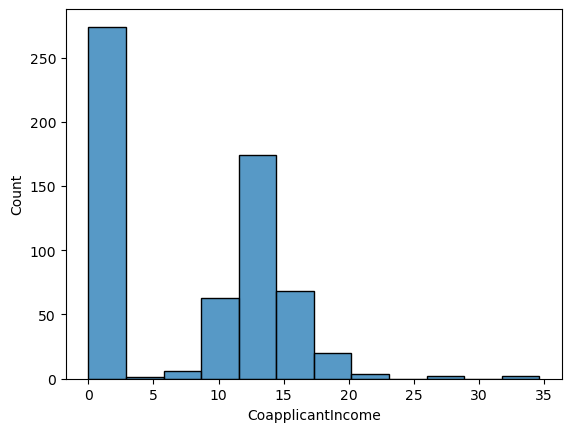

In [ ]:

sns.histplot(np.cbrt(df['CoapplicantIncome']))

In [4]:
df['Dependents'] = df['Dependents'].replace('3+' , '3')
df['Dependents'] = df['Dependents'].apply(lambda x : int(x) if type(x) is not float else x)

In [5]:
df['ApplicantIncome'] = np.log(df['ApplicantIncome'])
df['CoapplicantIncome'] = np.cbrt(df['CoapplicantIncome'])
df['LoanAmount'] = np.log(df['LoanAmount'])

In [6]:
df['Loan_Status'] = df['Loan_Status'].map({'Y':1 , 'N':0})

In [29]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,8.674026,0.000000,NaN,360.0,1.0,Urban,1
1,Male,Yes,1.0,Graduate,No,8.430109,11.467457,4.852030,360.0,1.0,Rural,0
2,Male,Yes,0.0,Graduate,Yes,8.006368,0.000000,4.189655,360.0,1.0,Urban,1
3,Male,Yes,0.0,Not Graduate,No,7.856707,13.310098,4.787492,360.0,1.0,Urban,1
4,Male,No,0.0,Graduate,No,8.699515,0.000000,4.948760,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0.0,Graduate,No,7.972466,0.000000,4.262680,360.0,1.0,Rural,1
610,Male,Yes,3.0,Graduate,No,8.320205,0.000000,3.688879,180.0,1.0,Rural,1
611,Male,Yes,1.0,Graduate,No,8.996157,6.214465,5.533389,360.0,1.0,Urban,1
612,Male,Yes,2.0,Graduate,No,8.933664,0.000000,5.231109,360.0,1.0,Urban,1


In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler , OneHotEncoder , FunctionTransformer
from sklearn.model_selection import StratifiedKFold , train_test_split , cross_val_score , cross_validate
from sklearn.metrics import recall_score , precision_score , classification_report , accuracy_score , confusion_matrix , ConfusionMatrixDisplay , f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [8]:
numeric_cols = list(df.select_dtypes('number').columns)
cat_cols = list(df.select_dtypes('object').columns)

In [9]:
numeric_cols[:-1]

['Dependents',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [10]:



cat_imputer = Pipeline(steps=[
    ('imputer' , SimpleImputer(strategy='most_frequent')),
    ('ohe' , OneHotEncoder(sparse_output=False,drop='first'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num' , SimpleImputer(strategy='median') , numeric_cols[:-1]),
    ('cat' , cat_imputer , ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area'])
] , remainder='passthrough' , verbose_feature_names_out=False)

In [11]:
pipeline = Pipeline(steps = [

    ('preprocessor' , preprocessor),
    ('sclr' , StandardScaler()),
    ('model' , XGBClassifier())
])

In [12]:
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_out...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [13]:
X , y = df.drop('Loan_Status' , axis=1) , df['Loan_Status']

In [14]:
x_train , x_test , y_train , y_test = train_test_split(X,y,test_size=0.2,stratify=y,random_state=0)

In [15]:
models = [
    ('lr' , LogisticRegression()),
    ('svm', SVC()),
    ('knn' , KNeighborsClassifier()),
    ('clf' , DecisionTreeClassifier()),
    ('rf' , RandomForestClassifier()),
    ('ada' , AdaBoostClassifier()),
    ('xgb' , XGBClassifier())
]

lr
0.7924528301886793


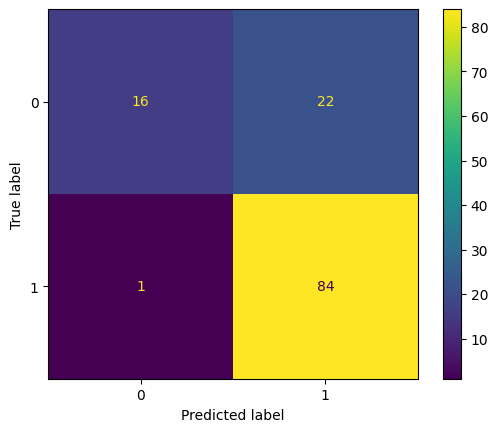

**************************************************
svm
0.7924528301886793


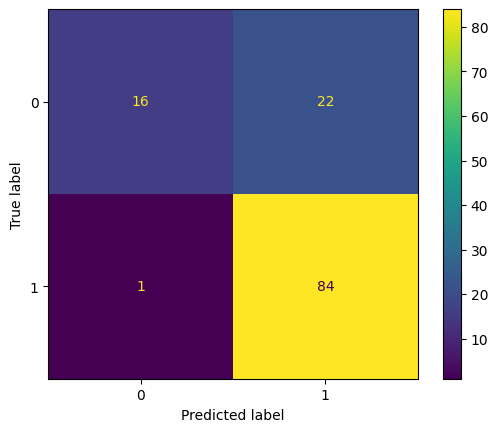

**************************************************
knn
0.7959183673469388


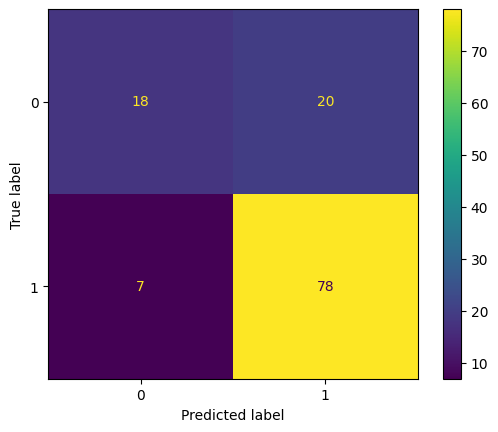

**************************************************
clf
0.7857142857142857


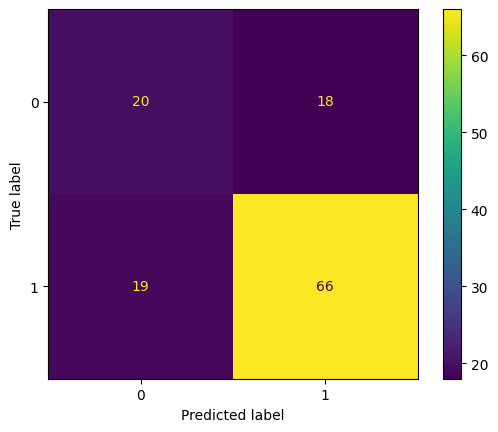

**************************************************
rf
0.7821782178217822


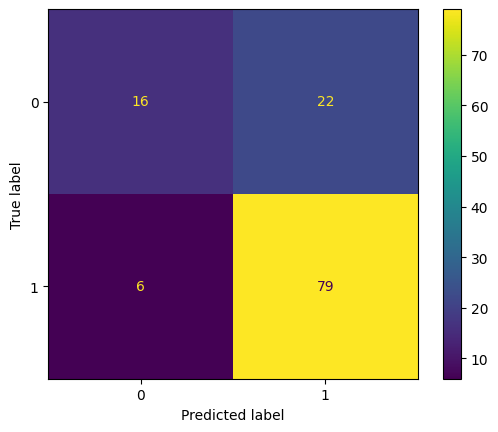

**************************************************
ada
0.801980198019802


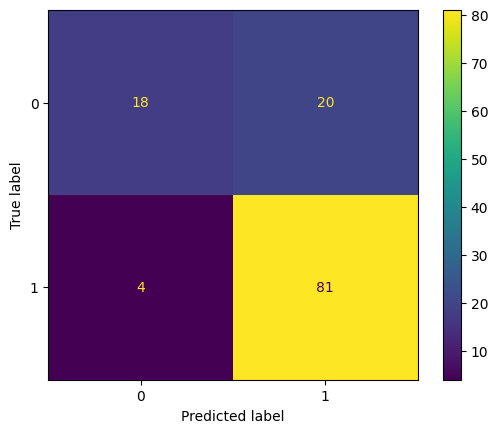

**************************************************
xgb
0.7954545454545454


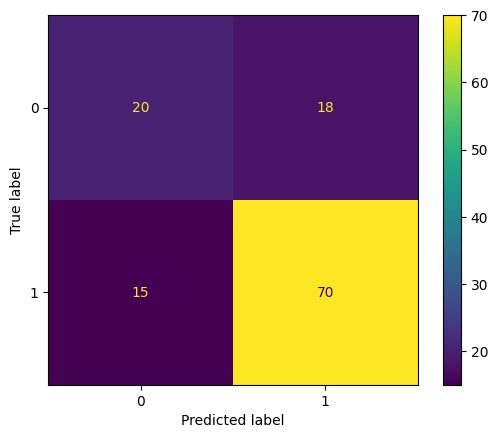

**************************************************


In [44]:
for model in models :
    print(model[0])
    pipeline = Pipeline(steps = [
    ('preprocessor' , preprocessor),
    ('sclr' , StandardScaler()),
    model
        ])
    pipeline.fit(x_train , y_train)
    train_pred = pipeline.predict(x_train)
    test_pred = pipeline.predict(x_test)
    print(precision_score(y_test , test_pred))
    disp = ConfusionMatrixDisplay(confusion_matrix(y_test , test_pred) , display_labels=pipeline.classes_)
    #print(confusion_matrix(y_test , test_pred))
    disp.plot()
    plt.show()
    print('*' * 50)


In [52]:
for model in models :
    print(model[0])
    pipeline = Pipeline(steps = [
    ('preprocessor' , preprocessor),
    ('sclr' , StandardScaler()),
    model
        ])
    scores = cross_val_score(pipeline , X , y , cv=StratifiedKFold(5) , scoring='precision')
    print(scores.mean())
    
    print('*' * 50)

lr
0.7910806823942073
**************************************************
svm
0.7890806823942074
**************************************************
knn
0.7833732105762883
**************************************************
clf
0.7927118944667362
**************************************************
rf
0.789251320342613
**************************************************
ada
0.7952992803131602
**************************************************
xgb
0.7946191257853232
**************************************************


In [16]:
import optuna
from random import choice

# DEcisionTree

In [63]:
models = {

    'DecisionTree' : DecisionTreeClassifier

}
def objective(trial)  :

   X , y = df.drop('Loan_Status',axis=1) , df['Loan_Status']
   param = get_params(trial)
   print(Model(**param))


   model = Pipeline(steps = [
       ('preprocessor' , preprocessor),
       ('sclr' , StandardScaler()),
       (model_name , Model(**param))
        ])





   scores = cross_val_score(model,X,y,cv=StratifiedKFold(5) , scoring = 'precision')

   return scores.mean()


def get_params(trial) :

   params = {


          'DecisionTree'     : {
                                  'max_depth' : trial.suggest_int('max_depth',1,10),
                                  'splitter'  : choice(['best' , 'random']),
                                  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
                              }

        }

   return params[model_name]




best_estimator = []


for model_name , Model in models.items() :




  study = optuna.create_study(study_name= model_name , direction='maximize')
  study.optimize(objective, n_trials=200)


  best_estimator.append(Pipeline(steps=[

          ('preprocessor' , preprocessor),
          ('sclr' , StandardScaler()),
          (model_name , Model(**study.best_params))
      ])
)





[I 2024-02-06 13:29:23,923] A new study created in memory with name: DecisionTree
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:24,036] Trial 0 finished with value: 0.7739412857284949 and parameters: {'max_depth': 2, 'max_features': 0.7496187416772457}. Best is trial 0 with value: 0.7739412857284949.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=2, max_features=0.7496187416772457,
                       splitter='random')
DecisionTreeClassifier(max_depth=3, max_features=0.7727666078603107)


[I 2024-02-06 13:29:24,158] Trial 1 finished with value: 0.7882566277463876 and parameters: {'max_depth': 3, 'max_features': 0.7727666078603107}. Best is trial 1 with value: 0.7882566277463876.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:24,273] Trial 2 finished with value: 0.6867786218845795 and parameters: {'max_depth': 1, 'max_features': 0.13610918004235684}. Best is trial 1 with value: 0.7882566277463876.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=1, max_features=0.13610918004235684)
DecisionTreeClassifier(max_depth=3, max_features=0.1528387153925881)


[I 2024-02-06 13:29:24,391] Trial 3 finished with value: 0.7119338947926668 and parameters: {'max_depth': 3, 'max_features': 0.1528387153925881}. Best is trial 1 with value: 0.7882566277463876.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:24,514] Trial 4 finished with value: 0.7940492626639981 and parameters: {'max_depth': 10, 'max_features': 0.7803134143776073}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.7803134143776073,
                       splitter='random')
DecisionTreeClassifier(max_depth=9, max_features=0.1972086962502677,
                       splitter='random')


[I 2024-02-06 13:29:24,643] Trial 5 finished with value: 0.7512292208477847 and parameters: {'max_depth': 9, 'max_features': 0.1972086962502677}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:24,767] Trial 6 finished with value: 0.7650087746535421 and parameters: {'max_depth': 7, 'max_features': 0.21979289613278563}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=7, max_features=0.21979289613278563)
DecisionTreeClassifier(max_depth=3, max_features=0.3429374649175395,
                       splitter='random')


[I 2024-02-06 13:29:24,879] Trial 7 finished with value: 0.7604007938259846 and parameters: {'max_depth': 3, 'max_features': 0.3429374649175395}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:25,045] Trial 8 finished with value: 0.7825152570850448 and parameters: {'max_depth': 7, 'max_features': 0.5076536632692157}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=7, max_features=0.5076536632692157,
                       splitter='random')
DecisionTreeClassifier(max_depth=7, max_features=0.7608578467134162)


[I 2024-02-06 13:29:25,248] Trial 9 finished with value: 0.7844033951510587 and parameters: {'max_depth': 7, 'max_features': 0.7608578467134162}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:25,437] Trial 10 finished with value: 0.7774914419008574 and parameters: {'max_depth': 10, 'max_features': 0.9221234466767061}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9221234466767061,
                       splitter='random')
DecisionTreeClassifier(max_depth=5, max_features=0.6174163673229437,
                       splitter='random')


[I 2024-02-06 13:29:25,631] Trial 11 finished with value: 0.7860416473962377 and parameters: {'max_depth': 5, 'max_features': 0.6174163673229437}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:25,816] Trial 12 finished with value: 0.7925289113444142 and parameters: {'max_depth': 4, 'max_features': 0.9617904090735263}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=4, max_features=0.9617904090735263,
                       splitter='random')
DecisionTreeClassifier(max_depth=5, max_features=0.995873457976935)


[I 2024-02-06 13:29:26,014] Trial 13 finished with value: 0.7901440624831715 and parameters: {'max_depth': 5, 'max_features': 0.995873457976935}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:26,208] Trial 14 finished with value: 0.7841169669237346 and parameters: {'max_depth': 9, 'max_features': 0.8784124096365723}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.8784124096365723,
                       splitter='random')
DecisionTreeClassifier(max_depth=6, max_features=0.6125005986663784)


[I 2024-02-06 13:29:26,411] Trial 15 finished with value: 0.7929685562664286 and parameters: {'max_depth': 6, 'max_features': 0.6125005986663784}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:26,635] Trial 16 finished with value: 0.774924958764501 and parameters: {'max_depth': 8, 'max_features': 0.5816935806408473}. Best is trial 4 with value: 0.7940492626639981.


DecisionTreeClassifier(max_depth=8, max_features=0.5816935806408473)


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:26,843] Trial 17 finished with value: 0.780352426216816 and parameters: {'max_depth': 10, 'max_features': 0.3953567986648553}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.3953567986648553,
                       splitter='random')
DecisionTreeClassifier(max_depth=6, max_features=0.6416755466056525)


[I 2024-02-06 13:29:27,040] Trial 18 finished with value: 0.7838867260032308 and parameters: {'max_depth': 6, 'max_features': 0.6416755466056525}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:27,179] Trial 19 finished with value: 0.7897588146664501 and parameters: {'max_depth': 8, 'max_features': 0.41092519175592}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=8, max_features=0.41092519175592,
                       splitter='random')
DecisionTreeClassifier(max_depth=6, max_features=0.8102665768870567,
                       splitter='random')


[I 2024-02-06 13:29:27,310] Trial 20 finished with value: 0.7826957934660623 and parameters: {'max_depth': 6, 'max_features': 0.8102665768870567}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:27,442] Trial 21 finished with value: 0.7771753712364691 and parameters: {'max_depth': 4, 'max_features': 0.6902733133436634}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=4, max_features=0.6902733133436634,
                       splitter='random')
DecisionTreeClassifier(max_depth=4, max_features=0.8886881637000271)


[I 2024-02-06 13:29:27,590] Trial 22 finished with value: 0.7867719033534696 and parameters: {'max_depth': 4, 'max_features': 0.8886881637000271}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:27,730] Trial 23 finished with value: 0.7871226448036281 and parameters: {'max_depth': 4, 'max_features': 0.979797959833042}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=4, max_features=0.979797959833042)
DecisionTreeClassifier(max_depth=1, max_features=0.5440557744249774)


[I 2024-02-06 13:29:27,869] Trial 24 finished with value: 0.7553091768804101 and parameters: {'max_depth': 1, 'max_features': 0.5440557744249774}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:27,996] Trial 25 finished with value: 0.7914102274573194 and parameters: {'max_depth': 5, 'max_features': 0.8470657942561608}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=5, max_features=0.8470657942561608)
DecisionTreeClassifier(max_depth=2, max_features=0.6951857185993054,
                       splitter='random')


[I 2024-02-06 13:29:28,132] Trial 26 finished with value: 0.7910806823942073 and parameters: {'max_depth': 2, 'max_features': 0.6951857185993054}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:28,263] Trial 27 finished with value: 0.7681708836698486 and parameters: {'max_depth': 9, 'max_features': 0.019009694851491288}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.019009694851491288)
DecisionTreeClassifier(max_depth=6, max_features=0.9312338377249745,
                       splitter='random')


[I 2024-02-06 13:29:28,402] Trial 28 finished with value: 0.782305396417068 and parameters: {'max_depth': 6, 'max_features': 0.9312338377249745}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:28,528] Trial 29 finished with value: 0.7910806823942073 and parameters: {'max_depth': 2, 'max_features': 0.6994683567119302}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=2, max_features=0.6994683567119302,
                       splitter='random')
DecisionTreeClassifier(max_depth=8, max_features=0.8162590446512035,
                       splitter='random')


[I 2024-02-06 13:29:28,674] Trial 30 finished with value: 0.7788771268119687 and parameters: {'max_depth': 8, 'max_features': 0.8162590446512035}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:28,802] Trial 31 finished with value: 0.7806056253019596 and parameters: {'max_depth': 5, 'max_features': 0.8386526838289746}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=5, max_features=0.8386526838289746)
DecisionTreeClassifier(max_depth=4, max_features=0.7465747030719345,
                       splitter='random')


[I 2024-02-06 13:29:28,940] Trial 32 finished with value: 0.7844256380748135 and parameters: {'max_depth': 4, 'max_features': 0.7465747030719345}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:29,080] Trial 33 finished with value: 0.7916000214518796 and parameters: {'max_depth': 5, 'max_features': 0.877123658767623}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=5, max_features=0.877123658767623)
DecisionTreeClassifier(max_depth=3, max_features=0.9372201031275313)


[I 2024-02-06 13:29:29,220] Trial 34 finished with value: 0.7875505516116494 and parameters: {'max_depth': 3, 'max_features': 0.9372201031275313}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:29,357] Trial 35 finished with value: 0.7883240948168355 and parameters: {'max_depth': 6, 'max_features': 0.7659993903749344}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=6, max_features=0.7659993903749344)
DecisionTreeClassifier(max_depth=3, max_features=0.6483248929167511,
                       splitter='random')


[I 2024-02-06 13:29:29,491] Trial 36 finished with value: 0.789670556672155 and parameters: {'max_depth': 3, 'max_features': 0.6483248929167511}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:29,639] Trial 37 finished with value: 0.7843773399267965 and parameters: {'max_depth': 4, 'max_features': 0.8817295096846394}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=4, max_features=0.8817295096846394)
DecisionTreeClassifier(max_depth=7, max_features=0.7219188627482616,
                       splitter='random')


[I 2024-02-06 13:29:29,766] Trial 38 finished with value: 0.7908811601563702 and parameters: {'max_depth': 7, 'max_features': 0.7219188627482616}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:29,902] Trial 39 finished with value: 0.7242632600753856 and parameters: {'max_depth': 1, 'max_features': 0.8022446621851265}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=1, max_features=0.8022446621851265,
                       splitter='random')
DecisionTreeClassifier(max_depth=5, max_features=0.48424342245527097)


[I 2024-02-06 13:29:30,037] Trial 40 finished with value: 0.7853008895866038 and parameters: {'max_depth': 5, 'max_features': 0.48424342245527097}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:30,176] Trial 41 finished with value: 0.7875877056538918 and parameters: {'max_depth': 5, 'max_features': 0.9606425260998817}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=5, max_features=0.9606425260998817)
DecisionTreeClassifier(max_depth=4, max_features=0.854962839657679)


[I 2024-02-06 13:29:30,312] Trial 42 finished with value: 0.7805887443412951 and parameters: {'max_depth': 4, 'max_features': 0.854962839657679}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:30,458] Trial 43 finished with value: 0.7836614255301525 and parameters: {'max_depth': 5, 'max_features': 0.9114936841477985}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=5, max_features=0.9114936841477985)
DecisionTreeClassifier(max_depth=6, max_features=0.8443893815331581,
                       splitter='random')


[I 2024-02-06 13:29:30,600] Trial 44 finished with value: 0.7868650200030792 and parameters: {'max_depth': 6, 'max_features': 0.8443893815331581}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:30,747] Trial 45 finished with value: 0.7886123587269404 and parameters: {'max_depth': 3, 'max_features': 0.7780787612206541}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=3, max_features=0.7780787612206541,
                       splitter='random')
DecisionTreeClassifier(max_depth=7, max_features=0.9668906402420916,
                       splitter='random')


[I 2024-02-06 13:29:30,889] Trial 46 finished with value: 0.7812785611388986 and parameters: {'max_depth': 7, 'max_features': 0.9668906402420916}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:31,021] Trial 47 finished with value: 0.7874534304646664 and parameters: {'max_depth': 10, 'max_features': 0.5744035020388525}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.5744035020388525)
DecisionTreeClassifier(max_depth=2, max_features=0.6605906500846455,
                       splitter='random')


[I 2024-02-06 13:29:31,170] Trial 48 finished with value: 0.7691702158116096 and parameters: {'max_depth': 2, 'max_features': 0.6605906500846455}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:31,300] Trial 49 finished with value: 0.7502774020248892 and parameters: {'max_depth': 5, 'max_features': 0.2851703473376923}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=5, max_features=0.2851703473376923,
                       splitter='random')
DecisionTreeClassifier(max_depth=7, max_features=0.8742757967704339)


[I 2024-02-06 13:29:31,444] Trial 50 finished with value: 0.7833666799412258 and parameters: {'max_depth': 7, 'max_features': 0.8742757967704339}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:31,575] Trial 51 finished with value: 0.7894371180377716 and parameters: {'max_depth': 2, 'max_features': 0.7343026928607985}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=2, max_features=0.7343026928607985,
                       splitter='random')
DecisionTreeClassifier(max_depth=1, max_features=0.6787223303420754)


[I 2024-02-06 13:29:31,716] Trial 52 finished with value: 0.7490012399053281 and parameters: {'max_depth': 1, 'max_features': 0.6787223303420754}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:31,840] Trial 53 finished with value: 0.7671172999137805 and parameters: {'max_depth': 2, 'max_features': 0.6161918720364707}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=2, max_features=0.6161918720364707,
                       splitter='random')
DecisionTreeClassifier(max_depth=3, max_features=0.7920974580167566)


[I 2024-02-06 13:29:31,967] Trial 54 finished with value: 0.7896330083751048 and parameters: {'max_depth': 3, 'max_features': 0.7920974580167566}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:32,098] Trial 55 finished with value: 0.7915336013818275 and parameters: {'max_depth': 9, 'max_features': 0.7172920494326462}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.7172920494326462)
DecisionTreeClassifier(max_depth=9, max_features=0.9974562536315187,
                       splitter='random')


[I 2024-02-06 13:29:32,232] Trial 56 finished with value: 0.7795109593471662 and parameters: {'max_depth': 9, 'max_features': 0.9974562536315187}. Best is trial 4 with value: 0.7940492626639981.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:32,358] Trial 57 finished with value: 0.7942452923198264 and parameters: {'max_depth': 10, 'max_features': 0.496155466897211}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.496155466897211,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.4585129528441002,
                       splitter='random')


[I 2024-02-06 13:29:32,490] Trial 58 finished with value: 0.786352258701689 and parameters: {'max_depth': 10, 'max_features': 0.4585129528441002}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:32,622] Trial 59 finished with value: 0.7932988657086861 and parameters: {'max_depth': 9, 'max_features': 0.5600618142240567}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.5600618142240567)
DecisionTreeClassifier(max_depth=10, max_features=0.5434718750291893)


[I 2024-02-06 13:29:32,764] Trial 60 finished with value: 0.7882470014080333 and parameters: {'max_depth': 10, 'max_features': 0.5434718750291893}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:32,892] Trial 61 finished with value: 0.7881005229840425 and parameters: {'max_depth': 9, 'max_features': 0.42637548913030465}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.42637548913030465,
                       splitter='random')
DecisionTreeClassifier(max_depth=9, max_features=0.5993636950974925)


[I 2024-02-06 13:29:33,027] Trial 62 finished with value: 0.7904430135880376 and parameters: {'max_depth': 9, 'max_features': 0.5993636950974925}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:33,166] Trial 63 finished with value: 0.7824326721496533 and parameters: {'max_depth': 8, 'max_features': 0.5374062189031538}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=8, max_features=0.5374062189031538)
DecisionTreeClassifier(max_depth=10, max_features=0.3447068565670326,
                       splitter='random')


[I 2024-02-06 13:29:33,301] Trial 64 finished with value: 0.7843192129116037 and parameters: {'max_depth': 10, 'max_features': 0.3447068565670326}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:33,438] Trial 65 finished with value: 0.7873873879495019 and parameters: {'max_depth': 10, 'max_features': 0.48334199727411653}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.48334199727411653,
                       splitter='random')
DecisionTreeClassifier(max_depth=9, max_features=0.623244002265346,
                       splitter='random')


[I 2024-02-06 13:29:33,583] Trial 66 finished with value: 0.78450974194385 and parameters: {'max_depth': 9, 'max_features': 0.623244002265346}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:33,719] Trial 67 finished with value: 0.7850496974923178 and parameters: {'max_depth': 8, 'max_features': 0.5162364167917696}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=8, max_features=0.5162364167917696,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.5732902065071546)


[I 2024-02-06 13:29:33,861] Trial 68 finished with value: 0.7828009012889693 and parameters: {'max_depth': 10, 'max_features': 0.5732902065071546}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:33,989] Trial 69 finished with value: 0.7698918527708851 and parameters: {'max_depth': 9, 'max_features': 0.4446743012977503}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.4446743012977503)
DecisionTreeClassifier(max_depth=8, max_features=0.3686819947139873)


[I 2024-02-06 13:29:34,129] Trial 70 finished with value: 0.7897218906538195 and parameters: {'max_depth': 8, 'max_features': 0.3686819947139873}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:34,262] Trial 71 finished with value: 0.7849246084200601 and parameters: {'max_depth': 4, 'max_features': 0.7173598583827551}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=4, max_features=0.7173598583827551)
DecisionTreeClassifier(max_depth=5, max_features=0.9027129231158356,
                       splitter='random')


[I 2024-02-06 13:29:34,397] Trial 72 finished with value: 0.7913180843615166 and parameters: {'max_depth': 5, 'max_features': 0.9027129231158356}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:34,538] Trial 73 finished with value: 0.7818068339209396 and parameters: {'max_depth': 9, 'max_features': 0.8329300581801561}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.8329300581801561,
                       splitter='random')
DecisionTreeClassifier(max_depth=6, max_features=0.9300944462927455,
                       splitter='random')


[I 2024-02-06 13:29:34,676] Trial 74 finished with value: 0.7903246146963703 and parameters: {'max_depth': 6, 'max_features': 0.9300944462927455}. Best is trial 57 with value: 0.7942452923198264.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:34,837] Trial 75 finished with value: 0.7952171637885923 and parameters: {'max_depth': 10, 'max_features': 0.817569277974602}. Best is trial 75 with value: 0.7952171637885923.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.817569277974602)
DecisionTreeClassifier(max_depth=10, max_features=0.7565387594941362,
                       splitter='random')


[I 2024-02-06 13:29:34,978] Trial 76 finished with value: 0.7776184477286952 and parameters: {'max_depth': 10, 'max_features': 0.7565387594941362}. Best is trial 75 with value: 0.7952171637885923.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:35,113] Trial 77 finished with value: 0.790704427836062 and parameters: {'max_depth': 10, 'max_features': 0.665233239155613}. Best is trial 75 with value: 0.7952171637885923.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.665233239155613,
                       splitter='random')
DecisionTreeClassifier(max_depth=9, max_features=0.8054853703806071)


[I 2024-02-06 13:29:35,261] Trial 78 finished with value: 0.792660092406353 and parameters: {'max_depth': 9, 'max_features': 0.8054853703806071}. Best is trial 75 with value: 0.7952171637885923.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:35,457] Trial 79 finished with value: 0.794275641266486 and parameters: {'max_depth': 10, 'max_features': 0.7982250550857765}. Best is trial 75 with value: 0.7952171637885923.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.7982250550857765)


[I 2024-02-06 13:29:35,662] Trial 80 finished with value: 0.7801000439444226 and parameters: {'max_depth': 10, 'max_features': 0.7913244738610742}. Best is trial 75 with value: 0.7952171637885923.


DecisionTreeClassifier(max_depth=10, max_features=0.7913244738610742,
                       splitter='random')


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:35,862] Trial 81 finished with value: 0.7837346073541106 and parameters: {'max_depth': 10, 'max_features': 0.8718240355970378}. Best is trial 75 with value: 0.7952171637885923.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8718240355970378,
                       splitter='random')


[I 2024-02-06 13:29:36,067] Trial 82 finished with value: 0.7845693412525646 and parameters: {'max_depth': 10, 'max_features': 0.9521016961331032}. Best is trial 75 with value: 0.7952171637885923.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9521016961331032)
DecisionTreeClassifier(max_depth=9, max_features=0.9094844643824329,
                       splitter='random')


[I 2024-02-06 13:29:36,262] Trial 83 finished with value: 0.7840196078431372 and parameters: {'max_depth': 9, 'max_features': 0.9094844643824329}. Best is trial 75 with value: 0.7952171637885923.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:36,454] Trial 84 finished with value: 0.8046887324138357 and parameters: {'max_depth': 10, 'max_features': 0.8082700902637563}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8082700902637563,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.8270929227831563)


[I 2024-02-06 13:29:36,650] Trial 85 finished with value: 0.8022019140176496 and parameters: {'max_depth': 10, 'max_features': 0.8270929227831563}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:36,850] Trial 86 finished with value: 0.784240018435568 and parameters: {'max_depth': 10, 'max_features': 0.8242871918857624}. Best is trial 84 with value: 0.8046887324138357.


DecisionTreeClassifier(max_depth=10, max_features=0.8242871918857624,
                       splitter='random')


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:37,078] Trial 87 finished with value: 0.7936288239667745 and parameters: {'max_depth': 10, 'max_features': 0.7534130864496328}. Best is trial 84 with value: 0.8046887324138357.


DecisionTreeClassifier(max_depth=10, max_features=0.7534130864496328,
                       splitter='random')


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.7594660101054856)


[I 2024-02-06 13:29:37,363] Trial 88 finished with value: 0.7743371564138598 and parameters: {'max_depth': 10, 'max_features': 0.7594660101054856}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.7737969484189801,
                       splitter='random')


[I 2024-02-06 13:29:37,617] Trial 89 finished with value: 0.783171492228642 and parameters: {'max_depth': 10, 'max_features': 0.7737969484189801}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:37,843] Trial 90 finished with value: 0.8015361957629998 and parameters: {'max_depth': 10, 'max_features': 0.8614029732872287}. Best is trial 84 with value: 0.8046887324138357.


DecisionTreeClassifier(max_depth=10, max_features=0.8614029732872287,
                       splitter='random')


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8241782936731509)


[I 2024-02-06 13:29:38,090] Trial 91 finished with value: 0.7891340030365425 and parameters: {'max_depth': 10, 'max_features': 0.8241782936731509}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:38,302] Trial 92 finished with value: 0.7908690018118449 and parameters: {'max_depth': 10, 'max_features': 0.8593370329113175}. Best is trial 84 with value: 0.8046887324138357.


DecisionTreeClassifier(max_depth=10, max_features=0.8593370329113175)


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:38,496] Trial 93 finished with value: 0.777249264009839 and parameters: {'max_depth': 9, 'max_features': 0.6956085018458831}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.6956085018458831,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.7433350797841011,
                       splitter='random')


[I 2024-02-06 13:29:38,682] Trial 94 finished with value: 0.780672954251947 and parameters: {'max_depth': 10, 'max_features': 0.7433350797841011}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:38,880] Trial 95 finished with value: 0.7941871294122482 and parameters: {'max_depth': 10, 'max_features': 0.7780980202030323}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.7780980202030323)
DecisionTreeClassifier(max_depth=10, max_features=0.786074488863063)


[I 2024-02-06 13:29:39,079] Trial 96 finished with value: 0.7963605597182106 and parameters: {'max_depth': 10, 'max_features': 0.786074488863063}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:39,282] Trial 97 finished with value: 0.7870443234791334 and parameters: {'max_depth': 10, 'max_features': 0.7910540820733215}. Best is trial 84 with value: 0.8046887324138357.


DecisionTreeClassifier(max_depth=10, max_features=0.7910540820733215,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.8486336130984565)

<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:39,497] Trial 98 finished with value: 0.7807667840763702 and parameters: {'max_depth': 10, 'max_features': 0.8486336130984565}. Best is trial 84 with value: 0.8046887324138357.


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:39,713] Trial 99 finished with value: 0.7884269595110377 and parameters: {'max_depth': 10, 'max_features': 0.8112192098115997}. Best is trial 84 with value: 0.8046887324138357.


DecisionTreeClassifier(max_depth=10, max_features=0.8112192098115997)
DecisionTreeClassifier(max_depth=10, max_features=0.8922913547925666,
                       splitter='random')


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:39,837] Trial 100 finished with value: 0.7896519012923553 and parameters: {'max_depth': 10, 'max_features': 0.8922913547925666}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:39,967] Trial 101 finished with value: 0.7886882914261742 and parameters: {'max_depth': 9, 'max_features': 0.7344330580973694}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:4

DecisionTreeClassifier(max_depth=9, max_features=0.7344330580973694,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.8245265360003077,
                       splitter='random')


[I 2024-02-06 13:29:40,107] Trial 102 finished with value: 0.7796377810237202 and parameters: {'max_depth': 10, 'max_features': 0.8245265360003077}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:40,241] Trial 103 finished with value: 0.7863943362532388 and parameters: {'max_depth': 10, 'max_features': 0.7833642103480475}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.7833642103480475,
                       splitter='random')
DecisionTreeClassifier(max_depth=9, max_features=0.7713964247048825,
                       splitter='random')


[I 2024-02-06 13:29:40,381] Trial 104 finished with value: 0.7866908296967805 and parameters: {'max_depth': 9, 'max_features': 0.7713964247048825}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:40,511] Trial 105 finished with value: 0.7432746192575913 and parameters: {'max_depth': 9, 'max_features': 0.09617026951796803}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.09617026951796803)
DecisionTreeClassifier(max_depth=10, max_features=0.24949725828155045,
                       splitter='random')


[I 2024-02-06 13:29:40,647] Trial 106 finished with value: 0.778853138272271 and parameters: {'max_depth': 10, 'max_features': 0.24949725828155045}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:40,783] Trial 107 finished with value: 0.7853093405722904 and parameters: {'max_depth': 10, 'max_features': 0.8666465080533727}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8666465080533727,
                       splitter='random')
DecisionTreeClassifier(max_depth=9, max_features=0.8424602757681426,
                       splitter='random')


[I 2024-02-06 13:29:40,921] Trial 108 finished with value: 0.7832171439386062 and parameters: {'max_depth': 9, 'max_features': 0.8424602757681426}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:41,056] Trial 109 finished with value: 0.7824928516773388 and parameters: {'max_depth': 10, 'max_features': 0.721822332909428}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.721822332909428)
DecisionTreeClassifier(max_depth=9, max_features=0.7496848685420842,
                       splitter='random')


[I 2024-02-06 13:29:41,204] Trial 110 finished with value: 0.7777260980921087 and parameters: {'max_depth': 9, 'max_features': 0.7496848685420842}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:41,344] Trial 111 finished with value: 0.8019149995537609 and parameters: {'max_depth': 10, 'max_features': 0.8069925655030381}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8069925655030381)
DecisionTreeClassifier(max_depth=10, max_features=0.8029540411679056,
                       splitter='random')


[I 2024-02-06 13:29:41,485] Trial 112 finished with value: 0.7902283185873765 and parameters: {'max_depth': 10, 'max_features': 0.8029540411679056}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:41,623] Trial 113 finished with value: 0.7784532392894462 and parameters: {'max_depth': 10, 'max_features': 0.773220347115462}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.773220347115462,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.8081481174698962)


[I 2024-02-06 13:29:41,768] Trial 114 finished with value: 0.7967261566693004 and parameters: {'max_depth': 10, 'max_features': 0.8081481174698962}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:41,901] Trial 115 finished with value: 0.7916101714655797 and parameters: {'max_depth': 10, 'max_features': 0.8114661969394124}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8114661969394124)
DecisionTreeClassifier(max_depth=10, max_features=0.8379569929294756)


[I 2024-02-06 13:29:42,038] Trial 116 finished with value: 0.7875895075821708 and parameters: {'max_depth': 10, 'max_features': 0.8379569929294756}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:42,194] Trial 117 finished with value: 0.8018772880721368 and parameters: {'max_depth': 10, 'max_features': 0.8879329138647308}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8879329138647308)
DecisionTreeClassifier(max_depth=10, max_features=0.8861381106683438)


[I 2024-02-06 13:29:42,346] Trial 118 finished with value: 0.7990231758996992 and parameters: {'max_depth': 10, 'max_features': 0.8861381106683438}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:42,482] Trial 119 finished with value: 0.7876299658164388 and parameters: {'max_depth': 10, 'max_features': 0.8884163703213116}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8884163703213116)
DecisionTreeClassifier(max_depth=10, max_features=0.9311734274508776)


[I 2024-02-06 13:29:42,627] Trial 120 finished with value: 0.7954672556080643 and parameters: {'max_depth': 10, 'max_features': 0.9311734274508776}. Best is trial 84 with value: 0.8046887324138357.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:42,766] Trial 121 finished with value: 0.8066343278186396 and parameters: {'max_depth': 10, 'max_features': 0.9427537723409893}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9427537723409893)
DecisionTreeClassifier(max_depth=10, max_features=0.9347355106674433,
                       splitter='random')


[I 2024-02-06 13:29:42,908] Trial 122 finished with value: 0.7931011742900892 and parameters: {'max_depth': 10, 'max_features': 0.9347355106674433}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:43,046] Trial 123 finished with value: 0.7855800674817839 and parameters: {'max_depth': 10, 'max_features': 0.9822529500691961}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9822529500691961)
DecisionTreeClassifier(max_depth=10, max_features=0.918540210698223,
                       splitter='random')


[I 2024-02-06 13:29:43,196] Trial 124 finished with value: 0.7936324409251322 and parameters: {'max_depth': 10, 'max_features': 0.918540210698223}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:43,335] Trial 125 finished with value: 0.7782992998650395 and parameters: {'max_depth': 10, 'max_features': 0.9573048226035088}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9573048226035088,
                       splitter='random')
DecisionTreeClassifier(max_depth=9, max_features=0.907849608559137)


[I 2024-02-06 13:29:43,476] Trial 126 finished with value: 0.7852151751439032 and parameters: {'max_depth': 9, 'max_features': 0.907849608559137}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:43,614] Trial 127 finished with value: 0.7826766472767369 and parameters: {'max_depth': 10, 'max_features': 0.8763477442996518}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8763477442996518)
DecisionTreeClassifier(max_depth=10, max_features=0.8550793991388118)


[I 2024-02-06 13:29:43,761] Trial 128 finished with value: 0.786904406638706 and parameters: {'max_depth': 10, 'max_features': 0.8550793991388118}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:43,901] Trial 129 finished with value: 0.7965721814061104 and parameters: {'max_depth': 9, 'max_features': 0.8962936872805343}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.8962936872805343)
DecisionTreeClassifier(max_depth=9, max_features=0.8934179547456789)


[I 2024-02-06 13:29:44,039] Trial 130 finished with value: 0.7877241096621672 and parameters: {'max_depth': 9, 'max_features': 0.8934179547456789}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:44,181] Trial 131 finished with value: 0.7788502525452297 and parameters: {'max_depth': 10, 'max_features': 0.9465542540482659}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9465542540482659,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9804403351129023,
                       splitter='random')


[I 2024-02-06 13:29:44,334] Trial 132 finished with value: 0.7958641607500608 and parameters: {'max_depth': 10, 'max_features': 0.9804403351129023}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:44,471] Trial 133 finished with value: 0.8025810246478846 and parameters: {'max_depth': 10, 'max_features': 0.9759677576750692}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9759677576750692)
DecisionTreeClassifier(max_depth=10, max_features=0.9790598860521326)


[I 2024-02-06 13:29:44,616] Trial 134 finished with value: 0.7999808785704616 and parameters: {'max_depth': 10, 'max_features': 0.9790598860521326}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:44,755] Trial 135 finished with value: 0.7811254792899585 and parameters: {'max_depth': 9, 'max_features': 0.9773928373563618}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.9773928373563618,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9991223853355459)


[I 2024-02-06 13:29:44,891] Trial 136 finished with value: 0.8041428720250365 and parameters: {'max_depth': 10, 'max_features': 0.9991223853355459}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:45,024] Trial 137 finished with value: 0.7994172948392515 and parameters: {'max_depth': 10, 'max_features': 0.9698668957410743}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9698668957410743)
DecisionTreeClassifier(max_depth=9, max_features=0.9918376137921392)


[I 2024-02-06 13:29:45,169] Trial 138 finished with value: 0.7965385230948915 and parameters: {'max_depth': 9, 'max_features': 0.9918376137921392}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:45,313] Trial 139 finished with value: 0.7961554004454701 and parameters: {'max_depth': 9, 'max_features': 0.9661992605637074}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.9661992605637074,
                       splitter='random')
DecisionTreeClassifier(max_depth=9, max_features=0.9949179775552481)


[I 2024-02-06 13:29:45,460] Trial 140 finished with value: 0.7983565809647298 and parameters: {'max_depth': 9, 'max_features': 0.9949179775552481}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:45,590] Trial 141 finished with value: 0.7811332728967877 and parameters: {'max_depth': 8, 'max_features': 0.9892894954737799}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=8, max_features=0.9892894954737799,
                       splitter='random')
DecisionTreeClassifier(max_depth=8, max_features=0.9973562385488663,
                       splitter='random')


[I 2024-02-06 13:29:45,740] Trial 142 finished with value: 0.7838817373103086 and parameters: {'max_depth': 8, 'max_features': 0.9973562385488663}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:45,878] Trial 143 finished with value: 0.797354287538935 and parameters: {'max_depth': 9, 'max_features': 0.9495942457682558}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=9, max_features=0.9495942457682558)
DecisionTreeClassifier(max_depth=10, max_features=0.9433986846360783)


[I 2024-02-06 13:29:46,020] Trial 144 finished with value: 0.8050931130024562 and parameters: {'max_depth': 10, 'max_features': 0.9433986846360783}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:46,166] Trial 145 finished with value: 0.7978583979043181 and parameters: {'max_depth': 10, 'max_features': 0.9475322531324407}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9475322531324407)
DecisionTreeClassifier(max_depth=10, max_features=0.9450998802505172,
                       splitter='random')


[I 2024-02-06 13:29:46,314] Trial 146 finished with value: 0.7787407512211992 and parameters: {'max_depth': 10, 'max_features': 0.9450998802505172}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:46,448] Trial 147 finished with value: 0.8014541306885947 and parameters: {'max_depth': 10, 'max_features': 0.9636314194962117}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9636314194962117)
DecisionTreeClassifier(max_depth=10, max_features=0.9667305307298846)


[I 2024-02-06 13:29:46,592] Trial 148 finished with value: 0.7845822592328939 and parameters: {'max_depth': 10, 'max_features': 0.9667305307298846}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:46,722] Trial 149 finished with value: 0.7876449411478142 and parameters: {'max_depth': 10, 'max_features': 0.9247103046298744}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9247103046298744,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9638631527516447)


[I 2024-02-06 13:29:46,861] Trial 150 finished with value: 0.8001717580664949 and parameters: {'max_depth': 10, 'max_features': 0.9638631527516447}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:46,996] Trial 151 finished with value: 0.7794352494326687 and parameters: {'max_depth': 10, 'max_features': 0.9663276717680122}. Best is trial 121 with value: 0.8066343278186396.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9663276717680122,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9998565806981595)


[I 2024-02-06 13:29:47,132] Trial 152 finished with value: 0.8170510881308843 and parameters: {'max_depth': 10, 'max_features': 0.9998565806981595}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:47,268] Trial 153 finished with value: 0.788423802840738 and parameters: {'max_depth': 10, 'max_features': 0.9227352841736397}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9227352841736397,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9960178981109452,
                       splitter='random')


[I 2024-02-06 13:29:47,420] Trial 154 finished with value: 0.7819197676674312 and parameters: {'max_depth': 10, 'max_features': 0.9960178981109452}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:47,551] Trial 155 finished with value: 0.7746083931788034 and parameters: {'max_depth': 10, 'max_features': 0.9689695604631504}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9689695604631504,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9978584288001879,
                       splitter='random')


[I 2024-02-06 13:29:47,689] Trial 156 finished with value: 0.7799099436367796 and parameters: {'max_depth': 10, 'max_features': 0.9978584288001879}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:47,826] Trial 157 finished with value: 0.8016292013882449 and parameters: {'max_depth': 10, 'max_features': 0.9090487956024219}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9090487956024219)
DecisionTreeClassifier(max_depth=10, max_features=0.9117775019582343)


[I 2024-02-06 13:29:47,965] Trial 158 finished with value: 0.7854945077394854 and parameters: {'max_depth': 10, 'max_features': 0.9117775019582343}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:48,096] Trial 159 finished with value: 0.7918882412964476 and parameters: {'max_depth': 10, 'max_features': 0.9370001685965417}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9370001685965417,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9602716481443978)


[I 2024-02-06 13:29:48,243] Trial 160 finished with value: 0.7993086384806392 and parameters: {'max_depth': 10, 'max_features': 0.9602716481443978}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:48,391] Trial 161 finished with value: 0.8013621493089911 and parameters: {'max_depth': 10, 'max_features': 0.9646840657400028}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9646840657400028)
DecisionTreeClassifier(max_depth=10, max_features=0.9587699539852835)


[I 2024-02-06 13:29:48,534] Trial 162 finished with value: 0.8034621254647167 and parameters: {'max_depth': 10, 'max_features': 0.9587699539852835}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:48,677] Trial 163 finished with value: 0.7911752647056081 and parameters: {'max_depth': 10, 'max_features': 0.9752928246954614}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9752928246954614)
DecisionTreeClassifier(max_depth=10, max_features=0.9392409161849022)


[I 2024-02-06 13:29:48,820] Trial 164 finished with value: 0.8085100359603661 and parameters: {'max_depth': 10, 'max_features': 0.9392409161849022}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:48,949] Trial 165 finished with value: 0.7932409956095373 and parameters: {'max_depth': 10, 'max_features': 0.9201750218114573}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9201750218114573,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9481734289362538,
                       splitter='random')


[I 2024-02-06 13:29:49,085] Trial 166 finished with value: 0.7938626473741325 and parameters: {'max_depth': 10, 'max_features': 0.9481734289362538}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:49,224] Trial 167 finished with value: 0.7798383194573243 and parameters: {'max_depth': 10, 'max_features': 0.9078940259990781}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9078940259990781)
DecisionTreeClassifier(max_depth=10, max_features=0.9359917147168374,
                       splitter='random')


[I 2024-02-06 13:29:49,375] Trial 168 finished with value: 0.7747860570864952 and parameters: {'max_depth': 10, 'max_features': 0.9359917147168374}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:49,508] Trial 169 finished with value: 0.7983075821771071 and parameters: {'max_depth': 10, 'max_features': 0.8688463960152654}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8688463960152654)
DecisionTreeClassifier(max_depth=10, max_features=0.9433141308959139,
                       splitter='random')


[I 2024-02-06 13:29:49,651] Trial 170 finished with value: 0.7908327145725049 and parameters: {'max_depth': 10, 'max_features': 0.9433141308959139}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:49,821] Trial 171 finished with value: 0.7715856345954956 and parameters: {'max_depth': 10, 'max_features': 0.9743068606613201}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9743068606613201,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9717883909684379)


[I 2024-02-06 13:29:50,048] Trial 172 finished with value: 0.7955469316227985 and parameters: {'max_depth': 10, 'max_features': 0.9717883909684379}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:50,232] Trial 173 finished with value: 0.7973926378229927 and parameters: {'max_depth': 10, 'max_features': 0.9579065816067452}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9579065816067452,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9182405390112757)


[I 2024-02-06 13:29:50,448] Trial 174 finished with value: 0.7957888339806202 and parameters: {'max_depth': 10, 'max_features': 0.9182405390112757}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:50,632] Trial 175 finished with value: 0.7742045299896347 and parameters: {'max_depth': 10, 'max_features': 0.9998417700598208}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9998417700598208,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.8954976877336407,
                       splitter='random')


[I 2024-02-06 13:29:50,845] Trial 176 finished with value: 0.7854612865806205 and parameters: {'max_depth': 10, 'max_features': 0.8954976877336407}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:51,042] Trial 177 finished with value: 0.7929907439531538 and parameters: {'max_depth': 10, 'max_features': 0.9356981462041606}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9356981462041606,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9633708925173505)


[I 2024-02-06 13:29:51,273] Trial 178 finished with value: 0.79554492801171 and parameters: {'max_depth': 10, 'max_features': 0.9633708925173505}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:51,500] Trial 179 finished with value: 0.7735680985680985 and parameters: {'max_depth': 10, 'max_features': 0.9247603593429553}. Best is trial 152 with value: 0.8170510881308843.


DecisionTreeClassifier(max_depth=10, max_features=0.9247603593429553,
                       splitter='random')


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:51,723] Trial 180 finished with value: 0.7910332789209671 and parameters: {'max_depth': 10, 'max_features': 0.9757590558014587}. Best is trial 152 with value: 0.8170510881308843.


DecisionTreeClassifier(max_depth=10, max_features=0.9757590558014587)


<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:51,875] Trial 181 finished with value: 0.8039187455041719 and parameters: {'max_depth': 10, 'max_features': 0.9588714153514267}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9588714153514267)
DecisionTreeClassifier(max_depth=10, max_features=0.9538213317792221,
                       splitter='random')


[I 2024-02-06 13:29:52,012] Trial 182 finished with value: 0.7951176642289701 and parameters: {'max_depth': 10, 'max_features': 0.9538213317792221}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:52,150] Trial 183 finished with value: 0.8003273035289281 and parameters: {'max_depth': 10, 'max_features': 0.9807267192966242}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9807267192966242)
DecisionTreeClassifier(max_depth=10, max_features=0.985002150571862,
                       splitter='random')


[I 2024-02-06 13:29:52,290] Trial 184 finished with value: 0.7763218390804598 and parameters: {'max_depth': 10, 'max_features': 0.985002150571862}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:52,426] Trial 185 finished with value: 0.7898911061175062 and parameters: {'max_depth': 10, 'max_features': 0.9456303277197567}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9456303277197567,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9029351985573455)


[I 2024-02-06 13:29:52,573] Trial 186 finished with value: 0.7893100529286707 and parameters: {'max_depth': 10, 'max_features': 0.9029351985573455}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:52,709] Trial 187 finished with value: 0.7941781033493668 and parameters: {'max_depth': 10, 'max_features': 0.8781976979405532}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.8781976979405532)
DecisionTreeClassifier(max_depth=10, max_features=0.9795772563080348,
                       splitter='random')


[I 2024-02-06 13:29:52,853] Trial 188 finished with value: 0.7909875926760652 and parameters: {'max_depth': 10, 'max_features': 0.9795772563080348}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:53,007] Trial 189 finished with value: 0.7847047828352629 and parameters: {'max_depth': 10, 'max_features': 0.9338655779962702}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9338655779962702)
DecisionTreeClassifier(max_depth=10, max_features=0.9990864120369828)


[I 2024-02-06 13:29:53,164] Trial 190 finished with value: 0.8069439967697807 and parameters: {'max_depth': 10, 'max_features': 0.9990864120369828}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:53,302] Trial 191 finished with value: 0.7689040068816533 and parameters: {'max_depth': 10, 'max_features': 0.9988098629551878}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9988098629551878,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.961874834011713,
                       splitter='random')


[I 2024-02-06 13:29:53,447] Trial 192 finished with value: 0.7788997206465891 and parameters: {'max_depth': 10, 'max_features': 0.961874834011713}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:53,588] Trial 193 finished with value: 0.7938628704361903 and parameters: {'max_depth': 10, 'max_features': 0.9800018972061474}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9800018972061474,
                       splitter='random')
DecisionTreeClassifier(max_depth=10, max_features=0.9528205824924244)


[I 2024-02-06 13:29:53,732] Trial 194 finished with value: 0.7959405424362119 and parameters: {'max_depth': 10, 'max_features': 0.9528205824924244}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:53,895] Trial 195 finished with value: 0.7988395359357711 and parameters: {'max_depth': 10, 'max_features': 0.9280989342573588}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9280989342573588)
DecisionTreeClassifier(max_depth=10, max_features=0.9989745531474087)


[I 2024-02-06 13:29:54,039] Trial 196 finished with value: 0.7925358338023778 and parameters: {'max_depth': 10, 'max_features': 0.9989745531474087}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:54,179] Trial 197 finished with value: 0.7990714194786452 and parameters: {'max_depth': 10, 'max_features': 0.9538299976940108}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)


DecisionTreeClassifier(max_depth=10, max_features=0.9538299976940108)
DecisionTreeClassifier(max_depth=10, max_features=0.9784022999435197,
                       splitter='random')


[I 2024-02-06 13:29:54,328] Trial 198 finished with value: 0.7904633840423646 and parameters: {'max_depth': 10, 'max_features': 0.9784022999435197}. Best is trial 152 with value: 0.8170510881308843.
<ipython-input-63-073a7578c237>:48: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features' ,0 ,1)
[I 2024-02-06 13:29:54,467] Trial 199 finished with value: 0.8030482288609224 and parameters: {'max_depth': 10, 'max_features': 0.9069951417972351}. Best is trial 152 with value: 0.8170510881308843.


DecisionTreeClassifier(max_depth=10, max_features=0.9069951417972351)


In [64]:
study.best_trial

FrozenTrial(number=152, state=TrialState.COMPLETE, values=[0.8170510881308843], datetime_start=datetime.datetime(2024, 2, 6, 13, 29, 46, 998175), datetime_complete=datetime.datetime(2024, 2, 6, 13, 29, 47, 132073), params={'max_depth': 10, 'max_features': 0.9998565806981595}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=10, log=False, low=1, step=1), 'max_features': FloatDistribution(high=1.0, log=False, low=0.0, step=None)}, trial_id=152, value=None)

In [65]:
study.best_params

{'max_depth': 10, 'max_features': 0.9998565806981595}

In [66]:
DT = Pipeline(steps=[
    ('preprocessor' , preprocessor),
    ('sclr' , StandardScaler()),
    ('Dt' , DecisionTreeClassifier(**study.best_params))
])

In [71]:
DT.fit(X,y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  SimpleImputer(strategy='median'),
                                                  ['Dependents',
                                                   'ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])],
                                   verbose_feature_names_out=False)),
                ('sclr', StandardScaler()),
                ('Dt',
                 DecisionTreeClassifier(max_depth=10,
                                        max_features=0.9998565806981595))])

# RandomForest

In [75]:
models = {

    'RandomForest' : RandomForestClassifier
}
def objective(trial)  :

   X , y = df.drop('Loan_Status',axis=1) , df['Loan_Status']
   param = get_params(trial)
   print(Model(**param))


   model = Pipeline(steps = [
       ('preprocessor' , preprocessor),
       ('sclr' , StandardScaler()),
       (model_name , Model(**param))
        ])





   scores = cross_val_score(model,X,y,cv=StratifiedKFold(5) , scoring = 'precision')

   return scores.mean()


def get_params(trial) :

   params = {



          'RandomForest'     : {
                                  'max_depth' : trial.suggest_int('max_depth' , 1 , 50),
                                  'n_estimators' : trial.suggest_int('n_estimators' , 50 , 300),
                                  'max_features' : trial.suggest_uniform('max_features',0,1),
                                  'min_samples_split' : trial.suggest_int('min_samples_split',2,4),
                                  'bootstrap' : trial.suggest_categorical('bootstrap' , [True,False])
                                }

        }

   return params[model_name]




best_estimator = []


for model_name , Model in models.items() :




  study = optuna.create_study(study_name= model_name , direction='maximize')
  study.optimize(objective, n_trials=200)


  best_estimator.append(Pipeline(steps=[

          ('preprocessor' , preprocessor),
          ('sclr' , StandardScaler()),
          (model_name , Model(**study.best_params))
      ])
)





[I 2024-02-06 13:40:04,368] A new study created in memory with name: RandomForest
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=34,
                       max_features=0.37860572810197957, min_samples_split=4,
                       n_estimators=88)


[I 2024-02-06 13:40:05,313] Trial 0 finished with value: 0.7912685983940803 and parameters: {'max_depth': 34, 'n_estimators': 88, 'max_features': 0.37860572810197957, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 0 with value: 0.7912685983940803.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=1, max_features=0.7597181539591003,
                       min_samples_split=3, n_estimators=259)


[I 2024-02-06 13:40:07,472] Trial 1 finished with value: 0.7910806823942073 and parameters: {'max_depth': 1, 'n_estimators': 259, 'max_features': 0.7597181539591003, 'min_samples_split': 3, 'bootstrap': True}. Best is trial 0 with value: 0.7912685983940803.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.6763301931771323, min_samples_split=3,
                       n_estimators=257)


[I 2024-02-06 13:40:11,311] Trial 2 finished with value: 0.806374007294927 and parameters: {'max_depth': 24, 'n_estimators': 257, 'max_features': 0.6763301931771323, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=1, max_features=0.37749321685312054,
                       min_samples_split=3, n_estimators=247)


[I 2024-02-06 13:40:13,292] Trial 3 finished with value: 0.7553513376648626 and parameters: {'max_depth': 1, 'n_estimators': 247, 'max_features': 0.37749321685312054, 'min_samples_split': 3, 'bootstrap': True}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=47,
                       max_features=0.8173401703352324, n_estimators=106)


[I 2024-02-06 13:40:14,738] Trial 4 finished with value: 0.8041140558787617 and parameters: {'max_depth': 47, 'n_estimators': 106, 'max_features': 0.8173401703352324, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=10,
                       max_features=0.9286010848609773, n_estimators=50)


[I 2024-02-06 13:40:15,492] Trial 5 finished with value: 0.7995496712951969 and parameters: {'max_depth': 10, 'n_estimators': 50, 'max_features': 0.9286010848609773, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=32, max_features=0.2273480812004205,
                       min_samples_split=4, n_estimators=206)


[I 2024-02-06 13:40:17,421] Trial 6 finished with value: 0.785132132315085 and parameters: {'max_depth': 32, 'n_estimators': 206, 'max_features': 0.2273480812004205, 'min_samples_split': 4, 'bootstrap': True}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.42638677880992815, min_samples_split=3,
                       n_estimators=125)


[I 2024-02-06 13:40:18,790] Trial 7 finished with value: 0.7963300161960168 and parameters: {'max_depth': 22, 'n_estimators': 125, 'max_features': 0.42638677880992815, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=3,
                       max_features=0.09907294130493982, min_samples_split=4,
                       n_estimators=140)


[I 2024-02-06 13:40:19,832] Trial 8 finished with value: 0.704218616701197 and parameters: {'max_depth': 3, 'n_estimators': 140, 'max_features': 0.09907294130493982, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=11,
                       max_features=0.020211805614350986, n_estimators=265)


[I 2024-02-06 13:40:22,502] Trial 9 finished with value: 0.7904878002031703 and parameters: {'max_depth': 11, 'n_estimators': 265, 'max_features': 0.020211805614350986, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=22, max_features=0.6186491249950054,
                       min_samples_split=3, n_estimators=190)


[I 2024-02-06 13:40:24,686] Trial 10 finished with value: 0.791797207235455 and parameters: {'max_depth': 22, 'n_estimators': 190, 'max_features': 0.6186491249950054, 'min_samples_split': 3, 'bootstrap': True}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=43,
                       max_features=0.7702190559431656, n_estimators=293)


[I 2024-02-06 13:40:28,463] Trial 11 finished with value: 0.8030450720913345 and parameters: {'max_depth': 43, 'n_estimators': 293, 'max_features': 0.7702190559431656, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=49,
                       max_features=0.9828263117642848, n_estimators=157)


[I 2024-02-06 13:40:30,764] Trial 12 finished with value: 0.799846491321601 and parameters: {'max_depth': 49, 'n_estimators': 157, 'max_features': 0.9828263117642848, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=31,
                       max_features=0.6917488073366507, n_estimators=99)


[I 2024-02-06 13:40:32,293] Trial 13 finished with value: 0.8017675375745474 and parameters: {'max_depth': 31, 'n_estimators': 99, 'max_features': 0.6917488073366507, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=40,
                       max_features=0.850498764662037, min_samples_split=3,
                       n_estimators=225)


[I 2024-02-06 13:40:35,866] Trial 14 finished with value: 0.800273189208409 and parameters: {'max_depth': 40, 'n_estimators': 225, 'max_features': 0.850498764662037, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=15,
                       max_features=0.5596312291335763, n_estimators=174)


[I 2024-02-06 13:40:37,831] Trial 15 finished with value: 0.8022280168767484 and parameters: {'max_depth': 15, 'n_estimators': 174, 'max_features': 0.5596312291335763, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.656674408353308, min_samples_split=4,
                       n_estimators=297)


[I 2024-02-06 13:40:41,249] Trial 16 finished with value: 0.7980696587838653 and parameters: {'max_depth': 26, 'n_estimators': 297, 'max_features': 0.656674408353308, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=40,
                       max_features=0.8564050731464679, min_samples_split=3,
                       n_estimators=51)


[I 2024-02-06 13:40:42,063] Trial 17 finished with value: 0.7986627094770247 and parameters: {'max_depth': 40, 'n_estimators': 51, 'max_features': 0.8564050731464679, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=49, max_features=0.49940109551179945,
                       min_samples_split=3, n_estimators=103)


[I 2024-02-06 13:40:43,255] Trial 18 finished with value: 0.7934821055448721 and parameters: {'max_depth': 49, 'n_estimators': 103, 'max_features': 0.49940109551179945, 'min_samples_split': 3, 'bootstrap': True}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.7632280168007823, n_estimators=226)


[I 2024-02-06 13:40:46,931] Trial 19 finished with value: 0.8063297996012804 and parameters: {'max_depth': 26, 'n_estimators': 226, 'max_features': 0.7632280168007823, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=19,
                       max_features=0.49844415987972823, min_samples_split=3,
                       n_estimators=228)


[I 2024-02-06 13:40:49,308] Trial 20 finished with value: 0.8019042465471037 and parameters: {'max_depth': 19, 'n_estimators': 228, 'max_features': 0.49844415987972823, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.7824931427684916, n_estimators=215)


[I 2024-02-06 13:40:52,138] Trial 21 finished with value: 0.805602177658421 and parameters: {'max_depth': 26, 'n_estimators': 215, 'max_features': 0.7824931427684916, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=28,
                       max_features=0.7211477131493842, n_estimators=214)


[I 2024-02-06 13:40:54,848] Trial 22 finished with value: 0.8038915562418778 and parameters: {'max_depth': 28, 'n_estimators': 214, 'max_features': 0.7211477131493842, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=18,
                       max_features=0.581874370550153, n_estimators=247)


[I 2024-02-06 13:40:58,306] Trial 23 finished with value: 0.8033868291201391 and parameters: {'max_depth': 18, 'n_estimators': 247, 'max_features': 0.581874370550153, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=35,
                       max_features=0.8831331106815806, n_estimators=192)


[I 2024-02-06 13:41:00,982] Trial 24 finished with value: 0.8045644325260282 and parameters: {'max_depth': 35, 'n_estimators': 192, 'max_features': 0.8831331106815806, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=28,
                       max_features=0.6913994518582449, n_estimators=277)


[I 2024-02-06 13:41:04,378] Trial 25 finished with value: 0.7991166824142827 and parameters: {'max_depth': 28, 'n_estimators': 277, 'max_features': 0.6913994518582449, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=23, max_features=0.9818770386190201,
                       min_samples_split=3, n_estimators=237)


[I 2024-02-06 13:41:07,456] Trial 26 finished with value: 0.7963244377225365 and parameters: {'max_depth': 23, 'n_estimators': 237, 'max_features': 0.9818770386190201, 'min_samples_split': 3, 'bootstrap': True}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=15,
                       max_features=0.8109021507336259, n_estimators=201)


[I 2024-02-06 13:41:10,793] Trial 27 finished with value: 0.7996977182776848 and parameters: {'max_depth': 15, 'n_estimators': 201, 'max_features': 0.8109021507336259, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.6444504753539595, min_samples_split=3,
                       n_estimators=279)


[I 2024-02-06 13:41:14,001] Trial 28 finished with value: 0.8010612477247904 and parameters: {'max_depth': 25, 'n_estimators': 279, 'max_features': 0.6444504753539595, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=35,
                       max_features=0.374144080882805, min_samples_split=4,
                       n_estimators=171)


[I 2024-02-06 13:41:15,702] Trial 29 finished with value: 0.7907036926207434 and parameters: {'max_depth': 35, 'n_estimators': 171, 'max_features': 0.374144080882805, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=30,
                       max_features=0.7505842286822674, min_samples_split=4,
                       n_estimators=213)


[I 2024-02-06 13:41:18,445] Trial 30 finished with value: 0.7984091225142539 and parameters: {'max_depth': 30, 'n_estimators': 213, 'max_features': 0.7505842286822674, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=36,
                       max_features=0.9066786260765558, n_estimators=191)


[I 2024-02-06 13:41:21,633] Trial 31 finished with value: 0.8003027298778299 and parameters: {'max_depth': 36, 'n_estimators': 191, 'max_features': 0.9066786260765558, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=37,
                       max_features=0.883882492742808, n_estimators=258)


[I 2024-02-06 13:41:25,256] Trial 32 finished with value: 0.8028790417448498 and parameters: {'max_depth': 37, 'n_estimators': 258, 'max_features': 0.883882492742808, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=33,
                       max_features=0.7924270782336015, n_estimators=237)


[I 2024-02-06 13:41:28,332] Trial 33 finished with value: 0.7980953071851171 and parameters: {'max_depth': 33, 'n_estimators': 237, 'max_features': 0.7924270782336015, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=27, max_features=0.7311278740025955,
                       n_estimators=153)


[I 2024-02-06 13:41:30,206] Trial 34 finished with value: 0.7901851009969167 and parameters: {'max_depth': 27, 'n_estimators': 153, 'max_features': 0.7311278740025955, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=19,
                       max_features=0.9378636342082833, n_estimators=189)


[I 2024-02-06 13:41:33,375] Trial 35 finished with value: 0.8016633495503465 and parameters: {'max_depth': 19, 'n_estimators': 189, 'max_features': 0.9378636342082833, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.8205508060586227, min_samples_split=3,
                       n_estimators=253)


[I 2024-02-06 13:41:36,903] Trial 36 finished with value: 0.8008424000915658 and parameters: {'max_depth': 24, 'n_estimators': 253, 'max_features': 0.8205508060586227, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=29, max_features=0.5496601290951779,
                       n_estimators=224)


[I 2024-02-06 13:41:39,373] Trial 37 finished with value: 0.7882676337886027 and parameters: {'max_depth': 29, 'n_estimators': 224, 'max_features': 0.5496601290951779, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=21,
                       max_features=0.9180579053097555, n_estimators=272)


[I 2024-02-06 13:41:43,245] Trial 38 finished with value: 0.800009863792399 and parameters: {'max_depth': 21, 'n_estimators': 272, 'max_features': 0.9180579053097555, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=38,
                       max_features=0.6875953134398194, min_samples_split=3,
                       n_estimators=239)


[I 2024-02-06 13:41:46,877] Trial 39 finished with value: 0.8008731067407341 and parameters: {'max_depth': 38, 'n_estimators': 239, 'max_features': 0.6875953134398194, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=33, max_features=0.42676939154645877,
                       n_estimators=204)


[I 2024-02-06 13:41:49,079] Trial 40 finished with value: 0.788739646196029 and parameters: {'max_depth': 33, 'n_estimators': 204, 'max_features': 0.42676939154645877, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=43,
                       max_features=0.8446446787144248, n_estimators=66)


[I 2024-02-06 13:41:50,107] Trial 41 finished with value: 0.801225202944037 and parameters: {'max_depth': 43, 'n_estimators': 66, 'max_features': 0.8446446787144248, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=9,
                       max_features=0.7704627412270576, n_estimators=122)


[I 2024-02-06 13:41:51,603] Trial 42 finished with value: 0.7909219433263704 and parameters: {'max_depth': 9, 'n_estimators': 122, 'max_features': 0.7704627412270576, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=43,
                       max_features=0.7995911071558447, n_estimators=158)


[I 2024-02-06 13:41:53,710] Trial 43 finished with value: 0.8010084274074993 and parameters: {'max_depth': 43, 'n_estimators': 158, 'max_features': 0.7995911071558447, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=47,
                       max_features=0.9539507965796308, n_estimators=184)


[I 2024-02-06 13:41:56,457] Trial 44 finished with value: 0.8011705009080924 and parameters: {'max_depth': 47, 'n_estimators': 184, 'max_features': 0.9539507965796308, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 2 with value: 0.806374007294927.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=45,
                       max_features=0.890315215167873, n_estimators=133)


[I 2024-02-06 13:41:58,990] Trial 45 finished with value: 0.8064072062164099 and parameters: {'max_depth': 45, 'n_estimators': 133, 'max_features': 0.890315215167873, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 45 with value: 0.8064072062164099.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=46,
                       max_features=0.8907021550911726, n_estimators=129)


[I 2024-02-06 13:42:00,828] Trial 46 finished with value: 0.8093410754053323 and parameters: {'max_depth': 46, 'n_estimators': 129, 'max_features': 0.8907021550911726, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=47,
                       max_features=0.9926083538380093, n_estimators=133)


[I 2024-02-06 13:42:02,809] Trial 47 finished with value: 0.7979250508628656 and parameters: {'max_depth': 47, 'n_estimators': 133, 'max_features': 0.9926083538380093, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=45,
                       max_features=0.2478582149657842, min_samples_split=4,
                       n_estimators=118)


[I 2024-02-06 13:42:03,911] Trial 48 finished with value: 0.8028278071135213 and parameters: {'max_depth': 45, 'n_estimators': 118, 'max_features': 0.2478582149657842, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=50,
                       max_features=0.8713664333782055, min_samples_split=3,
                       n_estimators=85)


[I 2024-02-06 13:42:05,174] Trial 49 finished with value: 0.8006872063032187 and parameters: {'max_depth': 50, 'n_estimators': 85, 'max_features': 0.8713664333782055, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=3,
                       max_features=0.6389830585999773, n_estimators=147)


[I 2024-02-06 13:42:06,408] Trial 50 finished with value: 0.7887905494178333 and parameters: {'max_depth': 3, 'n_estimators': 147, 'max_features': 0.6389830585999773, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=40,
                       max_features=0.8976676534420029, n_estimators=172)


[I 2024-02-06 13:42:09,030] Trial 51 finished with value: 0.8028179380357369 and parameters: {'max_depth': 40, 'n_estimators': 172, 'max_features': 0.8976676534420029, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=45,
                       max_features=0.8341619175043139, n_estimators=218)


[I 2024-02-06 13:42:12,504] Trial 52 finished with value: 0.8043915343915342 and parameters: {'max_depth': 45, 'n_estimators': 218, 'max_features': 0.8341619175043139, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=21,
                       max_features=0.75652789564275, n_estimators=87)


[I 2024-02-06 13:42:13,753] Trial 53 finished with value: 0.8005417002817824 and parameters: {'max_depth': 21, 'n_estimators': 87, 'max_features': 0.75652789564275, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=39,
                       max_features=0.9523087190549998, n_estimators=112)


[I 2024-02-06 13:42:15,447] Trial 54 finished with value: 0.8024408493703319 and parameters: {'max_depth': 39, 'n_estimators': 112, 'max_features': 0.9523087190549998, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=31,
                       max_features=0.712292674913384, n_estimators=130)


[I 2024-02-06 13:42:17,120] Trial 55 finished with value: 0.7993002844768983 and parameters: {'max_depth': 31, 'n_estimators': 130, 'max_features': 0.712292674913384, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=34, max_features=0.8697825522168784,
                       min_samples_split=3, n_estimators=163)


[I 2024-02-06 13:42:19,217] Trial 56 finished with value: 0.7934816481776658 and parameters: {'max_depth': 34, 'n_estimators': 163, 'max_features': 0.8697825522168784, 'min_samples_split': 3, 'bootstrap': True}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=41,
                       max_features=0.6092182770521863, n_estimators=141)


[I 2024-02-06 13:42:21,204] Trial 57 finished with value: 0.797195191536611 and parameters: {'max_depth': 41, 'n_estimators': 141, 'max_features': 0.6092182770521863, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.7884824273910461, n_estimators=199)


[I 2024-02-06 13:42:24,291] Trial 58 finished with value: 0.8027442143158854 and parameters: {'max_depth': 26, 'n_estimators': 199, 'max_features': 0.7884824273910461, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=16,
                       max_features=0.6710914471826247, n_estimators=289)


[I 2024-02-06 13:42:27,837] Trial 59 finished with value: 0.801310774254339 and parameters: {'max_depth': 16, 'n_estimators': 289, 'max_features': 0.6710914471826247, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=45,
                       max_features=0.8304440136319166, min_samples_split=3,
                       n_estimators=231)


[I 2024-02-06 13:42:30,829] Trial 60 finished with value: 0.8009698097486361 and parameters: {'max_depth': 45, 'n_estimators': 231, 'max_features': 0.8304440136319166, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=46,
                       max_features=0.860915616620794, n_estimators=216)


[I 2024-02-06 13:42:34,451] Trial 61 finished with value: 0.8022358479479097 and parameters: {'max_depth': 46, 'n_estimators': 216, 'max_features': 0.860915616620794, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=42,
                       max_features=0.8273166477449606, n_estimators=249)


[I 2024-02-06 13:42:37,752] Trial 62 finished with value: 0.8018035749116569 and parameters: {'max_depth': 42, 'n_estimators': 249, 'max_features': 0.8273166477449606, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=48,
                       max_features=0.9104350886664545, n_estimators=217)


[I 2024-02-06 13:42:40,728] Trial 63 finished with value: 0.7972207784395277 and parameters: {'max_depth': 48, 'n_estimators': 217, 'max_features': 0.9104350886664545, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=45,
                       max_features=0.7316503712143814, n_estimators=209)


[I 2024-02-06 13:42:43,340] Trial 64 finished with value: 0.8052856067130844 and parameters: {'max_depth': 45, 'n_estimators': 209, 'max_features': 0.7316503712143814, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.7459705237131196, n_estimators=181)


[I 2024-02-06 13:42:46,168] Trial 65 finished with value: 0.8060543635741535 and parameters: {'max_depth': 24, 'n_estimators': 181, 'max_features': 0.7459705237131196, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.7225222444423341, n_estimators=180)


[I 2024-02-06 13:42:48,620] Trial 66 finished with value: 0.801573341363261 and parameters: {'max_depth': 24, 'n_estimators': 180, 'max_features': 0.7225222444423341, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.7373663698121952, n_estimators=209)


[I 2024-02-06 13:42:51,221] Trial 67 finished with value: 0.8014375121865385 and parameters: {'max_depth': 23, 'n_estimators': 209, 'max_features': 0.7373663698121952, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=13, max_features=0.7781802942488283,
                       min_samples_split=4, n_estimators=198)


[I 2024-02-06 13:42:53,628] Trial 68 finished with value: 0.7893666688497507 and parameters: {'max_depth': 13, 'n_estimators': 198, 'max_features': 0.7781802942488283, 'min_samples_split': 4, 'bootstrap': True}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=20,
                       max_features=0.6804517702659961, n_estimators=98)


[I 2024-02-06 13:42:54,952] Trial 69 finished with value: 0.802800919118396 and parameters: {'max_depth': 20, 'n_estimators': 98, 'max_features': 0.6804517702659961, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.5745812995050296, n_estimators=264)


[I 2024-02-06 13:42:58,512] Trial 70 finished with value: 0.7994115547495783 and parameters: {'max_depth': 25, 'n_estimators': 264, 'max_features': 0.5745812995050296, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=28,
                       max_features=0.8063604446482264, n_estimators=167)


[I 2024-02-06 13:43:00,852] Trial 71 finished with value: 0.8049789357238394 and parameters: {'max_depth': 28, 'n_estimators': 167, 'max_features': 0.8063604446482264, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=28,
                       max_features=0.765625896091578, n_estimators=140)


[I 2024-02-06 13:43:02,740] Trial 72 finished with value: 0.8052535035917657 and parameters: {'max_depth': 28, 'n_estimators': 140, 'max_features': 0.765625896091578, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.6107897049131942, n_estimators=148)


[I 2024-02-06 13:43:04,573] Trial 73 finished with value: 0.7987939704159929 and parameters: {'max_depth': 27, 'n_estimators': 148, 'max_features': 0.6107897049131942, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=30,
                       max_features=0.7537661318777638, n_estimators=134)


[I 2024-02-06 13:43:06,394] Trial 74 finished with value: 0.8042232666513017 and parameters: {'max_depth': 30, 'n_estimators': 134, 'max_features': 0.7537661318777638, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=17,
                       max_features=0.6454288668556889, n_estimators=181)


[I 2024-02-06 13:43:08,535] Trial 75 finished with value: 0.7989963019339228 and parameters: {'max_depth': 17, 'n_estimators': 181, 'max_features': 0.6454288668556889, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.7218003637836501, n_estimators=114)


[I 2024-02-06 13:43:10,696] Trial 76 finished with value: 0.8033189528385136 and parameters: {'max_depth': 22, 'n_estimators': 114, 'max_features': 0.7218003637836501, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.7083565406979334, n_estimators=243)


[I 2024-02-06 13:43:13,769] Trial 77 finished with value: 0.8033495491343512 and parameters: {'max_depth': 24, 'n_estimators': 243, 'max_features': 0.7083565406979334, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=50,
                       max_features=0.7666046824452739, n_estimators=231)


[I 2024-02-06 13:43:16,782] Trial 78 finished with value: 0.8064534067742155 and parameters: {'max_depth': 50, 'n_estimators': 231, 'max_features': 0.7666046824452739, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=50, max_features=0.9344046574107366,
                       n_estimators=231)


[I 2024-02-06 13:43:19,801] Trial 79 finished with value: 0.7920432989782835 and parameters: {'max_depth': 50, 'n_estimators': 231, 'max_features': 0.9344046574107366, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=44,
                       max_features=0.8051739106113117, min_samples_split=3,
                       n_estimators=223)


[I 2024-02-06 13:43:23,425] Trial 80 finished with value: 0.8032418113534525 and parameters: {'max_depth': 44, 'n_estimators': 223, 'max_features': 0.8051739106113117, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=48,
                       max_features=0.7715307990513354, n_estimators=141)


[I 2024-02-06 13:43:25,305] Trial 81 finished with value: 0.8055122278054208 and parameters: {'max_depth': 48, 'n_estimators': 141, 'max_features': 0.7715307990513354, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=49,
                       max_features=0.7398881921020056, n_estimators=208)


[I 2024-02-06 13:43:27,906] Trial 82 finished with value: 0.7992134292616769 and parameters: {'max_depth': 49, 'n_estimators': 208, 'max_features': 0.7398881921020056, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=48,
                       max_features=0.51983981544561, n_estimators=256)


[I 2024-02-06 13:43:30,740] Trial 83 finished with value: 0.7998345013861452 and parameters: {'max_depth': 48, 'n_estimators': 256, 'max_features': 0.51983981544561, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=46,
                       max_features=0.015322320672300882, n_estimators=125)


[I 2024-02-06 13:43:31,845] Trial 84 finished with value: 0.798322072225611 and parameters: {'max_depth': 46, 'n_estimators': 125, 'max_features': 0.015322320672300882, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=7,
                       max_features=0.6969962079966325, n_estimators=235)


[I 2024-02-06 13:43:34,933] Trial 85 finished with value: 0.7962821356830574 and parameters: {'max_depth': 7, 'n_estimators': 235, 'max_features': 0.6969962079966325, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=48,
                       max_features=0.6682825685283027, n_estimators=194)


[I 2024-02-06 13:43:37,423] Trial 86 finished with value: 0.8012633159106013 and parameters: {'max_depth': 48, 'n_estimators': 194, 'max_features': 0.6682825685283027, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=50,
                       max_features=0.8443780630205433, n_estimators=222)


[I 2024-02-06 13:43:40,472] Trial 87 finished with value: 0.8032864407380191 and parameters: {'max_depth': 50, 'n_estimators': 222, 'max_features': 0.8443780630205433, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=42,
                       max_features=0.8909405916959465, n_estimators=243)


[I 2024-02-06 13:43:43,802] Trial 88 finished with value: 0.8032112881703378 and parameters: {'max_depth': 42, 'n_estimators': 243, 'max_features': 0.8909405916959465, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=44,
                       max_features=0.7845900227941178, n_estimators=153)


[I 2024-02-06 13:43:46,283] Trial 89 finished with value: 0.8010136984417334 and parameters: {'max_depth': 44, 'n_estimators': 153, 'max_features': 0.7845900227941178, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=48,
                       max_features=0.9708833789479263, n_estimators=186)


[I 2024-02-06 13:43:49,262] Trial 90 finished with value: 0.8018560993006998 and parameters: {'max_depth': 48, 'n_estimators': 186, 'max_features': 0.9708833789479263, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.7600879197376363, n_estimators=135)


[I 2024-02-06 13:43:51,109] Trial 91 finished with value: 0.8005585976895097 and parameters: {'max_depth': 26, 'n_estimators': 135, 'max_features': 0.7600879197376363, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=46,
                       max_features=0.7749416711303828, n_estimators=139)


[I 2024-02-06 13:43:52,997] Trial 92 finished with value: 0.8037059795878714 and parameters: {'max_depth': 46, 'n_estimators': 139, 'max_features': 0.7749416711303828, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 46 with value: 0.8093410754053323.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.8152555355565999, n_estimators=125)


[I 2024-02-06 13:43:54,690] Trial 93 finished with value: 0.8104647149398267 and parameters: {'max_depth': 27, 'n_estimators': 125, 'max_features': 0.8152555355565999, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.8537251506185929, n_estimators=126)


[I 2024-02-06 13:43:56,487] Trial 94 finished with value: 0.8021952353914374 and parameters: {'max_depth': 23, 'n_estimators': 126, 'max_features': 0.8537251506185929, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=30,
                       max_features=0.8149864559380885, n_estimators=109)


[I 2024-02-06 13:43:58,475] Trial 95 finished with value: 0.8014317884458796 and parameters: {'max_depth': 30, 'n_estimators': 109, 'max_features': 0.8149864559380885, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.8705256471280103, min_samples_split=4,
                       n_estimators=94)


[I 2024-02-06 13:44:00,125] Trial 96 finished with value: 0.8014245712247113 and parameters: {'max_depth': 27, 'n_estimators': 94, 'max_features': 0.8705256471280103, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=47, max_features=0.7372982348326427,
                       n_estimators=104)


[I 2024-02-06 13:44:01,471] Trial 97 finished with value: 0.789704535660418 and parameters: {'max_depth': 47, 'n_estimators': 104, 'max_features': 0.7372982348326427, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=21,
                       max_features=0.7945301641722897, min_samples_split=3,
                       n_estimators=118)


[I 2024-02-06 13:44:03,070] Trial 98 finished with value: 0.799744510595734 and parameters: {'max_depth': 21, 'n_estimators': 118, 'max_features': 0.7945301641722897, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=32,
                       max_features=0.2851673417418896, n_estimators=161)


[I 2024-02-06 13:44:04,635] Trial 99 finished with value: 0.8036677379501832 and parameters: {'max_depth': 32, 'n_estimators': 161, 'max_features': 0.2851673417418896, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=44,
                       max_features=0.701953990750678, n_estimators=145)


[I 2024-02-06 13:44:06,504] Trial 100 finished with value: 0.8047084533281657 and parameters: {'max_depth': 44, 'n_estimators': 145, 'max_features': 0.701953990750678, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=29,
                       max_features=0.761344752129112, n_estimators=153)


[I 2024-02-06 13:44:08,579] Trial 101 finished with value: 0.8025126241708497 and parameters: {'max_depth': 29, 'n_estimators': 153, 'max_features': 0.761344752129112, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.836137805024519, n_estimators=138)


[I 2024-02-06 13:44:11,174] Trial 102 finished with value: 0.7958939494586657 and parameters: {'max_depth': 25, 'n_estimators': 138, 'max_features': 0.836137805024519, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=28,
                       max_features=0.15439890839362647, n_estimators=119)


[I 2024-02-06 13:44:12,303] Trial 103 finished with value: 0.7947044987352303 and parameters: {'max_depth': 28, 'n_estimators': 119, 'max_features': 0.15439890839362647, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=49,
                       max_features=0.8193861552903658, n_estimators=266)


[I 2024-02-06 13:44:15,751] Trial 104 finished with value: 0.8034626725394244 and parameters: {'max_depth': 49, 'n_estimators': 266, 'max_features': 0.8193861552903658, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.6277313104402863, n_estimators=212)


[I 2024-02-06 13:44:18,275] Trial 105 finished with value: 0.8043197826948145 and parameters: {'max_depth': 27, 'n_estimators': 212, 'max_features': 0.6277313104402863, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.7765548913817636, n_estimators=177)


[I 2024-02-06 13:44:21,379] Trial 106 finished with value: 0.8002796828983266 and parameters: {'max_depth': 22, 'n_estimators': 177, 'max_features': 0.7765548913817636, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=19,
                       max_features=0.9128516292110349, n_estimators=127)


[I 2024-02-06 13:44:24,080] Trial 107 finished with value: 0.8023897233974754 and parameters: {'max_depth': 19, 'n_estimators': 127, 'max_features': 0.9128516292110349, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.7505330112251322, n_estimators=204)


[I 2024-02-06 13:44:26,770] Trial 108 finished with value: 0.804827325270159 and parameters: {'max_depth': 24, 'n_estimators': 204, 'max_features': 0.7505330112251322, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=38,
                       max_features=0.7235550400664236, n_estimators=143)


[I 2024-02-06 13:44:28,630] Trial 109 finished with value: 0.8006299011688471 and parameters: {'max_depth': 38, 'n_estimators': 143, 'max_features': 0.7235550400664236, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=26, max_features=0.8846267369445808,
                       n_estimators=230)


[I 2024-02-06 13:44:31,556] Trial 110 finished with value: 0.7937760711555027 and parameters: {'max_depth': 26, 'n_estimators': 230, 'max_features': 0.8846267369445808, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=29,
                       max_features=0.7930093540659153, n_estimators=166)


[I 2024-02-06 13:44:33,755] Trial 111 finished with value: 0.804519558175401 and parameters: {'max_depth': 29, 'n_estimators': 166, 'max_features': 0.7930093540659153, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=28,
                       max_features=0.7997985036805962, n_estimators=170)


[I 2024-02-06 13:44:36,765] Trial 112 finished with value: 0.8047493455140768 and parameters: {'max_depth': 28, 'n_estimators': 170, 'max_features': 0.7997985036805962, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.8065970756531726, n_estimators=131)


[I 2024-02-06 13:44:38,532] Trial 113 finished with value: 0.8015212174132713 and parameters: {'max_depth': 25, 'n_estimators': 131, 'max_features': 0.8065970756531726, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.8505472349292851, n_estimators=250)


[I 2024-02-06 13:44:41,929] Trial 114 finished with value: 0.807155170460273 and parameters: {'max_depth': 22, 'n_estimators': 250, 'max_features': 0.8505472349292851, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.8680834622495313, n_estimators=250)


[I 2024-02-06 13:44:45,327] Trial 115 finished with value: 0.8046603241779531 and parameters: {'max_depth': 22, 'n_estimators': 250, 'max_features': 0.8680834622495313, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=47,
                       max_features=0.8347620843489706, n_estimators=243)


[I 2024-02-06 13:44:49,337] Trial 116 finished with value: 0.8020983034662141 and parameters: {'max_depth': 47, 'n_estimators': 243, 'max_features': 0.8347620843489706, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=20,
                       max_features=0.666602981273059, n_estimators=235)


[I 2024-02-06 13:44:52,104] Trial 117 finished with value: 0.8007270870643705 and parameters: {'max_depth': 20, 'n_estimators': 235, 'max_features': 0.666602981273059, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.9242616312996336, min_samples_split=3,
                       n_estimators=260)


[I 2024-02-06 13:44:55,812] Trial 118 finished with value: 0.7963543205680029 and parameters: {'max_depth': 23, 'n_estimators': 260, 'max_features': 0.9242616312996336, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=45,
                       max_features=0.742849440706422, n_estimators=278)


[I 2024-02-06 13:44:59,884] Trial 119 finished with value: 0.8034091316538662 and parameters: {'max_depth': 45, 'n_estimators': 278, 'max_features': 0.742849440706422, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=18,
                       max_features=0.8497399406837641, n_estimators=218)


[I 2024-02-06 13:45:02,980] Trial 120 finished with value: 0.8039982247411966 and parameters: {'max_depth': 18, 'n_estimators': 218, 'max_features': 0.8497399406837641, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.7728626240516622, n_estimators=272)


[I 2024-02-06 13:45:06,522] Trial 121 finished with value: 0.8033677464355625 and parameters: {'max_depth': 26, 'n_estimators': 272, 'max_features': 0.7728626240516622, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=31,
                       max_features=0.457290618444396, n_estimators=227)


[I 2024-02-06 13:45:08,923] Trial 122 finished with value: 0.7946366174748392 and parameters: {'max_depth': 31, 'n_estimators': 227, 'max_features': 0.457290618444396, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.8162824651575584, n_estimators=254)


[I 2024-02-06 13:45:12,923] Trial 123 finished with value: 0.8034955571859459 and parameters: {'max_depth': 24, 'n_estimators': 254, 'max_features': 0.8162824651575584, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=28,
                       max_features=0.8983850145695186, n_estimators=151)


[I 2024-02-06 13:45:15,042] Trial 124 finished with value: 0.8038815811269785 and parameters: {'max_depth': 28, 'n_estimators': 151, 'max_features': 0.8983850145695186, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.6858636199739675, n_estimators=197)


[I 2024-02-06 13:45:17,502] Trial 125 finished with value: 0.799359367201929 and parameters: {'max_depth': 27, 'n_estimators': 197, 'max_features': 0.6858636199739675, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=43,
                       max_features=0.7192979759592601, n_estimators=138)


[I 2024-02-06 13:45:19,288] Trial 126 finished with value: 0.8041218857668195 and parameters: {'max_depth': 43, 'n_estimators': 138, 'max_features': 0.7192979759592601, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.7572255108681961, n_estimators=239)


[I 2024-02-06 13:45:22,538] Trial 127 finished with value: 0.7997833766562306 and parameters: {'max_depth': 25, 'n_estimators': 239, 'max_features': 0.7572255108681961, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=49,
                       max_features=0.9554316717384304, n_estimators=123)


[I 2024-02-06 13:45:24,965] Trial 128 finished with value: 0.7994916564167155 and parameters: {'max_depth': 49, 'n_estimators': 123, 'max_features': 0.9554316717384304, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=41,
                       max_features=0.780720592798926, n_estimators=132)


[I 2024-02-06 13:45:26,762] Trial 129 finished with value: 0.8047186084377165 and parameters: {'max_depth': 41, 'n_estimators': 132, 'max_features': 0.780720592798926, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=50, max_features=0.8587129853377757,
                       n_estimators=285)


[I 2024-02-06 13:45:30,351] Trial 130 finished with value: 0.7971343376060103 and parameters: {'max_depth': 50, 'n_estimators': 285, 'max_features': 0.8587129853377757, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.7485990099156564, n_estimators=206)


[I 2024-02-06 13:45:32,944] Trial 131 finished with value: 0.8024795826076627 and parameters: {'max_depth': 23, 'n_estimators': 206, 'max_features': 0.7485990099156564, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=21,
                       max_features=0.7047390933344733, n_estimators=203)


[I 2024-02-06 13:45:36,212] Trial 132 finished with value: 0.8030338105436117 and parameters: {'max_depth': 21, 'n_estimators': 203, 'max_features': 0.7047390933344733, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.8048194937741262, n_estimators=211)


[I 2024-02-06 13:45:38,977] Trial 133 finished with value: 0.806629778521124 and parameters: {'max_depth': 24, 'n_estimators': 211, 'max_features': 0.8048194937741262, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.8191791524097813, n_estimators=221)


[I 2024-02-06 13:45:41,873] Trial 134 finished with value: 0.7950537634408603 and parameters: {'max_depth': 26, 'n_estimators': 221, 'max_features': 0.8191791524097813, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=46,
                       max_features=0.7975490662533482, n_estimators=187)


[I 2024-02-06 13:45:44,378] Trial 135 finished with value: 0.8043272744882515 and parameters: {'max_depth': 46, 'n_estimators': 187, 'max_features': 0.7975490662533482, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.83546217863436, min_samples_split=4,
                       n_estimators=212)


[I 2024-02-06 13:45:47,804] Trial 136 finished with value: 0.8068062296750581 and parameters: {'max_depth': 24, 'n_estimators': 212, 'max_features': 0.83546217863436, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.8340156180234124, min_samples_split=3,
                       n_estimators=211)


[I 2024-02-06 13:45:50,878] Trial 137 finished with value: 0.8045154013371068 and parameters: {'max_depth': 24, 'n_estimators': 211, 'max_features': 0.8340156180234124, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=20,
                       max_features=0.8738260455620779, min_samples_split=4,
                       n_estimators=213)


[I 2024-02-06 13:45:53,786] Trial 138 finished with value: 0.8012751903205428 and parameters: {'max_depth': 20, 'n_estimators': 213, 'max_features': 0.8738260455620779, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.771832370917298, min_samples_split=4,
                       n_estimators=220)


[I 2024-02-06 13:45:56,655] Trial 139 finished with value: 0.798534547533031 and parameters: {'max_depth': 23, 'n_estimators': 220, 'max_features': 0.771832370917298, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.8442822117024295, min_samples_split=3,
                       n_estimators=226)


[I 2024-02-06 13:46:00,543] Trial 140 finished with value: 0.8026049249069892 and parameters: {'max_depth': 22, 'n_estimators': 226, 'max_features': 0.8442822117024295, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.8106435084310158, min_samples_split=4,
                       n_estimators=157)


[I 2024-02-06 13:46:02,647] Trial 141 finished with value: 0.7984461259244723 and parameters: {'max_depth': 25, 'n_estimators': 157, 'max_features': 0.8106435084310158, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.7368564841259451, n_estimators=147)


[I 2024-02-06 13:46:04,560] Trial 142 finished with value: 0.8099661141128405 and parameters: {'max_depth': 27, 'n_estimators': 147, 'max_features': 0.7368564841259451, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=29,
                       max_features=0.7251879713979301, min_samples_split=4,
                       n_estimators=146)


[I 2024-02-06 13:46:06,440] Trial 143 finished with value: 0.8052622796038909 and parameters: {'max_depth': 29, 'n_estimators': 146, 'max_features': 0.7251879713979301, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.7208897779100053, min_samples_split=4,
                       n_estimators=146)


[I 2024-02-06 13:46:08,314] Trial 144 finished with value: 0.7999197275323098 and parameters: {'max_depth': 27, 'n_estimators': 146, 'max_features': 0.7208897779100053, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=29,
                       max_features=0.7350107455282657, min_samples_split=4,
                       n_estimators=195)


[I 2024-02-06 13:46:10,925] Trial 145 finished with value: 0.7993364978112042 and parameters: {'max_depth': 29, 'n_estimators': 195, 'max_features': 0.7350107455282657, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.6854208426894628, min_samples_split=4,
                       n_estimators=128)


[I 2024-02-06 13:46:13,111] Trial 146 finished with value: 0.8029764673366391 and parameters: {'max_depth': 25, 'n_estimators': 128, 'max_features': 0.6854208426894628, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=48,
                       max_features=0.6565121659394201, min_samples_split=4,
                       n_estimators=114)


[I 2024-02-06 13:46:14,530] Trial 147 finished with value: 0.8037068055822031 and parameters: {'max_depth': 48, 'n_estimators': 114, 'max_features': 0.6565121659394201, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.052875727481380475, min_samples_split=4,
                       n_estimators=232)


[I 2024-02-06 13:46:16,426] Trial 148 finished with value: 0.7962424242424243 and parameters: {'max_depth': 26, 'n_estimators': 232, 'max_features': 0.052875727481380475, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.8916670602639719, min_samples_split=4,
                       n_estimators=245)


[I 2024-02-06 13:46:19,733] Trial 149 finished with value: 0.8009490567298136 and parameters: {'max_depth': 24, 'n_estimators': 245, 'max_features': 0.8916670602639719, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.7929306380560746, n_estimators=208)


[I 2024-02-06 13:46:22,483] Trial 150 finished with value: 0.8002308854392488 and parameters: {'max_depth': 23, 'n_estimators': 208, 'max_features': 0.7929306380560746, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=30,
                       max_features=0.765407150816328, n_estimators=139)


[I 2024-02-06 13:46:25,065] Trial 151 finished with value: 0.8002147905397401 and parameters: {'max_depth': 30, 'n_estimators': 139, 'max_features': 0.765407150816328, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.7300304616139243, n_estimators=120)


[I 2024-02-06 13:46:26,656] Trial 152 finished with value: 0.7983221942920109 and parameters: {'max_depth': 27, 'n_estimators': 120, 'max_features': 0.7300304616139243, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=29,
                       max_features=0.7530079631903608, n_estimators=143)


[I 2024-02-06 13:46:28,617] Trial 153 finished with value: 0.7991649674452617 and parameters: {'max_depth': 29, 'n_estimators': 143, 'max_features': 0.7530079631903608, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=21,
                       max_features=0.7841288154487208, n_estimators=134)


[I 2024-02-06 13:46:30,456] Trial 154 finished with value: 0.8087554519151876 and parameters: {'max_depth': 21, 'n_estimators': 134, 'max_features': 0.7841288154487208, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.7014229488835195, n_estimators=134)


[I 2024-02-06 13:46:32,202] Trial 155 finished with value: 0.801573341363261 and parameters: {'max_depth': 22, 'n_estimators': 134, 'max_features': 0.7014229488835195, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=21,
                       max_features=0.8276933271065164, n_estimators=216)


[I 2024-02-06 13:46:35,282] Trial 156 finished with value: 0.807922046092998 and parameters: {'max_depth': 21, 'n_estimators': 216, 'max_features': 0.8276933271065164, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=20,
                       max_features=0.8340733065036446, n_estimators=215)


[I 2024-02-06 13:46:38,713] Trial 157 finished with value: 0.8046068704996552 and parameters: {'max_depth': 20, 'n_estimators': 215, 'max_features': 0.8340733065036446, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=19, max_features=0.7940151540126978,
                       n_estimators=219)


[I 2024-02-06 13:46:41,416] Trial 158 finished with value: 0.7938014786851546 and parameters: {'max_depth': 19, 'n_estimators': 219, 'max_features': 0.7940151540126978, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=21,
                       max_features=0.8568836954447834, n_estimators=226)


[I 2024-02-06 13:46:44,524] Trial 159 finished with value: 0.803011516362595 and parameters: {'max_depth': 21, 'n_estimators': 226, 'max_features': 0.8568836954447834, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=21,
                       max_features=0.8167050773213729, n_estimators=201)


[I 2024-02-06 13:46:47,479] Trial 160 finished with value: 0.8001209072882913 and parameters: {'max_depth': 21, 'n_estimators': 201, 'max_features': 0.8167050773213729, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.7816886540624247, n_estimators=150)


[I 2024-02-06 13:46:49,946] Trial 161 finished with value: 0.8013790494080899 and parameters: {'max_depth': 24, 'n_estimators': 150, 'max_features': 0.7816886540624247, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.7377619849668056, min_samples_split=3,
                       n_estimators=261)


[I 2024-02-06 13:46:53,151] Trial 162 finished with value: 0.8001858865303266 and parameters: {'max_depth': 23, 'n_estimators': 261, 'max_features': 0.7377619849668056, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=18,
                       max_features=0.770607730940094, n_estimators=158)


[I 2024-02-06 13:46:55,285] Trial 163 finished with value: 0.803907629830996 and parameters: {'max_depth': 18, 'n_estimators': 158, 'max_features': 0.770607730940094, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=14,
                       max_features=0.878089568330128, n_estimators=127)


[I 2024-02-06 13:46:57,094] Trial 164 finished with value: 0.7993260357440175 and parameters: {'max_depth': 14, 'n_estimators': 127, 'max_features': 0.878089568330128, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=45,
                       max_features=0.8264166634697363, n_estimators=133)


[I 2024-02-06 13:46:59,002] Trial 165 finished with value: 0.8022931190673127 and parameters: {'max_depth': 45, 'n_estimators': 133, 'max_features': 0.8264166634697363, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=47,
                       max_features=0.751431826075005, n_estimators=211)


[I 2024-02-06 13:47:02,410] Trial 166 finished with value: 0.7970592017202681 and parameters: {'max_depth': 47, 'n_estimators': 211, 'max_features': 0.751431826075005, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.908043497182016, n_estimators=224)


[I 2024-02-06 13:47:05,513] Trial 167 finished with value: 0.8014719731868267 and parameters: {'max_depth': 25, 'n_estimators': 224, 'max_features': 0.908043497182016, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=49,
                       max_features=0.7944494291124284, n_estimators=235)


[I 2024-02-06 13:47:08,603] Trial 168 finished with value: 0.8016338410050992 and parameters: {'max_depth': 49, 'n_estimators': 235, 'max_features': 0.7944494291124284, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.8500069203205118, n_estimators=251)


[I 2024-02-06 13:47:12,623] Trial 169 finished with value: 0.8058946464583098 and parameters: {'max_depth': 26, 'n_estimators': 251, 'max_features': 0.8500069203205118, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=8,
                       max_features=0.853613512912738, n_estimators=253)


[I 2024-02-06 13:47:15,789] Trial 170 finished with value: 0.794198804054919 and parameters: {'max_depth': 8, 'n_estimators': 253, 'max_features': 0.853613512912738, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.33465112836637273, n_estimators=267)


[I 2024-02-06 13:47:18,434] Trial 171 finished with value: 0.7985848295057966 and parameters: {'max_depth': 26, 'n_estimators': 267, 'max_features': 0.33465112836637273, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.8181445513694569, n_estimators=239)


[I 2024-02-06 13:47:21,534] Trial 172 finished with value: 0.8011638219647118 and parameters: {'max_depth': 22, 'n_estimators': 239, 'max_features': 0.8181445513694569, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.8405969271679946, n_estimators=251)


[I 2024-02-06 13:47:25,660] Trial 173 finished with value: 0.8012319422150883 and parameters: {'max_depth': 24, 'n_estimators': 251, 'max_features': 0.8405969271679946, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.7133462864094323, n_estimators=216)


[I 2024-02-06 13:47:28,375] Trial 174 finished with value: 0.8009089127892629 and parameters: {'max_depth': 27, 'n_estimators': 216, 'max_features': 0.7133462864094323, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.9390258218396748, n_estimators=246)


[I 2024-02-06 13:47:31,905] Trial 175 finished with value: 0.8030036062432497 and parameters: {'max_depth': 25, 'n_estimators': 246, 'max_features': 0.9390258218396748, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.7637487608211077, n_estimators=257)


[I 2024-02-06 13:47:35,395] Trial 176 finished with value: 0.8061893124796351 and parameters: {'max_depth': 23, 'n_estimators': 257, 'max_features': 0.7637487608211077, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=21,
                       max_features=0.7836172612391715, n_estimators=255)


[I 2024-02-06 13:47:39,299] Trial 177 finished with value: 0.8041556518905747 and parameters: {'max_depth': 21, 'n_estimators': 255, 'max_features': 0.7836172612391715, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.8084661224219651, n_estimators=207)


[I 2024-02-06 13:47:42,039] Trial 178 finished with value: 0.8008516340838415 and parameters: {'max_depth': 22, 'n_estimators': 207, 'max_features': 0.8084661224219651, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.8788596946699414, n_estimators=268)


[I 2024-02-06 13:47:45,695] Trial 179 finished with value: 0.8017758264354431 and parameters: {'max_depth': 23, 'n_estimators': 268, 'max_features': 0.8788596946699414, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.7645569926574728, n_estimators=261)


[I 2024-02-06 13:47:49,802] Trial 180 finished with value: 0.7988104805879047 and parameters: {'max_depth': 24, 'n_estimators': 261, 'max_features': 0.7645569926574728, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.744126955044513, n_estimators=137)


[I 2024-02-06 13:47:51,586] Trial 181 finished with value: 0.8027961307429224 and parameters: {'max_depth': 26, 'n_estimators': 137, 'max_features': 0.744126955044513, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=26,
                       max_features=0.775282090106222, n_estimators=123)


[I 2024-02-06 13:47:53,302] Trial 182 finished with value: 0.8033916609585792 and parameters: {'max_depth': 26, 'n_estimators': 123, 'max_features': 0.775282090106222, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=20,
                       max_features=0.7273884296178659, n_estimators=146)


[I 2024-02-06 13:47:55,198] Trial 183 finished with value: 0.8006080707731664 and parameters: {'max_depth': 20, 'n_estimators': 146, 'max_features': 0.7273884296178659, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=23,
                       max_features=0.8523875650300629, n_estimators=272)


[I 2024-02-06 13:47:58,911] Trial 184 finished with value: 0.8033328460157728 and parameters: {'max_depth': 23, 'n_estimators': 272, 'max_features': 0.8523875650300629, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=47,
                       max_features=0.7989520588633149, min_samples_split=3,
                       n_estimators=131)


[I 2024-02-06 13:48:01,449] Trial 185 finished with value: 0.8006366230867276 and parameters: {'max_depth': 47, 'n_estimators': 131, 'max_features': 0.7989520588633149, 'min_samples_split': 3, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.829183797866092, min_samples_split=4,
                       n_estimators=230)


[I 2024-02-06 13:48:04,407] Trial 186 finished with value: 0.7995481468885723 and parameters: {'max_depth': 25, 'n_estimators': 230, 'max_features': 0.829183797866092, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(max_depth=28, max_features=0.7575396448468169,
                       n_estimators=259)


[I 2024-02-06 13:48:07,589] Trial 187 finished with value: 0.7919413946153124 and parameters: {'max_depth': 28, 'n_estimators': 259, 'max_features': 0.7575396448468169, 'min_samples_split': 2, 'bootstrap': True}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=50,
                       max_features=0.6983677552735335, n_estimators=248)


[I 2024-02-06 13:48:10,691] Trial 188 finished with value: 0.8026859895860048 and parameters: {'max_depth': 50, 'n_estimators': 248, 'max_features': 0.6983677552735335, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=2,
                       max_features=0.8933904564131748, n_estimators=142)


[I 2024-02-06 13:48:12,186] Trial 189 finished with value: 0.7896330083751048 and parameters: {'max_depth': 2, 'n_estimators': 142, 'max_features': 0.8933904564131748, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=11,
                       max_features=0.7881217712190884, n_estimators=241)


[I 2024-02-06 13:48:15,586] Trial 190 finished with value: 0.8016819390538193 and parameters: {'max_depth': 11, 'n_estimators': 241, 'max_features': 0.7881217712190884, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.7615457897483898, n_estimators=155)


[I 2024-02-06 13:48:17,678] Trial 191 finished with value: 0.8060728031658263 and parameters: {'max_depth': 27, 'n_estimators': 155, 'max_features': 0.7615457897483898, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=35,
                       max_features=0.7393197486560895, n_estimators=152)


[I 2024-02-06 13:48:19,650] Trial 192 finished with value: 0.8005653830441452 and parameters: {'max_depth': 35, 'n_estimators': 152, 'max_features': 0.7393197486560895, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.7693672596107755, n_estimators=162)


[I 2024-02-06 13:48:21,833] Trial 193 finished with value: 0.8042536115569823 and parameters: {'max_depth': 27, 'n_estimators': 162, 'max_features': 0.7693672596107755, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=24,
                       max_features=0.8123861211557681, n_estimators=156)


[I 2024-02-06 13:48:24,199] Trial 194 finished with value: 0.8047495207135116 and parameters: {'max_depth': 24, 'n_estimators': 156, 'max_features': 0.8123861211557681, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=44,
                       max_features=0.7169780996358112, n_estimators=149)


[I 2024-02-06 13:48:26,532] Trial 195 finished with value: 0.8020616867581684 and parameters: {'max_depth': 44, 'n_estimators': 149, 'max_features': 0.7169780996358112, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=28,
                       max_features=0.8648622258112311, n_estimators=191)


[I 2024-02-06 13:48:29,195] Trial 196 finished with value: 0.8039481788487594 and parameters: {'max_depth': 28, 'n_estimators': 191, 'max_features': 0.8648622258112311, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=27,
                       max_features=0.7537261275905793, n_estimators=142)


[I 2024-02-06 13:48:31,109] Trial 197 finished with value: 0.8021395169597664 and parameters: {'max_depth': 27, 'n_estimators': 142, 'max_features': 0.7537261275905793, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=25,
                       max_features=0.7887009647120883, n_estimators=215)


[I 2024-02-06 13:48:33,947] Trial 198 finished with value: 0.8038827567524164 and parameters: {'max_depth': 25, 'n_estimators': 215, 'max_features': 0.7887009647120883, 'min_samples_split': 2, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.
<ipython-input-75-562ea99433a0>:53: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'max_features' : trial.suggest_uniform('max_features',0,1),


RandomForestClassifier(bootstrap=False, max_depth=22,
                       max_features=0.8300233638951025, min_samples_split=4,
                       n_estimators=222)


[I 2024-02-06 13:48:37,495] Trial 199 finished with value: 0.7945136973167216 and parameters: {'max_depth': 22, 'n_estimators': 222, 'max_features': 0.8300233638951025, 'min_samples_split': 4, 'bootstrap': False}. Best is trial 93 with value: 0.8104647149398267.


In [76]:
study.best_trial

FrozenTrial(number=93, state=TrialState.COMPLETE, values=[0.8104647149398267], datetime_start=datetime.datetime(2024, 2, 6, 13, 43, 53, 162), datetime_complete=datetime.datetime(2024, 2, 6, 13, 43, 54, 690587), params={'max_depth': 27, 'n_estimators': 125, 'max_features': 0.8152555355565999, 'min_samples_split': 2, 'bootstrap': False}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'max_depth': IntDistribution(high=50, log=False, low=1, step=1), 'n_estimators': IntDistribution(high=300, log=False, low=50, step=1), 'max_features': FloatDistribution(high=1.0, log=False, low=0.0, step=None), 'min_samples_split': IntDistribution(high=4, log=False, low=2, step=1), 'bootstrap': CategoricalDistribution(choices=(True, False))}, trial_id=93, value=None)

In [77]:
study.best_params

{'max_depth': 27,
 'n_estimators': 125,
 'max_features': 0.8152555355565999,
 'min_samples_split': 2,
 'bootstrap': False}

# XGB

In [18]:
models = {

    'XGB' :XGBClassifier,

}
def objective(trial)  :

   X , y = df.drop('Loan_Status',axis=1) , df['Loan_Status']
   param = get_params(trial)
   print(Model(**param))


   model = Pipeline(steps = [
       ('preprocessor' , preprocessor),
       ('sclr' , StandardScaler()),
       (model_name , Model(**param))
        ])





   scores = cross_val_score(model,X,y,cv=StratifiedKFold(5) , scoring = 'precision')

   return scores.mean()


def get_params(trial) :

   params = {



          'XGB'              : {
                                  'max_depth' : trial.suggest_int('max_depth' , 10 , 40),
                                  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
                                  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
                                  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
                                 # 'subsample' : trial.suggest_uniform('subsample',0.01 , 1),
                                  'eta' : trial.suggest_uniform('eta',0,1),
                                  'lambda' : trial.suggest_int('lambda',0,1000),
                                  'alpha' : trial.suggest_int('alpha',0,1000),
                                  'gamma' : trial.suggest_int('gamma' ,0 , 1000),
                                  'n_estimators': trial.suggest_int('n_estimators',50,500),
                                  'learning_rate' : trial.suggest_float('learning_rate',1,10)

        }
   }

   return params[model_name]





best_estimator = []

for model_name , Model in models.items() :




  study = optuna.create_study(study_name= model_name , direction='maximize')
  study.optimize(objective, n_trials=200)


  best_estimator.append(Pipeline(steps=[

          ('preprocessor' , preprocessor),
          ('sclr' , StandardScaler()),
          (model_name , Model(**study.best_params))
      ])
)





[I 2024-02-15 10:50:45,339] A new study created in memory with name: XGB
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: Futur

XGBClassifier(alpha=512, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2556857656651552,
              colsample_bynode=0.4173837277067288,
              colsample_bytree=0.3135554269383236, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5595910066652113, eval_metric=None, feature_types=None,
              gamma=666, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=501,
              learning_rate=1.0415375718236453, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=276, ...)


[I 2024-02-15 10:50:45,623] Trial 0 finished with value: 0.6872984139677463 and parameters: {'max_depth': 36, 'colsample_bytree': 0.3135554269383236, 'colsample_bylevel': 0.2556857656651552, 'colsample_bynode': 0.4173837277067288, 'eta': 0.5595910066652113, 'lambda': 501, 'alpha': 512, 'gamma': 666, 'n_estimators': 276, 'learning_rate': 1.0415375718236453}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=420, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6903666220198293,
              colsample_bynode=0.36624318290172864,
              colsample_bytree=0.09491733420194504, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.28994396268707456, eval_metric=None, feature_types=None,
              gamma=840, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=951,
              learning_rate=6.2467332179625235, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=111, ...)
XGBClassifier(alpha=837, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.029975682417472393,
              colsample_bynode=0.359799634

[I 2024-02-15 10:50:46,213] Trial 2 finished with value: 0.6872984139677463 and parameters: {'max_depth': 28, 'colsample_bytree': 0.24736283844352602, 'colsample_bylevel': 0.029975682417472393, 'colsample_bynode': 0.359799634156052, 'eta': 0.9626966802903495, 'lambda': 900, 'alpha': 837, 'gamma': 130, 'n_estimators': 394, 'learning_rate': 5.019545794228097}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=952, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3325442224849676,
              colsample_bynode=0.7895284602938196,
              colsample_bytree=0.9037692972635033, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.07035791145816617, eval_metric=None, feature_types=None,
              gamma=538, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=654,
              learning_rate=3.06818045966494, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=464, ...)


[I 2024-02-15 10:50:46,617] Trial 3 finished with value: 0.6872984139677463 and parameters: {'max_depth': 25, 'colsample_bytree': 0.9037692972635033, 'colsample_bylevel': 0.3325442224849676, 'colsample_bynode': 0.7895284602938196, 'eta': 0.07035791145816617, 'lambda': 654, 'alpha': 952, 'gamma': 538, 'n_estimators': 464, 'learning_rate': 3.06818045966494}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=232, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7081407367555629,
              colsample_bynode=0.24143636336603702,
              colsample_bytree=0.6446761225087545, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7127874031331681, eval_metric=None, feature_types=None,
              gamma=996, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=168,
              learning_rate=5.271583596645776, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=209, ...)


[I 2024-02-15 10:50:46,871] Trial 4 finished with value: 0.6872984139677463 and parameters: {'max_depth': 20, 'colsample_bytree': 0.6446761225087545, 'colsample_bylevel': 0.7081407367555629, 'colsample_bynode': 0.24143636336603702, 'eta': 0.7127874031331681, 'lambda': 168, 'alpha': 232, 'gamma': 996, 'n_estimators': 209, 'learning_rate': 5.271583596645776}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=136, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5506346467414156,
              colsample_bynode=0.45760432765478665,
              colsample_bytree=0.23192460866545261, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5871511211648933, eval_metric=None, feature_types=None,
              gamma=512, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=180,
              learning_rate=8.22698075243511, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=441, ...)


[I 2024-02-15 10:50:47,276] Trial 5 finished with value: 0.6872984139677463 and parameters: {'max_depth': 16, 'colsample_bytree': 0.23192460866545261, 'colsample_bylevel': 0.5506346467414156, 'colsample_bynode': 0.45760432765478665, 'eta': 0.5871511211648933, 'lambda': 180, 'alpha': 136, 'gamma': 512, 'n_estimators': 441, 'learning_rate': 8.22698075243511}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=198, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4354736471149344,
              colsample_bynode=0.7819583004388383,
              colsample_bytree=0.22155451366076828, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.23018266016019362, eval_metric=None, feature_types=None,
              gamma=745, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=399,
              learning_rate=2.484213220924729, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=34, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=193, ...)


[I 2024-02-15 10:50:47,509] Trial 6 finished with value: 0.6872984139677463 and parameters: {'max_depth': 34, 'colsample_bytree': 0.22155451366076828, 'colsample_bylevel': 0.4354736471149344, 'colsample_bynode': 0.7819583004388383, 'eta': 0.23018266016019362, 'lambda': 399, 'alpha': 198, 'gamma': 745, 'n_estimators': 193, 'learning_rate': 2.484213220924729}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=678, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9851820796537823,
              colsample_bynode=0.5527242077159317,
              colsample_bytree=0.9977975190531881, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7108372517604042, eval_metric=None, feature_types=None,
              gamma=720, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=116,
              learning_rate=2.154132184188334, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=33, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=196, ...)


[I 2024-02-15 10:50:47,760] Trial 7 finished with value: 0.6872984139677463 and parameters: {'max_depth': 33, 'colsample_bytree': 0.9977975190531881, 'colsample_bylevel': 0.9851820796537823, 'colsample_bynode': 0.5527242077159317, 'eta': 0.7108372517604042, 'lambda': 116, 'alpha': 678, 'gamma': 720, 'n_estimators': 196, 'learning_rate': 2.154132184188334}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=590, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.025545346967857152,
              colsample_bynode=0.5304714555762137,
              colsample_bytree=0.5980856177974627, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.3170673550542653, eval_metric=None, feature_types=None,
              gamma=128, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=356,
              learning_rate=6.360241505271004, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=37, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=429, ...)


[I 2024-02-15 10:50:48,257] Trial 8 finished with value: 0.6872984139677463 and parameters: {'max_depth': 37, 'colsample_bytree': 0.5980856177974627, 'colsample_bylevel': 0.025545346967857152, 'colsample_bynode': 0.5304714555762137, 'eta': 0.3170673550542653, 'lambda': 356, 'alpha': 590, 'gamma': 128, 'n_estimators': 429, 'learning_rate': 6.360241505271004}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=392, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.14093295813613416,
              colsample_bynode=0.12376687995612723,
              colsample_bytree=0.9712876389328298, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.32187469114402345, eval_metric=None, feature_types=None,
              gamma=201, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=303,
              learning_rate=4.537510513664479, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=35, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=308, ...)


[I 2024-02-15 10:50:48,565] Trial 9 finished with value: 0.6872984139677463 and parameters: {'max_depth': 35, 'colsample_bytree': 0.9712876389328298, 'colsample_bylevel': 0.14093295813613416, 'colsample_bynode': 0.12376687995612723, 'eta': 0.32187469114402345, 'lambda': 303, 'alpha': 392, 'gamma': 201, 'n_estimators': 308, 'learning_rate': 4.537510513664479}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=11, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2994682067598489,
              colsample_bynode=0.9926897328384433,
              colsample_bytree=0.40808512373060446, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9992823542838044, eval_metric=None, feature_types=None,
              gamma=328, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=615,
              learning_rate=1.1804137795593892, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=319, ...)


[I 2024-02-15 10:50:48,938] Trial 10 finished with value: 0.6872984139677463 and parameters: {'max_depth': 10, 'colsample_bytree': 0.40808512373060446, 'colsample_bylevel': 0.2994682067598489, 'colsample_bynode': 0.9926897328384433, 'eta': 0.9992823542838044, 'lambda': 615, 'alpha': 11, 'gamma': 328, 'n_estimators': 319, 'learning_rate': 1.1804137795593892}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=435, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7273794514087625,
              colsample_bynode=0.030607162001970334,
              colsample_bytree=0.016405258175818865, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.48812527634606184, eval_metric=None, feature_types=None,
              gamma=891, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=976,
              learning_rate=7.987400113237249, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=110, ...)


[I 2024-02-15 10:50:49,204] Trial 11 finished with value: 0.6872984139677463 and parameters: {'max_depth': 20, 'colsample_bytree': 0.016405258175818865, 'colsample_bylevel': 0.7273794514087625, 'colsample_bynode': 0.030607162001970334, 'eta': 0.48812527634606184, 'lambda': 976, 'alpha': 435, 'gamma': 891, 'n_estimators': 110, 'learning_rate': 7.987400113237249}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0

XGBClassifier(alpha=377, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6669950753722794,
              colsample_bynode=0.313413121327158,
              colsample_bytree=0.007580268059354911, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.45625242837028274, eval_metric=None, feature_types=None,
              gamma=714, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=769,
              learning_rate=6.83926460949408, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=28, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=52, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=662, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9030236232826371,
              colsample_bynode=0.6595577075634258,
              colsample_bytree=0.38728925751586196, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.05964664745394843, eval_metric=None, feature_types=None,
              gamma=828, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=539,
              learning_rate=9.793180377912876, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=265, ...)


[I 2024-02-15 10:50:49,735] Trial 13 finished with value: 0.6872984139677463 and parameters: {'max_depth': 13, 'colsample_bytree': 0.38728925751586196, 'colsample_bylevel': 0.9030236232826371, 'colsample_bynode': 0.6595577075634258, 'eta': 0.05964664745394843, 'lambda': 539, 'alpha': 662, 'gamma': 828, 'n_estimators': 265, 'learning_rate': 9.793180377912876}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=551, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.23162932598449804,
              colsample_bynode=0.24645097763270368,
              colsample_bytree=0.10878376251188313, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6134893746860879, eval_metric=None, feature_types=None,
              gamma=617, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=792,
              learning_rate=3.7659933128623733, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=40, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=132, ...)


[I 2024-02-15 10:50:50,193] Trial 14 finished with value: 0.6872984139677463 and parameters: {'max_depth': 40, 'colsample_bytree': 0.10878376251188313, 'colsample_bylevel': 0.23162932598449804, 'colsample_bynode': 0.24645097763270368, 'eta': 0.6134893746860879, 'lambda': 792, 'alpha': 551, 'gamma': 617, 'n_estimators': 132, 'learning_rate': 3.7659933128623733}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=319, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5149557215866166,
              colsample_bynode=0.4347821398578108,
              colsample_bytree=0.38750875155596565, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2122887951122604, eval_metric=None, feature_types=None,
              gamma=399, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=20,
              learning_rate=1.0131666879656729, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=356, ...)


[I 2024-02-15 10:50:51,299] Trial 15 finished with value: 0.6872984139677463 and parameters: {'max_depth': 20, 'colsample_bytree': 0.38750875155596565, 'colsample_bylevel': 0.5149557215866166, 'colsample_bynode': 0.4347821398578108, 'eta': 0.2122887951122604, 'lambda': 20, 'alpha': 319, 'gamma': 399, 'n_estimators': 356, 'learning_rate': 1.0131666879656729}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=767, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8057014786842611,
              colsample_bynode=0.6370620345156468,
              colsample_bytree=0.16059926314331324, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.837981092869637, eval_metric=None, feature_types=None,
              gamma=975, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=730,
              learning_rate=6.2877766601791025, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=245, ...)


[I 2024-02-15 10:50:52,063] Trial 16 finished with value: 0.6872984139677463 and parameters: {'max_depth': 24, 'colsample_bytree': 0.16059926314331324, 'colsample_bylevel': 0.8057014786842611, 'colsample_bynode': 0.6370620345156468, 'eta': 0.837981092869637, 'lambda': 730, 'alpha': 767, 'gamma': 975, 'n_estimators': 245, 'learning_rate': 6.2877766601791025}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=487, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3978217776414147,
              colsample_bynode=0.36711452227585256,
              colsample_bytree=0.5459860660480068, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.4294774691836498, eval_metric=None, feature_types=None,
              gamma=620, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=477,
              learning_rate=8.013088490971834, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=138, ...)


[I 2024-02-15 10:50:52,345] Trial 17 finished with value: 0.6872984139677463 and parameters: {'max_depth': 30, 'colsample_bytree': 0.5459860660480068, 'colsample_bylevel': 0.3978217776414147, 'colsample_bynode': 0.36711452227585256, 'eta': 0.4294774691836498, 'lambda': 477, 'alpha': 487, 'gamma': 620, 'n_estimators': 138, 'learning_rate': 8.013088490971834}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=295, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5623590080614835,
              colsample_bynode=0.15430698100615658,
              colsample_bytree=0.30364673773961204, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.17237658631386943, eval_metric=None, feature_types=None,
              gamma=835, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=998,
              learning_rate=3.515866529297915, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=56, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=517, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.16442561177416176,
              colsample_bynode=0.6408626507310923,
              colsample_bytree=0.6959408121731959, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.35290188481142853, eval_metric=None, feature_types=None,
              gamma=394, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=895,
              learning_rate=9.868245648976046, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=305, ...)


[I 2024-02-15 10:50:52,911] Trial 19 finished with value: 0.6872984139677463 and parameters: {'max_depth': 24, 'colsample_bytree': 0.6959408121731959, 'colsample_bylevel': 0.16442561177416176, 'colsample_bynode': 0.6408626507310923, 'eta': 0.35290188481142853, 'lambda': 895, 'alpha': 517, 'gamma': 394, 'n_estimators': 305, 'learning_rate': 9.868245648976046}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=109, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6195745645541105,
              colsample_bynode=0.2425116982218873,
              colsample_bytree=0.0896271902552382, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6362548940580348, eval_metric=None, feature_types=None,
              gamma=630, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=476,
              learning_rate=4.306934589432249, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=39, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=231, ...)


[I 2024-02-15 10:50:53,216] Trial 20 finished with value: 0.6872984139677463 and parameters: {'max_depth': 39, 'colsample_bytree': 0.0896271902552382, 'colsample_bylevel': 0.6195745645541105, 'colsample_bynode': 0.2425116982218873, 'eta': 0.6362548940580348, 'lambda': 476, 'alpha': 109, 'gamma': 630, 'n_estimators': 231, 'learning_rate': 4.306934589432249}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=871, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.0028514658508947965,
              colsample_bynode=0.371687133385514,
              colsample_bytree=0.2692448167453847, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9642015421159997, eval_metric=None, feature_types=None,
              gamma=46, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=885,
              learning_rate=5.188470132623887, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=29, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=382, ...)


[I 2024-02-15 10:50:53,611] Trial 21 finished with value: 0.6872984139677463 and parameters: {'max_depth': 29, 'colsample_bytree': 0.2692448167453847, 'colsample_bylevel': 0.0028514658508947965, 'colsample_bynode': 0.371687133385514, 'eta': 0.9642015421159997, 'lambda': 885, 'alpha': 871, 'gamma': 46, 'n_estimators': 382, 'learning_rate': 5.188470132623887}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=801, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.10346461325201833,
              colsample_bynode=0.39012855123966605,
              colsample_bytree=0.4595816595328366, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8666867759009269, eval_metric=None, feature_types=None,
              gamma=253, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=868,
              learning_rate=7.228692162647564, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=32, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=381, ...)


[I 2024-02-15 10:50:54,008] Trial 22 finished with value: 0.6872984139677463 and parameters: {'max_depth': 32, 'colsample_bytree': 0.4595816595328366, 'colsample_bylevel': 0.10346461325201833, 'colsample_bynode': 0.39012855123966605, 'eta': 0.8666867759009269, 'lambda': 868, 'alpha': 801, 'gamma': 253, 'n_estimators': 381, 'learning_rate': 7.228692162647564}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=990, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.30274571947882645,
              colsample_bynode=0.5138835529862794,
              colsample_bytree=0.318772022660209, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8335286263327837, eval_metric=None, feature_types=None,
              gamma=31, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=640,
              learning_rate=5.8472203167383725, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=498, ...)


[I 2024-02-15 10:50:54,476] Trial 23 finished with value: 0.6872984139677463 and parameters: {'max_depth': 22, 'colsample_bytree': 0.318772022660209, 'colsample_bylevel': 0.30274571947882645, 'colsample_bynode': 0.5138835529862794, 'eta': 0.8335286263327837, 'lambda': 640, 'alpha': 990, 'gamma': 31, 'n_estimators': 498, 'learning_rate': 5.8472203167383725}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=671, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.20754510873272292,
              colsample_bynode=0.3280518053771743,
              colsample_bytree=0.1621594034202739, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5449263822184619, eval_metric=None, feature_types=None,
              gamma=806, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=820,
              learning_rate=8.80188723717816, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=27, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=346, ...)


[I 2024-02-15 10:50:54,876] Trial 24 finished with value: 0.6872984139677463 and parameters: {'max_depth': 27, 'colsample_bytree': 0.1621594034202739, 'colsample_bylevel': 0.20754510873272292, 'colsample_bynode': 0.3280518053771743, 'eta': 0.5449263822184619, 'lambda': 820, 'alpha': 671, 'gamma': 806, 'n_estimators': 346, 'learning_rate': 8.80188723717816}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=769, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.06394737618535917,
              colsample_bynode=0.15658275970618307,
              colsample_bytree=0.10670451905564682, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7256857167479451, eval_metric=None, feature_types=None,
              gamma=448, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=959,
              learning_rate=4.719704519559638, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=402, ...)


[I 2024-02-15 10:50:55,300] Trial 25 finished with value: 0.6872984139677463 and parameters: {'max_depth': 36, 'colsample_bytree': 0.10670451905564682, 'colsample_bylevel': 0.06394737618535917, 'colsample_bynode': 0.15658275970618307, 'eta': 0.7256857167479451, 'lambda': 959, 'alpha': 769, 'gamma': 448, 'n_estimators': 402, 'learning_rate': 4.719704519559638}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=888, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8220963342098938,
              colsample_bynode=0.2699627869992962,
              colsample_bytree=0.7631050337861507, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.16129278449850862, eval_metric=None, feature_types=None,
              gamma=578, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=693,
              learning_rate=1.778992044958824, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=167, ...)


[I 2024-02-15 10:50:55,597] Trial 26 finished with value: 0.6872984139677463 and parameters: {'max_depth': 17, 'colsample_bytree': 0.7631050337861507, 'colsample_bylevel': 0.8220963342098938, 'colsample_bynode': 0.2699627869992962, 'eta': 0.16129278449850862, 'lambda': 693, 'alpha': 888, 'gamma': 578, 'n_estimators': 167, 'learning_rate': 1.778992044958824}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=588, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.44531922966211207,
              colsample_bynode=0.4542340859162584,
              colsample_bytree=0.33269497415180715, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.3963489524332103, eval_metric=None, feature_types=None,
              gamma=906, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=915,
              learning_rate=7.274942630833181, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=27, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=280, ...)


[I 2024-02-15 10:50:55,961] Trial 27 finished with value: 0.6872984139677463 and parameters: {'max_depth': 27, 'colsample_bytree': 0.33269497415180715, 'colsample_bylevel': 0.44531922966211207, 'colsample_bynode': 0.4542340859162584, 'eta': 0.3963489524332103, 'lambda': 915, 'alpha': 588, 'gamma': 906, 'n_estimators': 280, 'learning_rate': 7.274942630833181}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=453, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.214238588930848,
              colsample_bynode=0.5832144312504544,
              colsample_bytree=0.48910140899464694, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9205692945761835, eval_metric=None, feature_types=None,
              gamma=714, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=565,
              learning_rate=2.85483868569572, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=32, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=86, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=931, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3002052051562034,
              colsample_bynode=0.7502365253387908,
              colsample_bytree=0.19547324489687568, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.002973139921000789, eval_metric=None, feature_types=None,
              gamma=288, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=266,
              learning_rate=3.5769975271685324, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=38, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=479, ...)


[I 2024-02-15 10:50:56,679] Trial 29 finished with value: 0.6872984139677463 and parameters: {'max_depth': 38, 'colsample_bytree': 0.19547324489687568, 'colsample_bylevel': 0.3002052051562034, 'colsample_bynode': 0.7502365253387908, 'eta': 0.002973139921000789, 'lambda': 266, 'alpha': 931, 'gamma': 288, 'n_estimators': 479, 'learning_rate': 3.5769975271685324}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=320, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.07585968940935423,
              colsample_bynode=0.07136171894265675,
              colsample_bytree=0.06872515102488441, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.26430218576638326, eval_metric=None, feature_types=None,
              gamma=519, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=835,
              learning_rate=6.04647508606934, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=160, ...)


[I 2024-02-15 10:50:56,967] Trial 30 finished with value: 0.6872984139677463 and parameters: {'max_depth': 25, 'colsample_bytree': 0.06872515102488441, 'colsample_bylevel': 0.07585968940935423, 'colsample_bynode': 0.07136171894265675, 'eta': 0.26430218576638326, 'lambda': 835, 'alpha': 320, 'gamma': 519, 'n_estimators': 160, 'learning_rate': 6.04647508606934}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=996, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.36788792688016825,
              colsample_bynode=0.9898077526172799,
              colsample_bytree=0.8199268636351462, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.08626852106872351, eval_metric=None, feature_types=None,
              gamma=551, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=659,
              learning_rate=5.288549369615693, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=440, ...)


[I 2024-02-15 10:50:57,433] Trial 31 finished with value: 0.6872984139677463 and parameters: {'max_depth': 19, 'colsample_bytree': 0.8199268636351462, 'colsample_bylevel': 0.36788792688016825, 'colsample_bynode': 0.9898077526172799, 'eta': 0.08626852106872351, 'lambda': 659, 'alpha': 996, 'gamma': 551, 'n_estimators': 440, 'learning_rate': 5.288549369615693}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=843, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3568362817680453,
              colsample_bynode=0.8626117408453682,
              colsample_bytree=0.860085840633273, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.13362432743838293, eval_metric=None, feature_types=None,
              gamma=462, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=732,
              learning_rate=2.8042513756849816, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=23, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=465, ...)


[I 2024-02-15 10:50:57,904] Trial 32 finished with value: 0.6872984139677463 and parameters: {'max_depth': 23, 'colsample_bytree': 0.860085840633273, 'colsample_bylevel': 0.3568362817680453, 'colsample_bynode': 0.8626117408453682, 'eta': 0.13362432743838293, 'lambda': 732, 'alpha': 843, 'gamma': 462, 'n_estimators': 465, 'learning_rate': 2.8042513756849816}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=927, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.47439849853183325,
              colsample_bynode=0.45622200365815446,
              colsample_bytree=0.2321623187562396, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7488751326789447, eval_metric=None, feature_types=None,
              gamma=670, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=574,
              learning_rate=1.6518538153834044, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=418, ...)


[I 2024-02-15 10:50:58,320] Trial 33 finished with value: 0.6872984139677463 and parameters: {'max_depth': 30, 'colsample_bytree': 0.2321623187562396, 'colsample_bylevel': 0.47439849853183325, 'colsample_bynode': 0.45622200365815446, 'eta': 0.7488751326789447, 'lambda': 574, 'alpha': 927, 'gamma': 670, 'n_estimators': 418, 'learning_rate': 1.6518538153834044}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=714, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5811336699249078,
              colsample_bynode=0.8835570269162839,
              colsample_bytree=0.6397814049485453, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5337435281445314, eval_metric=None, feature_types=None,
              gamma=805, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=413,
              learning_rate=3.0587753971444753, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=453, ...)


[I 2024-02-15 10:50:58,793] Trial 34 finished with value: 0.6872984139677463 and parameters: {'max_depth': 18, 'colsample_bytree': 0.6397814049485453, 'colsample_bylevel': 0.5811336699249078, 'colsample_bynode': 0.8835570269162839, 'eta': 0.5337435281445314, 'lambda': 413, 'alpha': 714, 'gamma': 805, 'n_estimators': 453, 'learning_rate': 3.0587753971444753}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=167, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.25586860660936994,
              colsample_bynode=0.30427901899399457,
              colsample_bytree=0.16598527724275314, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2769229715333168, eval_metric=None, feature_types=None,
              gamma=982, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=934,
              learning_rate=2.1871911210717285, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=211, ...)


[I 2024-02-15 10:50:59,127] Trial 35 finished with value: 0.6872984139677463 and parameters: {'max_depth': 22, 'colsample_bytree': 0.16598527724275314, 'colsample_bylevel': 0.25586860660936994, 'colsample_bynode': 0.30427901899399457, 'eta': 0.2769229715333168, 'lambda': 934, 'alpha': 167, 'gamma': 982, 'n_estimators': 211, 'learning_rate': 2.1871911210717285}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=234, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7418294736089791,
              colsample_bynode=0.4125862737847177,
              colsample_bytree=0.904142535363715, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6680943150895232, eval_metric=None, feature_types=None,
              gamma=143, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=397,
              learning_rate=4.107513780027816, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=353, ...)


[I 2024-02-15 10:50:59,539] Trial 36 finished with value: 0.6872984139677463 and parameters: {'max_depth': 14, 'colsample_bytree': 0.904142535363715, 'colsample_bylevel': 0.7418294736089791, 'colsample_bynode': 0.4125862737847177, 'eta': 0.6680943150895232, 'lambda': 397, 'alpha': 234, 'gamma': 143, 'n_estimators': 353, 'learning_rate': 4.107513780027816}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=626, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.14380315380327752,
              colsample_bynode=0.5778841966669724,
              colsample_bytree=0.2539957486752776, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.001066236050968783, eval_metric=None, feature_types=None,
              gamma=773, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=519,
              learning_rate=5.351250726715591, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=34, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=405, ...)


[I 2024-02-15 10:50:59,966] Trial 37 finished with value: 0.6872984139677463 and parameters: {'max_depth': 34, 'colsample_bytree': 0.2539957486752776, 'colsample_bylevel': 0.14380315380327752, 'colsample_bynode': 0.5778841966669724, 'eta': 0.001066236050968783, 'lambda': 519, 'alpha': 626, 'gamma': 773, 'n_estimators': 405, 'learning_rate': 5.351250726715591}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=723, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.513304503695209,
              colsample_bynode=0.7202082034065964,
              colsample_bytree=0.4520963275245171, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.09837942482134093, eval_metric=None, feature_types=None,
              gamma=672, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=213,
              learning_rate=4.821730609127116, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=26, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=280, ...)


[I 2024-02-15 10:51:00,306] Trial 38 finished with value: 0.6872984139677463 and parameters: {'max_depth': 26, 'colsample_bytree': 0.4520963275245171, 'colsample_bylevel': 0.513304503695209, 'colsample_bynode': 0.7202082034065964, 'eta': 0.09837942482134093, 'lambda': 213, 'alpha': 723, 'gamma': 672, 'n_estimators': 280, 'learning_rate': 4.821730609127116}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=416, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4120784547311273,
              colsample_bynode=0.8560757602244716,
              colsample_bytree=0.36645150452627484, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.20620494213467724, eval_metric=None, feature_types=None,
              gamma=879, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=768,
              learning_rate=6.854564772583922, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=491, ...)


[I 2024-02-15 10:51:00,777] Trial 39 finished with value: 0.6872984139677463 and parameters: {'max_depth': 11, 'colsample_bytree': 0.36645150452627484, 'colsample_bylevel': 0.4120784547311273, 'colsample_bynode': 0.8560757602244716, 'eta': 0.20620494213467724, 'lambda': 768, 'alpha': 416, 'gamma': 879, 'n_estimators': 491, 'learning_rate': 6.854564772583922}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=833, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.655640778063398,
              colsample_bynode=0.4950790701170012,
              colsample_bytree=0.578768600492196, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.37539224554107414, eval_metric=None, feature_types=None,
              gamma=485, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=688,
              learning_rate=2.298929660222521, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=32, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=327, ...)


[I 2024-02-15 10:51:01,156] Trial 40 finished with value: 0.6872984139677463 and parameters: {'max_depth': 32, 'colsample_bytree': 0.578768600492196, 'colsample_bylevel': 0.655640778063398, 'colsample_bynode': 0.4950790701170012, 'eta': 0.37539224554107414, 'lambda': 688, 'alpha': 833, 'gamma': 485, 'n_estimators': 327, 'learning_rate': 2.298929660222521}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=54, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7293469794703595,
              colsample_bynode=0.21822778865716266,
              colsample_bytree=0.935385304948079, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.770490882102897, eval_metric=None, feature_types=None,
              gamma=961, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=280,
              learning_rate=5.65262875858876, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=204, ...)


[I 2024-02-15 10:51:01,478] Trial 41 finished with value: 0.6872984139677463 and parameters: {'max_depth': 21, 'colsample_bytree': 0.935385304948079, 'colsample_bylevel': 0.7293469794703595, 'colsample_bynode': 0.21822778865716266, 'eta': 0.770490882102897, 'lambda': 280, 'alpha': 54, 'gamma': 961, 'n_estimators': 204, 'learning_rate': 5.65262875858876}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ip

XGBClassifier(alpha=939, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6592094697202857,
              colsample_bynode=0.34832727323716817,
              colsample_bytree=0.8151718400463868, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5750121414363448, eval_metric=None, feature_types=None,
              gamma=924, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=158,
              learning_rate=1.4561147372639505, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=178, ...)


[I 2024-02-15 10:51:01,790] Trial 42 finished with value: 0.6872984139677463 and parameters: {'max_depth': 16, 'colsample_bytree': 0.8151718400463868, 'colsample_bylevel': 0.6592094697202857, 'colsample_bynode': 0.34832727323716817, 'eta': 0.5750121414363448, 'lambda': 158, 'alpha': 939, 'gamma': 924, 'n_estimators': 178, 'learning_rate': 1.4561147372639505}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=256, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9556101396315458,
              colsample_bynode=0.18573234382176632,
              colsample_bytree=0.6413756601992359, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.4943823833834706, eval_metric=None, feature_types=None,
              gamma=751, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=71,
              learning_rate=4.956936935311652, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=99, ...)


[I 2024-02-15 10:51:02,190] Trial 43 finished with value: 0.6872984139677463 and parameters: {'max_depth': 19, 'colsample_bytree': 0.6413756601992359, 'colsample_bylevel': 0.9556101396315458, 'colsample_bynode': 0.18573234382176632, 'eta': 0.4943823833834706, 'lambda': 71, 'alpha': 256, 'gamma': 751, 'n_estimators': 99, 'learning_rate': 4.956936935311652}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=359, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7785994554264785,
              colsample_bynode=0.29602842562191956,
              colsample_bytree=0.709828574603389, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6567166836994209, eval_metric=None, feature_types=None,
              gamma=363, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=442,
              learning_rate=6.533556111043415, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=266, ...)


[I 2024-02-15 10:51:02,979] Trial 44 finished with value: 0.6872984139677463 and parameters: {'max_depth': 12, 'colsample_bytree': 0.709828574603389, 'colsample_bylevel': 0.7785994554264785, 'colsample_bynode': 0.29602842562191956, 'eta': 0.6567166836994209, 'lambda': 442, 'alpha': 359, 'gamma': 363, 'n_estimators': 266, 'learning_rate': 6.533556111043415}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=483, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6094381708272384,
              colsample_bynode=0.49753411293895156,
              colsample_bytree=0.023575855884225602, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.46132122907104045, eval_metric=None, feature_types=None,
              gamma=853, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=385,
              learning_rate=4.195967365561568, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=234, ...)


[I 2024-02-15 10:51:03,810] Trial 45 finished with value: 0.6872984139677463 and parameters: {'max_depth': 25, 'colsample_bytree': 0.023575855884225602, 'colsample_bylevel': 0.6094381708272384, 'colsample_bynode': 0.49753411293895156, 'eta': 0.46132122907104045, 'lambda': 385, 'alpha': 483, 'gamma': 853, 'n_estimators': 234, 'learning_rate': 4.195967365561568}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=210, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.18437292114282974,
              colsample_bynode=0.10467319268069142,
              colsample_bytree=0.5512700502900443, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6940526641433956, eval_metric=None, feature_types=None,
              gamma=933, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=599,
              learning_rate=7.495820288551003, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=144, ...)


[I 2024-02-15 10:51:04,238] Trial 46 finished with value: 0.6872984139677463 and parameters: {'max_depth': 20, 'colsample_bytree': 0.5512700502900443, 'colsample_bylevel': 0.18437292114282974, 'colsample_bynode': 0.10467319268069142, 'eta': 0.6940526641433956, 'lambda': 599, 'alpha': 210, 'gamma': 933, 'n_estimators': 144, 'learning_rate': 7.495820288551003}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=121, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8597661294251459,
              colsample_bynode=0.408612118438788,
              colsample_bytree=0.41532078469918843, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7903968427585645, eval_metric=None, feature_types=None,
              gamma=549, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=340,
              learning_rate=3.1925388716944023, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=71, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=360, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.264157750561362,
              colsample_bynode=0.26753012981772134,
              colsample_bytree=0.998562736456892, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.3192747454501725, eval_metric=None, feature_types=None,
              gamma=678, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=840,
              learning_rate=3.795193495918665, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=23, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=118, ...)


[I 2024-02-15 10:51:04,807] Trial 48 finished with value: 0.6872984139677463 and parameters: {'max_depth': 23, 'colsample_bytree': 0.998562736456892, 'colsample_bylevel': 0.264157750561362, 'colsample_bynode': 0.26753012981772134, 'eta': 0.3192747454501725, 'lambda': 840, 'alpha': 360, 'gamma': 678, 'n_estimators': 118, 'learning_rate': 3.795193495918665}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=563, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.043308332568146146,
              colsample_bynode=0.18974571744637372,
              colsample_bytree=0.27800864739326386, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9992740331211042, eval_metric=None, feature_types=None,
              gamma=763, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=995,
              learning_rate=2.591528810100864, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=303, ...)


[I 2024-02-15 10:51:05,186] Trial 49 finished with value: 0.6872984139677463 and parameters: {'max_depth': 30, 'colsample_bytree': 0.27800864739326386, 'colsample_bylevel': 0.043308332568146146, 'colsample_bynode': 0.18974571744637372, 'eta': 0.9992740331211042, 'lambda': 995, 'alpha': 563, 'gamma': 763, 'n_estimators': 303, 'learning_rate': 2.591528810100864}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=274, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.33713409625423574,
              colsample_bynode=0.55644190962803,
              colsample_bytree=0.06305470726464013, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5944784506659735, eval_metric=None, feature_types=None,
              gamma=592, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=498,
              learning_rate=6.1259878973638635, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=28, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=389, ...)


[I 2024-02-15 10:51:05,611] Trial 50 finished with value: 0.6872984139677463 and parameters: {'max_depth': 28, 'colsample_bytree': 0.06305470726464013, 'colsample_bylevel': 0.33713409625423574, 'colsample_bynode': 0.55644190962803, 'eta': 0.5944784506659735, 'lambda': 498, 'alpha': 274, 'gamma': 592, 'n_estimators': 389, 'learning_rate': 6.1259878973638635}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=131, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.569166865312297,
              colsample_bynode=0.3542500503072227,
              colsample_bytree=0.1426960996910566, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5543085497893768, eval_metric=None, feature_types=None,
              gamma=511, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=179,
              learning_rate=8.843048728480369, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=453, ...)


[I 2024-02-15 10:51:06,066] Trial 51 finished with value: 0.6872984139677463 and parameters: {'max_depth': 14, 'colsample_bytree': 0.1426960996910566, 'colsample_bylevel': 0.569166865312297, 'colsample_bynode': 0.3542500503072227, 'eta': 0.5543085497893768, 'lambda': 179, 'alpha': 131, 'gamma': 511, 'n_estimators': 453, 'learning_rate': 8.843048728480369}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=17, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6805286758633161,
              colsample_bynode=0.46725003131702836,
              colsample_bytree=0.20734626568869313, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.429524382451833, eval_metric=None, feature_types=None,
              gamma=432, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=7,
              learning_rate=8.965248611186928, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=418, ...)


[I 2024-02-15 10:51:06,500] Trial 52 finished with value: 0.6872984139677463 and parameters: {'max_depth': 15, 'colsample_bytree': 0.20734626568869313, 'colsample_bylevel': 0.6805286758633161, 'colsample_bynode': 0.46725003131702836, 'eta': 0.429524382451833, 'lambda': 7, 'alpha': 17, 'gamma': 432, 'n_estimators': 418, 'learning_rate': 8.965248611186928}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<i

XGBClassifier(alpha=63, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5436812447782159,
              colsample_bynode=0.4045477217931658,
              colsample_bytree=0.34609872141097364, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6256191756047245, eval_metric=None, feature_types=None,
              gamma=206, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=231,
              learning_rate=8.492950611035802, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=432, ...)


[I 2024-02-15 10:51:06,974] Trial 53 finished with value: 0.6872984139677463 and parameters: {'max_depth': 17, 'colsample_bytree': 0.34609872141097364, 'colsample_bylevel': 0.5436812447782159, 'colsample_bynode': 0.4045477217931658, 'eta': 0.6256191756047245, 'lambda': 231, 'alpha': 63, 'gamma': 206, 'n_estimators': 432, 'learning_rate': 8.492950611035802}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=184, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.43987288271354746,
              colsample_bynode=0.3206636524061164,
              colsample_bytree=0.28761522161782593, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.513578160669047, eval_metric=None, feature_types=None,
              gamma=335, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=54,
              learning_rate=7.835033665027964, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=477, ...)


[I 2024-02-15 10:51:07,486] Trial 54 finished with value: 0.6872984139677463 and parameters: {'max_depth': 36, 'colsample_bytree': 0.28761522161782593, 'colsample_bylevel': 0.43987288271354746, 'colsample_bynode': 0.3206636524061164, 'eta': 0.513578160669047, 'lambda': 54, 'alpha': 184, 'gamma': 335, 'n_estimators': 477, 'learning_rate': 7.835033665027964}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=519, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6961208255592743,
              colsample_bynode=0.6744266004341197,
              colsample_bytree=0.1253426929334403, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9219305972226951, eval_metric=None, feature_types=None,
              gamma=628, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=130,
              learning_rate=5.628627788109642, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=40, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=372, ...)


[I 2024-02-15 10:51:07,909] Trial 55 finished with value: 0.6872984139677463 and parameters: {'max_depth': 40, 'colsample_bytree': 0.1253426929334403, 'colsample_bylevel': 0.6961208255592743, 'colsample_bynode': 0.6744266004341197, 'eta': 0.9219305972226951, 'lambda': 130, 'alpha': 519, 'gamma': 628, 'n_estimators': 372, 'learning_rate': 5.628627788109642}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=630, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.11148917699745907,
              colsample_bynode=0.5996965433588299,
              colsample_bytree=0.194357485970813, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.46288356360543614, eval_metric=None, feature_types=None,
              gamma=76, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=326,
              learning_rate=9.268751867079176, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=189, ...)


[I 2024-02-15 10:51:08,238] Trial 56 finished with value: 0.6872984139677463 and parameters: {'max_depth': 21, 'colsample_bytree': 0.194357485970813, 'colsample_bylevel': 0.11148917699745907, 'colsample_bynode': 0.5996965433588299, 'eta': 0.46288356360543614, 'lambda': 326, 'alpha': 630, 'gamma': 76, 'n_estimators': 189, 'learning_rate': 9.268751867079176}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=308, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.48560140921548767,
              colsample_bynode=0.4400084352581275,
              colsample_bytree=0.24334665840927697, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6945178060416511, eval_metric=None, feature_types=None,
              gamma=873, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=934,
              learning_rate=4.54466710008804, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=34, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=336, ...)


[I 2024-02-15 10:51:08,670] Trial 57 finished with value: 0.6872984139677463 and parameters: {'max_depth': 34, 'colsample_bytree': 0.24334665840927697, 'colsample_bylevel': 0.48560140921548767, 'colsample_bynode': 0.4400084352581275, 'eta': 0.6945178060416511, 'lambda': 934, 'alpha': 308, 'gamma': 873, 'n_estimators': 336, 'learning_rate': 4.54466710008804}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=408, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7810026410103551,
              colsample_bynode=0.5357652568571369,
              colsample_bytree=0.7416623850395341, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8201208219413413, eval_metric=None, feature_types=None,
              gamma=404, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=778,
              learning_rate=8.27487248416718, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=246, ...)


[I 2024-02-15 10:51:09,044] Trial 58 finished with value: 0.6872984139677463 and parameters: {'max_depth': 19, 'colsample_bytree': 0.7416623850395341, 'colsample_bylevel': 0.7810026410103551, 'colsample_bynode': 0.5357652568571369, 'eta': 0.8201208219413413, 'lambda': 778, 'alpha': 408, 'gamma': 404, 'n_estimators': 246, 'learning_rate': 8.27487248416718}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=158, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5955010532444042,
              colsample_bynode=0.36945560700188734,
              colsample_bytree=0.38787162771998024, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8821630107513917, eval_metric=None, feature_types=None,
              gamma=709, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=105,
              learning_rate=6.685118201262889, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=292, ...)


[I 2024-02-15 10:51:09,410] Trial 59 finished with value: 0.6872984139677463 and parameters: {'max_depth': 16, 'colsample_bytree': 0.38787162771998024, 'colsample_bylevel': 0.5955010532444042, 'colsample_bynode': 0.36945560700188734, 'eta': 0.8821630107513917, 'lambda': 105, 'alpha': 158, 'gamma': 709, 'n_estimators': 292, 'learning_rate': 6.685118201262889}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=216, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.633626428965864,
              colsample_bynode=0.23564901660967247,
              colsample_bytree=0.04664597080934182, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5930494220492546, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=882,
              learning_rate=1.0376318433176308, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=365, ...)


[I 2024-02-15 10:51:09,832] Trial 60 finished with value: 0.6872984139677463 and parameters: {'max_depth': 21, 'colsample_bytree': 0.04664597080934182, 'colsample_bylevel': 0.633626428965864, 'colsample_bynode': 0.23564901660967247, 'eta': 0.5930494220492546, 'lambda': 882, 'alpha': 216, 'gamma': 0, 'n_estimators': 365, 'learning_rate': 1.0376318433176308}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=61, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3923431478824869,
              colsample_bynode=0.8086594058635728,
              colsample_bytree=0.22861444527474664, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2661466866084283, eval_metric=None, feature_types=None,
              gamma=592, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=222,
              learning_rate=1.5426608235718609, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=153, ...)


[I 2024-02-15 10:51:10,130] Trial 61 finished with value: 0.6872984139677463 and parameters: {'max_depth': 36, 'colsample_bytree': 0.22861444527474664, 'colsample_bylevel': 0.3923431478824869, 'colsample_bynode': 0.8086594058635728, 'eta': 0.2661466866084283, 'lambda': 222, 'alpha': 61, 'gamma': 592, 'n_estimators': 153, 'learning_rate': 1.5426608235718609}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=954, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3418344290348617,
              colsample_bynode=0.7673181894890081,
              colsample_bytree=0.3089665822455098, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.21164611304630337, eval_metric=None, feature_types=None,
              gamma=808, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=471,
              learning_rate=1.9677909278468557, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=37, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=251, ...)


[I 2024-02-15 10:51:10,489] Trial 62 finished with value: 0.6872984139677463 and parameters: {'max_depth': 37, 'colsample_bytree': 0.3089665822455098, 'colsample_bylevel': 0.3418344290348617, 'colsample_bynode': 0.7673181894890081, 'eta': 0.21164611304630337, 'lambda': 471, 'alpha': 954, 'gamma': 808, 'n_estimators': 251, 'learning_rate': 1.9677909278468557}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=86, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4574120470580837,
              colsample_bynode=0.9401370495465087,
              colsample_bytree=0.09645106851926724, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.058675491791882445, eval_metric=None, feature_types=None,
              gamma=670, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=553,
              learning_rate=2.465201224831846, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=38, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=222, ...)


[I 2024-02-15 10:51:10,841] Trial 63 finished with value: 0.6872984139677463 and parameters: {'max_depth': 38, 'colsample_bytree': 0.09645106851926724, 'colsample_bylevel': 0.4574120470580837, 'colsample_bynode': 0.9401370495465087, 'eta': 0.058675491791882445, 'lambda': 553, 'alpha': 86, 'gamma': 670, 'n_estimators': 222, 'learning_rate': 2.465201224831846}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=896, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4176133410291283,
              colsample_bynode=0.6809892768262563,
              colsample_bytree=0.17176559525383148, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.35806155108264337, eval_metric=None, feature_types=None,
              gamma=740, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=300,
              learning_rate=3.335515000686909, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=29, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=190, ...)


[I 2024-02-15 10:51:11,172] Trial 64 finished with value: 0.6872984139677463 and parameters: {'max_depth': 29, 'colsample_bytree': 0.17176559525383148, 'colsample_bylevel': 0.4176133410291283, 'colsample_bynode': 0.6809892768262563, 'eta': 0.35806155108264337, 'lambda': 300, 'alpha': 896, 'gamma': 740, 'n_estimators': 190, 'learning_rate': 3.335515000686909}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=782, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.31134286751804807,
              colsample_bynode=0.2888420753652109,
              colsample_bytree=0.41829463246634646, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.04363565274972725, eval_metric=None, feature_types=None,
              gamma=552, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=366,
              learning_rate=3.8254343866992113, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=33, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=129, ...)


[I 2024-02-15 10:51:11,469] Trial 65 finished with value: 0.6872984139677463 and parameters: {'max_depth': 33, 'colsample_bytree': 0.41829463246634646, 'colsample_bylevel': 0.31134286751804807, 'colsample_bynode': 0.2888420753652109, 'eta': 0.04363565274972725, 'lambda': 366, 'alpha': 782, 'gamma': 552, 'n_estimators': 129, 'learning_rate': 3.8254343866992113}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=275, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2634951196804192,
              colsample_bynode=0.48336441805235697,
              colsample_bytree=0.4900022409403454, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.15497171842534752, eval_metric=None, feature_types=None,
              gamma=836, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=625,
              learning_rate=1.3065457443363955, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=31, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=447, ...)


[I 2024-02-15 10:51:11,937] Trial 66 finished with value: 0.6872984139677463 and parameters: {'max_depth': 31, 'colsample_bytree': 0.4900022409403454, 'colsample_bylevel': 0.2634951196804192, 'colsample_bynode': 0.48336441805235697, 'eta': 0.15497171842534752, 'lambda': 625, 'alpha': 275, 'gamma': 836, 'n_estimators': 447, 'learning_rate': 1.3065457443363955}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=0, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5519954941360176,
              colsample_bynode=0.6124173833255622,
              colsample_bytree=0.13208197000045058, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.41188180543590536, eval_metric=None, feature_types=None,
              gamma=706, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=250,
              learning_rate=9.651199297297735, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=421, ...)


[I 2024-02-15 10:51:12,376] Trial 67 finished with value: 0.6872984139677463 and parameters: {'max_depth': 24, 'colsample_bytree': 0.13208197000045058, 'colsample_bylevel': 0.5519954941360176, 'colsample_bynode': 0.6124173833255622, 'eta': 0.41188180543590536, 'lambda': 250, 'alpha': 0, 'gamma': 706, 'n_estimators': 421, 'learning_rate': 9.651199297297735}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=187, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5182753737312781,
              colsample_bynode=0.8208444627441652,
              colsample_bytree=0.6397075025701509, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.12538769251355597, eval_metric=None, feature_types=None,
              gamma=781, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=427,
              learning_rate=5.104220840120693, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=35, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=174, ...)


[I 2024-02-15 10:51:12,704] Trial 68 finished with value: 0.6872984139677463 and parameters: {'max_depth': 35, 'colsample_bytree': 0.6397075025701509, 'colsample_bylevel': 0.5182753737312781, 'colsample_bynode': 0.8208444627441652, 'eta': 0.12538769251355597, 'lambda': 427, 'alpha': 187, 'gamma': 781, 'n_estimators': 174, 'learning_rate': 5.104220840120693}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=726, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.707297413903154,
              colsample_bynode=0.41840886748523215,
              colsample_bytree=0.00010827693984821751, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.28671018564411216, eval_metric=None, feature_types=None,
              gamma=647, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=964,
              learning_rate=4.407858524139842, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=215, ...)


[I 2024-02-15 10:51:13,067] Trial 69 finished with value: 0.6872984139677463 and parameters: {'max_depth': 18, 'colsample_bytree': 0.00010827693984821751, 'colsample_bylevel': 0.707297413903154, 'colsample_bynode': 0.41840886748523215, 'eta': 0.28671018564411216, 'lambda': 964, 'alpha': 726, 'gamma': 647, 'n_estimators': 215, 'learning_rate': 4.407858524139842}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0

XGBClassifier(alpha=335, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3734894782577022,
              colsample_bynode=0.009970053382873267,
              colsample_bytree=0.336442563928253, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.24230906661951238, eval_metric=None, feature_types=None,
              gamma=473, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=728,
              learning_rate=6.982192571539846, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=27, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=465, ...)


[I 2024-02-15 10:51:13,553] Trial 70 finished with value: 0.6872984139677463 and parameters: {'max_depth': 27, 'colsample_bytree': 0.336442563928253, 'colsample_bylevel': 0.3734894782577022, 'colsample_bynode': 0.009970053382873267, 'eta': 0.24230906661951238, 'lambda': 728, 'alpha': 335, 'gamma': 473, 'n_estimators': 465, 'learning_rate': 6.982192571539846}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=686, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9983765579592271,
              colsample_bynode=0.7214467341253151,
              colsample_bytree=0.9606568364402484, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7274630649790896, eval_metric=None, feature_types=None,
              gamma=734, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=154,
              learning_rate=2.1071765696192077, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=34, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=95, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=830, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8874388722623658,
              colsample_bynode=0.3842368457790851,
              colsample_bytree=0.9065379918536182, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5237772142893036, eval_metric=None, feature_types=None,
              gamma=951, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=56,
              learning_rate=2.689782906967751, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=32, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=397, ...)


[I 2024-02-15 10:51:14,914] Trial 72 finished with value: 0.6872984139677463 and parameters: {'max_depth': 32, 'colsample_bytree': 0.9065379918536182, 'colsample_bylevel': 0.8874388722623658, 'colsample_bynode': 0.3842368457790851, 'eta': 0.5237772142893036, 'lambda': 56, 'alpha': 830, 'gamma': 951, 'n_estimators': 397, 'learning_rate': 2.689782906967751}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=968, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9319743533677011,
              colsample_bynode=0.343852852731333,
              colsample_bytree=0.8365610194184286, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6477833523961626, eval_metric=None, feature_types=None,
              gamma=994, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=182,
              learning_rate=1.940478723756534, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=33, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=203, ...)


[I 2024-02-15 10:51:15,590] Trial 73 finished with value: 0.6872984139677463 and parameters: {'max_depth': 33, 'colsample_bytree': 0.8365610194184286, 'colsample_bylevel': 0.9319743533677011, 'colsample_bynode': 0.343852852731333, 'eta': 0.6477833523961626, 'lambda': 182, 'alpha': 968, 'gamma': 994, 'n_estimators': 203, 'learning_rate': 1.940478723756534}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=461, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8276716768548522,
              colsample_bynode=0.5277106432665595,
              colsample_bytree=0.20118031992592902, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6833290234916491, eval_metric=None, feature_types=None,
              gamma=648, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=100,
              learning_rate=2.9987567483539546, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=38, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=262, ...)


[I 2024-02-15 10:51:16,331] Trial 74 finished with value: 0.6872984139677463 and parameters: {'max_depth': 38, 'colsample_bytree': 0.20118031992592902, 'colsample_bylevel': 0.8276716768548522, 'colsample_bynode': 0.5277106432665595, 'eta': 0.6833290234916491, 'lambda': 100, 'alpha': 461, 'gamma': 648, 'n_estimators': 262, 'learning_rate': 2.9987567483539546}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=627, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.0024409808351519985,
              colsample_bynode=0.9359187053193823,
              colsample_bytree=0.8727231138723637, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7910365181635537, eval_metric=None, feature_types=None,
              gamma=795, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=668,
              learning_rate=6.363226864865438, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=26, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=119, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=540, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7524300457158075,
              colsample_bynode=0.4389123977943155,
              colsample_bytree=0.9969152886475379, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5666779573284568, eval_metric=None, feature_types=None,
              gamma=895, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=904,
              learning_rate=1.7851504079028646, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=35, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=235, ...)


[I 2024-02-15 10:51:17,031] Trial 76 finished with value: 0.6872984139677463 and parameters: {'max_depth': 35, 'colsample_bytree': 0.9969152886475379, 'colsample_bylevel': 0.7524300457158075, 'colsample_bynode': 0.4389123977943155, 'eta': 0.5666779573284568, 'lambda': 904, 'alpha': 540, 'gamma': 895, 'n_estimators': 235, 'learning_rate': 1.7851504079028646}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=908, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.21393360618835178,
              colsample_bynode=0.4729755059726506,
              colsample_bytree=0.9501329209104686, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.18421794202254815, eval_metric=None, feature_types=None,
              gamma=561, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=818,
              learning_rate=5.877188944328619, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=37, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=498, ...)


[I 2024-02-15 10:51:17,541] Trial 77 finished with value: 0.6872984139677463 and parameters: {'max_depth': 37, 'colsample_bytree': 0.9501329209104686, 'colsample_bylevel': 0.21393360618835178, 'colsample_bynode': 0.4729755059726506, 'eta': 0.18421794202254815, 'lambda': 818, 'alpha': 908, 'gamma': 561, 'n_estimators': 498, 'learning_rate': 5.877188944328619}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=859, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.1677870191185084,
              colsample_bynode=0.7864229608636628,
              colsample_bytree=0.267396495021025, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.4831277876085761, eval_metric=None, feature_types=None,
              gamma=608, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=600,
              learning_rate=2.325862202651127, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=31, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=151, ...)


[I 2024-02-15 10:51:17,872] Trial 78 finished with value: 0.6872984139677463 and parameters: {'max_depth': 31, 'colsample_bytree': 0.267396495021025, 'colsample_bylevel': 0.1677870191185084, 'colsample_bynode': 0.7864229608636628, 'eta': 0.4831277876085761, 'lambda': 600, 'alpha': 859, 'gamma': 608, 'n_estimators': 151, 'learning_rate': 2.325862202651127}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=813, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.10213947515880058,
              colsample_bynode=0.713519668573166,
              colsample_bytree=0.7650445603948692, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7255352965668008, eval_metric=None, feature_types=None,
              gamma=525, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=95,
              learning_rate=1.3291003001112522, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=190, ...)


[I 2024-02-15 10:51:18,221] Trial 79 finished with value: 0.6872984139677463 and parameters: {'max_depth': 13, 'colsample_bytree': 0.7650445603948692, 'colsample_bylevel': 0.10213947515880058, 'colsample_bynode': 0.713519668573166, 'eta': 0.7255352965668008, 'lambda': 95, 'alpha': 813, 'gamma': 525, 'n_estimators': 190, 'learning_rate': 1.3291003001112522}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=156, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5373239094570175,
              colsample_bynode=0.2657258849113669,
              colsample_bytree=0.9114554085347208, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6142684949876119, eval_metric=None, feature_types=None,
              gamma=426, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=862,
              learning_rate=3.36168054677861, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=479, ...)


[I 2024-02-15 10:51:18,738] Trial 80 finished with value: 0.6872984139677463 and parameters: {'max_depth': 22, 'colsample_bytree': 0.9114554085347208, 'colsample_bylevel': 0.5373239094570175, 'colsample_bynode': 0.2657258849113669, 'eta': 0.6142684949876119, 'lambda': 862, 'alpha': 156, 'gamma': 426, 'n_estimators': 479, 'learning_rate': 3.36168054677861}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=590, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.12978042999334205,
              colsample_bynode=0.6407001422054923,
              colsample_bytree=0.5466713712728498, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.31001588825805904, eval_metric=None, feature_types=None,
              gamma=94, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=530,
              learning_rate=5.500389627504109, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=39, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=429, ...)


[I 2024-02-15 10:51:19,282] Trial 81 finished with value: 0.6872984139677463 and parameters: {'max_depth': 39, 'colsample_bytree': 0.5466713712728498, 'colsample_bylevel': 0.12978042999334205, 'colsample_bynode': 0.6407001422054923, 'eta': 0.31001588825805904, 'lambda': 530, 'alpha': 590, 'gamma': 94, 'n_estimators': 429, 'learning_rate': 5.500389627504109}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=493, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.041837533588737416,
              colsample_bynode=0.5408839408966384,
              colsample_bytree=0.5781579506950427, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.23928977421856706, eval_metric=None, feature_types=None,
              gamma=156, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=340,
              learning_rate=7.416643721249437, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=35, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=465, ...)


[I 2024-02-15 10:51:19,758] Trial 82 finished with value: 0.6872984139677463 and parameters: {'max_depth': 35, 'colsample_bytree': 0.5781579506950427, 'colsample_bylevel': 0.041837533588737416, 'colsample_bynode': 0.5408839408966384, 'eta': 0.23928977421856706, 'lambda': 340, 'alpha': 493, 'gamma': 156, 'n_estimators': 465, 'learning_rate': 7.416643721249437}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=570, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.024894480989903767,
              colsample_bynode=0.3336714811159768,
              colsample_bytree=0.5134687681546448, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.3535473486223887, eval_metric=None, feature_types=None,
              gamma=279, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=194,
              learning_rate=5.882648822666695, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=314, ...)


[I 2024-02-15 10:51:20,178] Trial 83 finished with value: 0.6872984139677463 and parameters: {'max_depth': 18, 'colsample_bytree': 0.5134687681546448, 'colsample_bylevel': 0.024894480989903767, 'colsample_bynode': 0.3336714811159768, 'eta': 0.3535473486223887, 'lambda': 194, 'alpha': 570, 'gamma': 279, 'n_estimators': 314, 'learning_rate': 5.882648822666695}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=454, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.639642742063044,
              colsample_bynode=0.5121821171967702,
              colsample_bytree=0.6667755261844646, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9181229476350975, eval_metric=None, feature_types=None,
              gamma=204, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=289,
              learning_rate=7.087314070109766, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=29, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=412, ...)


[I 2024-02-15 10:51:21,236] Trial 84 finished with value: 0.6872984139677463 and parameters: {'max_depth': 29, 'colsample_bytree': 0.6667755261844646, 'colsample_bylevel': 0.639642742063044, 'colsample_bynode': 0.5121821171967702, 'eta': 0.9181229476350975, 'lambda': 289, 'alpha': 454, 'gamma': 204, 'n_estimators': 412, 'learning_rate': 7.087314070109766}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<

XGBClassifier(alpha=744, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.06916947391480452,
              colsample_bynode=0.567295088418189,
              colsample_bytree=0.2979292691456718, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.38315192551399757, eval_metric=None, feature_types=None,
              gamma=148, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=464,
              learning_rate=6.168968567598407, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=37, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=74, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=534, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.29841283665884266,
              colsample_bynode=0.38750141015197226,
              colsample_bytree=0.5928972356013487, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.09580865295591945, eval_metric=None, feature_types=None,
              gamma=102, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=372,
              learning_rate=7.814580411290718, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=39, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=440, ...)


[I 2024-02-15 10:51:22,486] Trial 86 finished with value: 0.6872984139677463 and parameters: {'max_depth': 39, 'colsample_bytree': 0.5928972356013487, 'colsample_bylevel': 0.29841283665884266, 'colsample_bynode': 0.38750141015197226, 'eta': 0.09580865295591945, 'lambda': 372, 'alpha': 534, 'gamma': 102, 'n_estimators': 440, 'learning_rate': 7.814580411290718}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=387, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4919261633019235,
              colsample_bynode=0.41702989717132904,
              colsample_bytree=0.22087198662936297, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.4289666044541339, eval_metric=None, feature_types=None,
              gamma=234, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=262,
              learning_rate=4.654788630196184, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=171, ...)


[I 2024-02-15 10:51:22,813] Trial 87 finished with value: 0.6872984139677463 and parameters: {'max_depth': 16, 'colsample_bytree': 0.22087198662936297, 'colsample_bylevel': 0.4919261633019235, 'colsample_bynode': 0.41702989717132904, 'eta': 0.4289666044541339, 'lambda': 262, 'alpha': 387, 'gamma': 234, 'n_estimators': 171, 'learning_rate': 4.654788630196184}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=244, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4392153754397118,
              colsample_bynode=0.13521150407892862,
              colsample_bytree=0.43838561519652264, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.31985098806766693, eval_metric=None, feature_types=None,
              gamma=829, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=139,
              learning_rate=3.9456071460432947, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=33, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=297, ...)


[I 2024-02-15 10:51:23,231] Trial 88 finished with value: 0.6872984139677463 and parameters: {'max_depth': 33, 'colsample_bytree': 0.43838561519652264, 'colsample_bylevel': 0.4392153754397118, 'colsample_bynode': 0.13521150407892862, 'eta': 0.31985098806766693, 'lambda': 139, 'alpha': 244, 'gamma': 829, 'n_estimators': 297, 'learning_rate': 3.9456071460432947}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=656, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.08816876988864356,
              colsample_bynode=0.20126296248387046,
              colsample_bytree=0.37212885486162106, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5425390980291168, eval_metric=None, feature_types=None,
              gamma=170, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=497,
              learning_rate=6.512256409497409, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=392, ...)


[I 2024-02-15 10:51:23,689] Trial 89 finished with value: 0.6872984139677463 and parameters: {'max_depth': 10, 'colsample_bytree': 0.37212885486162106, 'colsample_bylevel': 0.08816876988864356, 'colsample_bynode': 0.20126296248387046, 'eta': 0.5425390980291168, 'lambda': 497, 'alpha': 656, 'gamma': 170, 'n_estimators': 392, 'learning_rate': 6.512256409497409}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=601, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.18937658957174264,
              colsample_bynode=0.8903980617638121,
              colsample_bytree=0.6125245216136279, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.024942079112569952, eval_metric=None, feature_types=None,
              gamma=693, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=35,
              learning_rate=4.891839891273189, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=458, ...)


[I 2024-02-15 10:51:24,183] Trial 90 finished with value: 0.6872984139677463 and parameters: {'max_depth': 20, 'colsample_bytree': 0.6125245216136279, 'colsample_bylevel': 0.18937658957174264, 'colsample_bynode': 0.8903980617638121, 'eta': 0.024942079112569952, 'lambda': 35, 'alpha': 601, 'gamma': 693, 'n_estimators': 458, 'learning_rate': 4.891839891273189}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=425, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.054422392424826715,
              colsample_bynode=0.05111942940337229,
              colsample_bytree=0.947613520104776, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.23007242770901984, eval_metric=None, feature_types=None,
              gamma=120, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=315,
              learning_rate=5.171161078480592, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=288, ...)


[I 2024-02-15 10:51:24,593] Trial 91 finished with value: 0.6872984139677463 and parameters: {'max_depth': 36, 'colsample_bytree': 0.947613520104776, 'colsample_bylevel': 0.054422392424826715, 'colsample_bynode': 0.05111942940337229, 'eta': 0.23007242770901984, 'lambda': 315, 'alpha': 425, 'gamma': 120, 'n_estimators': 288, 'learning_rate': 5.171161078480592}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=384, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.15198481756861904,
              colsample_bynode=0.10980313982315038,
              colsample_bytree=0.9743061506134788, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.29980635314333176, eval_metric=None, feature_types=None,
              gamma=855, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=398,
              learning_rate=5.449842078021737, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=34, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=322, ...)


[I 2024-02-15 10:51:25,022] Trial 92 finished with value: 0.6872984139677463 and parameters: {'max_depth': 34, 'colsample_bytree': 0.9743061506134788, 'colsample_bylevel': 0.15198481756861904, 'colsample_bynode': 0.10980313982315038, 'eta': 0.29980635314333176, 'lambda': 398, 'alpha': 384, 'gamma': 855, 'n_estimators': 322, 'learning_rate': 5.449842078021737}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=475, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.025983725986394313,
              colsample_bynode=0.4525639806769459,
              colsample_bytree=0.868853285610115, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5900267361597877, eval_metric=None, feature_types=None,
              gamma=55, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=443,
              learning_rate=4.067892576085212, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=265, ...)


[I 2024-02-15 10:51:25,438] Trial 93 finished with value: 0.6872984139677463 and parameters: {'max_depth': 15, 'colsample_bytree': 0.868853285610115, 'colsample_bylevel': 0.025983725986394313, 'colsample_bynode': 0.4525639806769459, 'eta': 0.5900267361597877, 'lambda': 443, 'alpha': 475, 'gamma': 55, 'n_estimators': 265, 'learning_rate': 4.067892576085212}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=504, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.32233358462904727,
              colsample_bynode=0.1705728849487838,
              colsample_bytree=0.25212382159631225, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.33105817721908315, eval_metric=None, feature_types=None,
              gamma=492, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=239,
              learning_rate=5.665652650724987, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=35, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=342, ...)


[I 2024-02-15 10:51:25,848] Trial 94 finished with value: 0.6872984139677463 and parameters: {'max_depth': 35, 'colsample_bytree': 0.25212382159631225, 'colsample_bylevel': 0.32233358462904727, 'colsample_bynode': 0.1705728849487838, 'eta': 0.33105817721908315, 'lambda': 239, 'alpha': 504, 'gamma': 492, 'n_estimators': 342, 'learning_rate': 5.665652650724987}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=348, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2431897041067991,
              colsample_bynode=0.22344425802806545,
              colsample_bytree=0.9730696856403586, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.1952412140437575, eval_metric=None, feature_types=None,
              gamma=369, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=356,
              learning_rate=3.5528348756473953, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=229, ...)


[I 2024-02-15 10:51:26,261] Trial 95 finished with value: 0.6872984139677463 and parameters: {'max_depth': 17, 'colsample_bytree': 0.9730696856403586, 'colsample_bylevel': 0.2431897041067991, 'colsample_bynode': 0.22344425802806545, 'eta': 0.1952412140437575, 'lambda': 356, 'alpha': 348, 'gamma': 369, 'n_estimators': 229, 'learning_rate': 3.5528348756473953}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=103, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2914517125956149,
              colsample_bynode=0.2552204278756873,
              colsample_bytree=0.17270043574498356, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8396924817296327, eval_metric=None, feature_types=None,
              gamma=183, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=998,
              learning_rate=2.9840938825748027, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=23, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=279, ...)


[I 2024-02-15 10:51:27,220] Trial 96 finished with value: 0.6872984139677463 and parameters: {'max_depth': 23, 'colsample_bytree': 0.17270043574498356, 'colsample_bylevel': 0.2914517125956149, 'colsample_bynode': 0.2552204278756873, 'eta': 0.8396924817296327, 'lambda': 998, 'alpha': 103, 'gamma': 183, 'n_estimators': 279, 'learning_rate': 2.9840938825748027}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=683, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.13003839791988234,
              colsample_bynode=0.36616776935283674,
              colsample_bytree=0.9208453869560828, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.13475258745607077, eval_metric=None, feature_types=None,
              gamma=126, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=201,
              learning_rate=4.390494775208218, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=28, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=439, ...)


[I 2024-02-15 10:51:28,343] Trial 97 finished with value: 0.6872984139677463 and parameters: {'max_depth': 28, 'colsample_bytree': 0.9208453869560828, 'colsample_bylevel': 0.13003839791988234, 'colsample_bynode': 0.36616776935283674, 'eta': 0.13475258745607077, 'lambda': 201, 'alpha': 683, 'gamma': 126, 'n_estimators': 439, 'learning_rate': 4.390494775208218}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=136, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3950874839222042,
              colsample_bynode=0.2894164870978727,
              colsample_bytree=0.7880104762441811, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.484956438787503, eval_metric=None, feature_types=None,
              gamma=12, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=949,
              learning_rate=4.979288463003188, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=31, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=409, ...)


[I 2024-02-15 10:51:28,853] Trial 98 finished with value: 0.6872984139677463 and parameters: {'max_depth': 31, 'colsample_bytree': 0.7880104762441811, 'colsample_bylevel': 0.3950874839222042, 'colsample_bynode': 0.2894164870978727, 'eta': 0.484956438787503, 'lambda': 949, 'alpha': 136, 'gamma': 12, 'n_estimators': 409, 'learning_rate': 4.979288463003188}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<i

XGBClassifier(alpha=211, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5823350588408963,
              colsample_bynode=0.4930526240967261,
              colsample_bytree=0.7076408731976825, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.33311062953573684, eval_metric=None, feature_types=None,
              gamma=724, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=414,
              learning_rate=2.4625475540763992, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=37, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=198, ...)


[I 2024-02-15 10:51:29,226] Trial 99 finished with value: 0.6872984139677463 and parameters: {'max_depth': 37, 'colsample_bytree': 0.7076408731976825, 'colsample_bylevel': 0.5823350588408963, 'colsample_bynode': 0.4930526240967261, 'eta': 0.33311062953573684, 'lambda': 414, 'alpha': 211, 'gamma': 724, 'n_estimators': 198, 'learning_rate': 2.4625475540763992}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=979, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.23308724017251284,
              colsample_bynode=0.5925979485566761,
              colsample_bytree=0.5226519823527592, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2667916788095162, eval_metric=None, feature_types=None,
              gamma=752, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=922,
              learning_rate=1.0389930636896794, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=256, ...)


[I 2024-02-15 10:51:29,664] Trial 100 finished with value: 0.6872984139677463 and parameters: {'max_depth': 25, 'colsample_bytree': 0.5226519823527592, 'colsample_bylevel': 0.23308724017251284, 'colsample_bynode': 0.5925979485566761, 'eta': 0.2667916788095162, 'lambda': 922, 'alpha': 979, 'gamma': 752, 'n_estimators': 256, 'learning_rate': 1.0389930636896794}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=437, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3663312329184149,
              colsample_bynode=0.9796686633983049,
              colsample_bytree=0.3166482751393357, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9550899887666756, eval_metric=None, feature_types=None,
              gamma=255, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=581,
              learning_rate=1.3080793672666893, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=313, ...)


[I 2024-02-15 10:51:30,073] Trial 101 finished with value: 0.6872984139677463 and parameters: {'max_depth': 24, 'colsample_bytree': 0.3166482751393357, 'colsample_bylevel': 0.3663312329184149, 'colsample_bynode': 0.9796686633983049, 'eta': 0.9550899887666756, 'lambda': 581, 'alpha': 437, 'gamma': 255, 'n_estimators': 313, 'learning_rate': 1.3080793672666893}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=87, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2685553844112742,
              colsample_bynode=0.8335463531927407,
              colsample_bytree=0.4605488405095524, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9892234396279656, eval_metric=None, feature_types=None,
              gamma=201, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=746,
              learning_rate=1.626701041846684, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=26, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=361, ...)


[I 2024-02-15 10:51:30,521] Trial 102 finished with value: 0.6872984139677463 and parameters: {'max_depth': 26, 'colsample_bytree': 0.4605488405095524, 'colsample_bylevel': 0.2685553844112742, 'colsample_bynode': 0.8335463531927407, 'eta': 0.9892234396279656, 'lambda': 746, 'alpha': 87, 'gamma': 201, 'n_estimators': 361, 'learning_rate': 1.626701041846684}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=289, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3453366149589413,
              colsample_bynode=0.9267817582691641,
              colsample_bytree=0.36026621344282167, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.889337677255076, eval_metric=None, feature_types=None,
              gamma=652, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=121,
              learning_rate=1.1500457938310207, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=331, ...)


[I 2024-02-15 10:51:30,965] Trial 103 finished with value: 0.6872984139677463 and parameters: {'max_depth': 13, 'colsample_bytree': 0.36026621344282167, 'colsample_bylevel': 0.3453366149589413, 'colsample_bynode': 0.9267817582691641, 'eta': 0.889337677255076, 'lambda': 121, 'alpha': 289, 'gamma': 652, 'n_estimators': 331, 'learning_rate': 1.1500457938310207}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=40, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.27431180116259796,
              colsample_bynode=0.6145182467006678,
              colsample_bytree=0.2708750561234103, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9555516903286171, eval_metric=None, feature_types=None,
              gamma=314, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=627,
              learning_rate=1.8415187745670565, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=375, ...)


[I 2024-02-15 10:51:31,429] Trial 104 finished with value: 0.6872984139677463 and parameters: {'max_depth': 36, 'colsample_bytree': 0.2708750561234103, 'colsample_bylevel': 0.27431180116259796, 'colsample_bynode': 0.6145182467006678, 'eta': 0.9555516903286171, 'lambda': 627, 'alpha': 40, 'gamma': 314, 'n_estimators': 375, 'learning_rate': 1.8415187745670565}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=563, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.46240277004553126,
              colsample_bynode=0.08924961805113929,
              colsample_bytree=0.3901756684869693, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.37143754133730816, eval_metric=None, feature_types=None,
              gamma=72, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=510,
              learning_rate=1.4994626437976577, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=242, ...)


[I 2024-02-15 10:51:31,815] Trial 105 finished with value: 0.6872984139677463 and parameters: {'max_depth': 12, 'colsample_bytree': 0.3901756684869693, 'colsample_bylevel': 0.46240277004553126, 'colsample_bynode': 0.08924961805113929, 'eta': 0.37143754133730816, 'lambda': 510, 'alpha': 563, 'gamma': 72, 'n_estimators': 242, 'learning_rate': 1.4994626437976577}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=181, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8493204951132993,
              colsample_bynode=0.9611499040946259,
              colsample_bytree=0.14714165340327712, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.972190128985659, eval_metric=None, feature_types=None,
              gamma=537, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=163,
              learning_rate=2.2019377912592755, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=483, ...)


[I 2024-02-15 10:51:32,316] Trial 106 finished with value: 0.6872984139677463 and parameters: {'max_depth': 19, 'colsample_bytree': 0.14714165340327712, 'colsample_bylevel': 0.8493204951132993, 'colsample_bynode': 0.9611499040946259, 'eta': 0.972190128985659, 'lambda': 163, 'alpha': 181, 'gamma': 537, 'n_estimators': 483, 'learning_rate': 2.2019377912592755}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=315, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.19424456402974194,
              colsample_bynode=0.30506873602644957,
              colsample_bytree=0.9863046142996146, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2916255427063748, eval_metric=None, feature_types=None,
              gamma=575, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=447,
              learning_rate=2.719145616775075, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=38, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=272, ...)


[I 2024-02-15 10:51:32,734] Trial 107 finished with value: 0.6872984139677463 and parameters: {'max_depth': 38, 'colsample_bytree': 0.9863046142996146, 'colsample_bylevel': 0.19424456402974194, 'colsample_bynode': 0.30506873602644957, 'eta': 0.2916255427063748, 'lambda': 447, 'alpha': 315, 'gamma': 575, 'n_estimators': 272, 'learning_rate': 2.719145616775075}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=519, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7857953858416288,
              colsample_bynode=0.9106107309905812,
              colsample_bytree=0.8857219354956642, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5093471369869391, eval_metric=None, feature_types=None,
              gamma=780, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=708,
              learning_rate=5.331069062181366, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=432, ...)


[I 2024-02-15 10:51:33,250] Trial 108 finished with value: 0.6872984139677463 and parameters: {'max_depth': 10, 'colsample_bytree': 0.8857219354956642, 'colsample_bylevel': 0.7857953858416288, 'colsample_bynode': 0.9106107309905812, 'eta': 0.5093471369869391, 'lambda': 708, 'alpha': 519, 'gamma': 780, 'n_estimators': 432, 'learning_rate': 5.331069062181366}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=404, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3268707688485376,
              colsample_bynode=0.39975559098581936,
              colsample_bytree=0.1884704775909769, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6378658635962801, eval_metric=None, feature_types=None,
              gamma=928, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=555,
              learning_rate=5.722259154149294, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=33, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=215, ...)


[I 2024-02-15 10:51:33,630] Trial 109 finished with value: 0.6872984139677463 and parameters: {'max_depth': 33, 'colsample_bytree': 0.1884704775909769, 'colsample_bylevel': 0.3268707688485376, 'colsample_bynode': 0.39975559098581936, 'eta': 0.6378658635962801, 'lambda': 555, 'alpha': 404, 'gamma': 928, 'n_estimators': 215, 'learning_rate': 5.722259154149294}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=876, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5227878854953308,
              colsample_bynode=0.8655565218841861,
              colsample_bytree=0.8458953496861026, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7655724383759767, eval_metric=None, feature_types=None,
              gamma=456, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=312,
              learning_rate=6.738270883077452, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=158, ...)


[I 2024-02-15 10:51:33,949] Trial 110 finished with value: 0.6872984139677463 and parameters: {'max_depth': 21, 'colsample_bytree': 0.8458953496861026, 'colsample_bylevel': 0.5227878854953308, 'colsample_bynode': 0.8655565218841861, 'eta': 0.7655724383759767, 'lambda': 312, 'alpha': 876, 'gamma': 456, 'n_estimators': 158, 'learning_rate': 6.738270883077452}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=442, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7248771880338247,
              colsample_bynode=0.05776917475533473,
              colsample_bytree=0.01711248794499315, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.443398819577494, eval_metric=None, feature_types=None,
              gamma=978, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=951,
              learning_rate=8.0377864849629, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=111, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=608, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6042036617574832,
              colsample_bynode=0.03550831483280553,
              colsample_bytree=0.06690712801496443, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.671068502503503, eval_metric=None, feature_types=None,
              gamma=906, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=803,
              learning_rate=8.432870747909641, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, ...)


[I 2024-02-15 10:51:34,618] Trial 112 finished with value: 0.6872984139677463 and parameters: {'max_depth': 18, 'colsample_bytree': 0.06690712801496443, 'colsample_bylevel': 0.6042036617574832, 'colsample_bynode': 0.03550831483280553, 'eta': 0.671068502503503, 'lambda': 803, 'alpha': 608, 'gamma': 906, 'n_estimators': 140, 'learning_rate': 8.432870747909641}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=783, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6992559815425464,
              colsample_bynode=0.7395975141416219,
              colsample_bytree=0.22433842618040925, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.3967456562742202, eval_metric=None, feature_types=None,
              gamma=810, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=661,
              learning_rate=7.517666785345174, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=61, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=142, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4233027905220741,
              colsample_bynode=0.42922368023157015,
              colsample_bytree=0.033844290582777305, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.22343104115160278, eval_metric=None, feature_types=None,
              gamma=879, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=983,
              learning_rate=9.196068749945823, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=131, ...)


[I 2024-02-15 10:51:35,291] Trial 114 finished with value: 0.6872984139677463 and parameters: {'max_depth': 19, 'colsample_bytree': 0.033844290582777305, 'colsample_bylevel': 0.4233027905220741, 'colsample_bynode': 0.42922368023157015, 'eta': 0.22343104115160278, 'lambda': 983, 'alpha': 142, 'gamma': 879, 'n_estimators': 131, 'learning_rate': 9.196068749945823}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0

XGBClassifier(alpha=235, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6566275585543332,
              colsample_bynode=0.13146492248118738,
              colsample_bytree=0.3271628659691759, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9326194458558537, eval_metric=None, feature_types=None,
              gamma=944, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=893,
              learning_rate=8.663334638956222, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=34, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=101, ...)


[I 2024-02-15 10:51:35,655] Trial 115 finished with value: 0.6872984139677463 and parameters: {'max_depth': 34, 'colsample_bytree': 0.3271628659691759, 'colsample_bylevel': 0.6566275585543332, 'colsample_bynode': 0.13146492248118738, 'eta': 0.9326194458558537, 'lambda': 893, 'alpha': 235, 'gamma': 944, 'n_estimators': 101, 'learning_rate': 8.663334638956222}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=474, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7484736741812644,
              colsample_bynode=0.02397577495129223,
              colsample_bytree=0.1082850462487946, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8667171650350145, eval_metric=None, feature_types=None,
              gamma=967, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=852,
              learning_rate=8.149708316682549, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=35, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=83, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=918, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9060865191243702,
              colsample_bynode=0.5135734843803129,
              colsample_bytree=0.04876255505562263, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.24812421719761524, eval_metric=None, feature_types=None,
              gamma=696, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=76,
              learning_rate=2.0496837159622032, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=452, ...)


[I 2024-02-15 10:51:36,445] Trial 117 finished with value: 0.6872984139677463 and parameters: {'max_depth': 20, 'colsample_bytree': 0.04876255505562263, 'colsample_bylevel': 0.9060865191243702, 'colsample_bynode': 0.5135734843803129, 'eta': 0.24812421719761524, 'lambda': 76, 'alpha': 918, 'gamma': 696, 'n_estimators': 452, 'learning_rate': 2.0496837159622032}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=369, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9892904626885511,
              colsample_bynode=0.6885134932681204,
              colsample_bytree=0.28891764201732684, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7081546386814678, eval_metric=None, feature_types=None,
              gamma=859, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=277,
              learning_rate=1.6800968092443798, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=27, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=351, ...)


[I 2024-02-15 10:51:36,892] Trial 118 finished with value: 0.6872984139677463 and parameters: {'max_depth': 27, 'colsample_bytree': 0.28891764201732684, 'colsample_bylevel': 0.9892904626885511, 'colsample_bynode': 0.6885134932681204, 'eta': 0.7081546386814678, 'lambda': 277, 'alpha': 369, 'gamma': 859, 'n_estimators': 351, 'learning_rate': 1.6800968092443798}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=648, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6841341657054767,
              colsample_bynode=0.46052237223294973,
              colsample_bytree=0.08013648674875698, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8059051419814605, eval_metric=None, feature_types=None,
              gamma=126, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=966,
              learning_rate=4.574361128478441, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=179, ...)


[I 2024-02-15 10:51:37,253] Trial 119 finished with value: 0.6872984139677463 and parameters: {'max_depth': 11, 'colsample_bytree': 0.08013648674875698, 'colsample_bylevel': 0.6841341657054767, 'colsample_bynode': 0.46052237223294973, 'eta': 0.8059051419814605, 'lambda': 966, 'alpha': 648, 'gamma': 126, 'n_estimators': 179, 'learning_rate': 4.574361128478441}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=339, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6310564486583493,
              colsample_bynode=0.5490643546510268,
              colsample_bytree=0.9388174610189225, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6019745822222887, eval_metric=None, feature_types=None,
              gamma=505, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=338,
              learning_rate=7.757193308275496, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=308, ...)


[I 2024-02-15 10:51:37,691] Trial 120 finished with value: 0.6872984139677463 and parameters: {'max_depth': 17, 'colsample_bytree': 0.9388174610189225, 'colsample_bylevel': 0.6310564486583493, 'colsample_bynode': 0.5490643546510268, 'eta': 0.6019745822222887, 'lambda': 338, 'alpha': 339, 'gamma': 505, 'n_estimators': 308, 'learning_rate': 7.757193308275496}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=403, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7655605626140443,
              colsample_bynode=0.3260151695335739,
              colsample_bytree=0.09611868039847885, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5594743523417192, eval_metric=None, feature_types=None,
              gamma=689, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=767,
              learning_rate=6.341010814747861, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=65, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=268, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7228989731100479,
              colsample_bynode=0.3637117608259477,
              colsample_bytree=0.011929847755261763, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.45526783248144903, eval_metric=None, feature_types=None,
              gamma=769, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=172,
              learning_rate=6.550875403717514, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=54, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=376, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.02468437551158082,
              colsample_bynode=0.3843947687850577,
              colsample_bytree=0.12332315163002298, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5238347343823335, eval_metric=None, feature_types=None,
              gamma=736, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=912,
              learning_rate=5.915570236523989, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=287, ...)


[I 2024-02-15 10:51:39,348] Trial 123 finished with value: 0.6872984139677463 and parameters: {'max_depth': 14, 'colsample_bytree': 0.12332315163002298, 'colsample_bylevel': 0.02468437551158082, 'colsample_bynode': 0.3843947687850577, 'eta': 0.5238347343823335, 'lambda': 912, 'alpha': 376, 'gamma': 736, 'n_estimators': 287, 'learning_rate': 5.915570236523989}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=499, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.0855573761652123,
              colsample_bynode=0.3193996880194127,
              colsample_bytree=0.05537300211853216, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.4032973655283211, eval_metric=None, feature_types=None,
              gamma=605, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=705,
              learning_rate=6.919889043115272, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=32, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=424, ...)


[I 2024-02-15 10:51:40,585] Trial 124 finished with value: 0.6872984139677463 and parameters: {'max_depth': 32, 'colsample_bytree': 0.05537300211853216, 'colsample_bylevel': 0.0855573761652123, 'colsample_bynode': 0.3193996880194127, 'eta': 0.4032973655283211, 'lambda': 705, 'alpha': 499, 'gamma': 605, 'n_estimators': 424, 'learning_rate': 6.919889043115272}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=27, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6695502439103069,
              colsample_bynode=0.005754763255706077,
              colsample_bytree=0.6722663036636083, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.47717201390498987, eval_metric=None, feature_types=None,
              gamma=400, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=879,
              learning_rate=7.234907512681805, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=28, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=468, ...)


[I 2024-02-15 10:51:41,142] Trial 125 finished with value: 0.6872984139677463 and parameters: {'max_depth': 28, 'colsample_bytree': 0.6722663036636083, 'colsample_bylevel': 0.6695502439103069, 'colsample_bynode': 0.005754763255706077, 'eta': 0.47717201390498987, 'lambda': 879, 'alpha': 27, 'gamma': 400, 'n_estimators': 468, 'learning_rate': 7.234907512681805}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=945, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5657038976590072,
              colsample_bynode=0.2783303579811855,
              colsample_bytree=0.0008130487823088213, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5435814144488391, eval_metric=None, feature_types=None,
              gamma=717, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=386,
              learning_rate=6.179501204138091, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=40, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=165, ...)


[I 2024-02-15 10:51:41,497] Trial 126 finished with value: 0.6872984139677463 and parameters: {'max_depth': 40, 'colsample_bytree': 0.0008130487823088213, 'colsample_bylevel': 0.5657038976590072, 'colsample_bynode': 0.2783303579811855, 'eta': 0.5435814144488391, 'lambda': 386, 'alpha': 945, 'gamma': 717, 'n_estimators': 165, 'learning_rate': 6.179501204138091}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=420, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8026151561152318,
              colsample_bynode=0.7880822055590543,
              colsample_bytree=0.242351374706694, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.576718514289175, eval_metric=None, feature_types=None,
              gamma=629, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=977,
              learning_rate=4.819125940944429, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=81, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=393, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.10649534564433005,
              colsample_bynode=0.48413468831575834,
              colsample_bytree=0.26305832481145436, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.1759182001515924, eval_metric=None, feature_types=None,
              gamma=826, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=141,
              learning_rate=6.021881734809893, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=23, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=123, ...)


[I 2024-02-15 10:51:42,147] Trial 128 finished with value: 0.6872984139677463 and parameters: {'max_depth': 23, 'colsample_bytree': 0.26305832481145436, 'colsample_bylevel': 0.10649534564433005, 'colsample_bynode': 0.48413468831575834, 'eta': 0.1759182001515924, 'lambda': 141, 'alpha': 393, 'gamma': 826, 'n_estimators': 123, 'learning_rate': 6.021881734809893}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=746, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.227179907052175,
              colsample_bynode=0.16482136341047043,
              colsample_bytree=0.4716069794908477, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.07832890260578002, eval_metric=None, feature_types=None,
              gamma=907, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=599,
              learning_rate=3.220674784433576, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=26, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=106, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=459, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.380071091088212,
              colsample_bynode=0.24220101389634377,
              colsample_bytree=0.4019866902113077, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.344641849700566, eval_metric=None, feature_types=None,
              gamma=433, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=829,
              learning_rate=7.6091022549767215, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=28, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=88, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=660, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9558774721669269,
              colsample_bynode=0.6675621617568881,
              colsample_bytree=0.3436572417601638, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.03239586063536058, eval_metric=None, feature_types=None,
              gamma=797, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=540,
              learning_rate=5.1847565072709445, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=321, ...)


[I 2024-02-15 10:51:43,236] Trial 131 finished with value: 0.6872984139677463 and parameters: {'max_depth': 13, 'colsample_bytree': 0.3436572417601638, 'colsample_bylevel': 0.9558774721669269, 'colsample_bynode': 0.6675621617568881, 'eta': 0.03239586063536058, 'lambda': 540, 'alpha': 660, 'gamma': 797, 'n_estimators': 321, 'learning_rate': 5.1847565072709445}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=695, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9558237041677529,
              colsample_bynode=0.6176617886379694,
              colsample_bytree=0.4236153748352721, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.053507705915644146, eval_metric=None, feature_types=None,
              gamma=839, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=488,
              learning_rate=9.974354413682207, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=184, ...)


[I 2024-02-15 10:51:43,599] Trial 132 finished with value: 0.6872984139677463 and parameters: {'max_depth': 15, 'colsample_bytree': 0.4236153748352721, 'colsample_bylevel': 0.9558237041677529, 'colsample_bynode': 0.6176617886379694, 'eta': 0.053507705915644146, 'lambda': 488, 'alpha': 695, 'gamma': 839, 'n_estimators': 184, 'learning_rate': 9.974354413682207}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=197, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9018158379511596,
              colsample_bynode=0.6524500984193295,
              colsample_bytree=0.2960323966763304, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.1503104417594572, eval_metric=None, feature_types=None,
              gamma=995, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=646,
              learning_rate=9.562957758121085, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=297, ...)


[I 2024-02-15 10:51:44,042] Trial 133 finished with value: 0.6872984139677463 and parameters: {'max_depth': 11, 'colsample_bytree': 0.2960323966763304, 'colsample_bylevel': 0.9018158379511596, 'colsample_bynode': 0.6524500984193295, 'eta': 0.1503104417594572, 'lambda': 646, 'alpha': 197, 'gamma': 995, 'n_estimators': 297, 'learning_rate': 9.562957758121085}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=547, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9768028501675198,
              colsample_bynode=0.3489724940261281,
              colsample_bytree=0.7410808690347275, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.10610241029804739, eval_metric=None, feature_types=None,
              gamma=755, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=579,
              learning_rate=2.507276762717606, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=244, ...)


[I 2024-02-15 10:51:44,427] Trial 134 finished with value: 0.6872984139677463 and parameters: {'max_depth': 12, 'colsample_bytree': 0.7410808690347275, 'colsample_bylevel': 0.9768028501675198, 'colsample_bynode': 0.3489724940261281, 'eta': 0.10610241029804739, 'lambda': 579, 'alpha': 547, 'gamma': 755, 'n_estimators': 244, 'learning_rate': 2.507276762717606}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=586, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8723754606338453,
              colsample_bynode=0.44864150422086263,
              colsample_bytree=0.359600330109656, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.010247477231575368, eval_metric=None, feature_types=None,
              gamma=230, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=930,
              learning_rate=8.929993187463875, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=196, ...)


[I 2024-02-15 10:51:44,812] Trial 135 finished with value: 0.6872984139677463 and parameters: {'max_depth': 14, 'colsample_bytree': 0.359600330109656, 'colsample_bylevel': 0.8723754606338453, 'colsample_bynode': 0.44864150422086263, 'eta': 0.010247477231575368, 'lambda': 930, 'alpha': 586, 'gamma': 230, 'n_estimators': 196, 'learning_rate': 8.929993187463875}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=711, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7144738858921288,
              colsample_bynode=0.5686919469443861,
              colsample_bytree=0.03803130803820364, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.06994938688638663, eval_metric=None, feature_types=None,
              gamma=787, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=522,
              learning_rate=9.737750350322939, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=223, ...)


[I 2024-02-15 10:51:45,207] Trial 136 finished with value: 0.6872984139677463 and parameters: {'max_depth': 24, 'colsample_bytree': 0.03803130803820364, 'colsample_bylevel': 0.7144738858921288, 'colsample_bynode': 0.5686919469443861, 'eta': 0.06994938688638663, 'lambda': 522, 'alpha': 711, 'gamma': 787, 'n_estimators': 223, 'learning_rate': 9.737750350322939}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=114, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.28935304490339825,
              colsample_bynode=0.07945246828611366,
              colsample_bytree=0.9800586460042043, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6163645182303097, eval_metric=None, feature_types=None,
              gamma=662, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=616,
              learning_rate=9.20976384744464, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=274, ...)


[I 2024-02-15 10:51:45,610] Trial 137 finished with value: 0.6872984139677463 and parameters: {'max_depth': 16, 'colsample_bytree': 0.9800586460042043, 'colsample_bylevel': 0.28935304490339825, 'colsample_bynode': 0.07945246828611366, 'eta': 0.6163645182303097, 'lambda': 616, 'alpha': 114, 'gamma': 662, 'n_estimators': 274, 'learning_rate': 9.20976384744464}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=815, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.006377549080825471,
              colsample_bynode=0.4052158370850865,
              colsample_bytree=0.5270574783541678, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5017230653899036, eval_metric=None, feature_types=None,
              gamma=97, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=415,
              learning_rate=7.050092524447902, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=37, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=257, ...)


[I 2024-02-15 10:51:46,009] Trial 138 finished with value: 0.6872984139677463 and parameters: {'max_depth': 37, 'colsample_bytree': 0.5270574783541678, 'colsample_bylevel': 0.006377549080825471, 'colsample_bynode': 0.4052158370850865, 'eta': 0.5017230653899036, 'lambda': 415, 'alpha': 815, 'gamma': 97, 'n_estimators': 257, 'learning_rate': 7.050092524447902}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=299, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9278695522701675,
              colsample_bynode=0.2083524958533288,
              colsample_bytree=0.21380234948341234, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.427502396052552, eval_metric=None, feature_types=None,
              gamma=883, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=109,
              learning_rate=6.757110312451564, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=35, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=208, ...)


[I 2024-02-15 10:51:46,362] Trial 139 finished with value: 0.6872984139677463 and parameters: {'max_depth': 35, 'colsample_bytree': 0.21380234948341234, 'colsample_bylevel': 0.9278695522701675, 'colsample_bynode': 0.2083524958533288, 'eta': 0.427502396052552, 'lambda': 109, 'alpha': 299, 'gamma': 883, 'n_estimators': 208, 'learning_rate': 6.757110312451564}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=617, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.06524754768425481,
              colsample_bynode=0.7606773087830152,
              colsample_bytree=0.9976056928197802, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9996860961809312, eval_metric=None, feature_types=None,
              gamma=165, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=944,
              learning_rate=5.495346138446392, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=442, ...)


[I 2024-02-15 10:51:46,850] Trial 140 finished with value: 0.6872984139677463 and parameters: {'max_depth': 18, 'colsample_bytree': 0.9976056928197802, 'colsample_bylevel': 0.06524754768425481, 'colsample_bynode': 0.7606773087830152, 'eta': 0.9996860961809312, 'lambda': 944, 'alpha': 617, 'gamma': 165, 'n_estimators': 442, 'learning_rate': 5.495346138446392}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=550, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.20635952668749655,
              colsample_bynode=0.7073358757107762,
              colsample_bytree=0.15138612165358184, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6603346564014936, eval_metric=None, feature_types=None,
              gamma=571, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=676,
              learning_rate=4.153413035948343, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=121, ...)


[I 2024-02-15 10:51:47,192] Trial 141 finished with value: 0.6872984139677463 and parameters: {'max_depth': 25, 'colsample_bytree': 0.15138612165358184, 'colsample_bylevel': 0.20635952668749655, 'colsample_bynode': 0.7073358757107762, 'eta': 0.6603346564014936, 'lambda': 676, 'alpha': 550, 'gamma': 571, 'n_estimators': 121, 'learning_rate': 4.153413035948343}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=638, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2589283932322082,
              colsample_bynode=0.14012498895507855,
              colsample_bytree=0.18371954885921898, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.30779759918756944, eval_metric=None, feature_types=None,
              gamma=678, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=792,
              learning_rate=3.8259315857909315, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=34, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=146, ...)


[I 2024-02-15 10:51:48,077] Trial 142 finished with value: 0.6872984139677463 and parameters: {'max_depth': 34, 'colsample_bytree': 0.18371954885921898, 'colsample_bylevel': 0.2589283932322082, 'colsample_bynode': 0.14012498895507855, 'eta': 0.30779759918756944, 'lambda': 792, 'alpha': 638, 'gamma': 678, 'n_estimators': 146, 'learning_rate': 3.8259315857909315}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0

XGBClassifier(alpha=533, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.1675268088879301,
              colsample_bynode=0.4358074943770895,
              colsample_bytree=0.11007847451755982, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7464861586669119, eval_metric=None, feature_types=None,
              gamma=527, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=474,
              learning_rate=3.4634585845697936, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=40, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=381, ...)


[I 2024-02-15 10:51:48,527] Trial 143 finished with value: 0.6872984139677463 and parameters: {'max_depth': 40, 'colsample_bytree': 0.11007847451755982, 'colsample_bylevel': 0.1675268088879301, 'colsample_bynode': 0.4358074943770895, 'eta': 0.7464861586669119, 'lambda': 474, 'alpha': 533, 'gamma': 527, 'n_estimators': 381, 'learning_rate': 3.4634585845697936}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=1, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2443100570757068,
              colsample_bynode=0.3021134935390095,
              colsample_bytree=0.561754390851112, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2710262380310888, eval_metric=None, feature_types=None,
              gamma=613, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=750,
              learning_rate=2.888373249930459, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=39, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=339, ...)


[I 2024-02-15 10:51:48,972] Trial 144 finished with value: 0.6872984139677463 and parameters: {'max_depth': 39, 'colsample_bytree': 0.561754390851112, 'colsample_bylevel': 0.2443100570757068, 'colsample_bynode': 0.3021134935390095, 'eta': 0.2710262380310888, 'lambda': 750, 'alpha': 1, 'gamma': 613, 'n_estimators': 339, 'learning_rate': 2.888373249930459}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<i

XGBClassifier(alpha=852, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6369027203300429,
              colsample_bynode=0.5249236671655055,
              colsample_bytree=0.06968701992901383, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6335837109510272, eval_metric=None, feature_types=None,
              gamma=711, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=544,
              learning_rate=2.3673241160629397, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=31, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=97, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=1000, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8160557526110594,
              colsample_bynode=0.8505919742366249,
              colsample_bytree=0.6193718049869793, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5266146382086291, eval_metric=None, feature_types=None,
              gamma=648, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=848,
              learning_rate=5.02852283705717, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=37, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=233, ...)


[I 2024-02-15 10:51:49,679] Trial 146 finished with value: 0.6872984139677463 and parameters: {'max_depth': 37, 'colsample_bytree': 0.6193718049869793, 'colsample_bylevel': 0.8160557526110594, 'colsample_bynode': 0.8505919742366249, 'eta': 0.5266146382086291, 'lambda': 848, 'alpha': 1000, 'gamma': 648, 'n_estimators': 233, 'learning_rate': 5.02852283705717}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=511, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.31678149125470617,
              colsample_bynode=0.1807595361602158,
              colsample_bytree=0.31234260544514847, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5861444861763495, eval_metric=None, feature_types=None,
              gamma=183, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=205,
              learning_rate=9.42133431499297, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=38, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=112, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=439, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4974703305481951,
              colsample_bynode=0.10497403600432118,
              colsample_bytree=0.9276100232431795, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.12055699814951604, eval_metric=None, feature_types=None,
              gamma=812, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=458,
              learning_rate=3.6535468535912106, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=130, ...)


[I 2024-02-15 10:51:50,343] Trial 148 finished with value: 0.6872984139677463 and parameters: {'max_depth': 36, 'colsample_bytree': 0.9276100232431795, 'colsample_bylevel': 0.4974703305481951, 'colsample_bynode': 0.10497403600432118, 'eta': 0.12055699814951604, 'lambda': 458, 'alpha': 439, 'gamma': 812, 'n_estimators': 130, 'learning_rate': 3.6535468535912106}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=578, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.12896564722911652,
              colsample_bynode=0.3811414135347793,
              colsample_bytree=0.9620515530374316, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5727481476627286, eval_metric=None, feature_types=None,
              gamma=485, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=570,
              learning_rate=1.2398601228519261, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=33, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=461, ...)


[I 2024-02-15 10:51:51,534] Trial 149 finished with value: 0.6872984139677463 and parameters: {'max_depth': 33, 'colsample_bytree': 0.9620515530374316, 'colsample_bylevel': 0.12896564722911652, 'colsample_bynode': 0.3811414135347793, 'eta': 0.5727481476627286, 'lambda': 570, 'alpha': 578, 'gamma': 485, 'n_estimators': 461, 'learning_rate': 1.2398601228519261}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=481, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6841917120477666,
              colsample_bynode=0.2679464641405165,
              colsample_bytree=0.8893876924808998, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6032859401214294, eval_metric=None, feature_types=None,
              gamma=740, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=357,
              learning_rate=6.450068997623353, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=158, ...)


[I 2024-02-15 10:51:52,279] Trial 150 finished with value: 0.6872984139677463 and parameters: {'max_depth': 16, 'colsample_bytree': 0.8893876924808998, 'colsample_bylevel': 0.6841917120477666, 'colsample_bynode': 0.2679464641405165, 'eta': 0.6032859401214294, 'lambda': 357, 'alpha': 481, 'gamma': 740, 'n_estimators': 158, 'learning_rate': 6.450068997623353}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=343, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5283646506399774,
              colsample_bynode=0.41922453528237147,
              colsample_bytree=0.3858807157490737, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9692702411328182, eval_metric=None, feature_types=None,
              gamma=336, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=219,
              learning_rate=1.1909527017891814, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=398, ...)


[I 2024-02-15 10:51:52,983] Trial 151 finished with value: 0.6872984139677463 and parameters: {'max_depth': 19, 'colsample_bytree': 0.3858807157490737, 'colsample_bylevel': 0.5283646506399774, 'colsample_bynode': 0.41922453528237147, 'eta': 0.9692702411328182, 'lambda': 219, 'alpha': 343, 'gamma': 336, 'n_estimators': 398, 'learning_rate': 1.1909527017891814}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=365, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6200732756016473,
              colsample_bynode=0.5012797901781978,
              colsample_bytree=0.429322729433873, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.21677219017930613, eval_metric=None, feature_types=None,
              gamma=292, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=76,
              learning_rate=1.1207587903149705, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=367, ...)


[I 2024-02-15 10:51:53,462] Trial 152 finished with value: 0.6872984139677463 and parameters: {'max_depth': 20, 'colsample_bytree': 0.429322729433873, 'colsample_bylevel': 0.6200732756016473, 'colsample_bynode': 0.5012797901781978, 'eta': 0.21677219017930613, 'lambda': 76, 'alpha': 365, 'gamma': 292, 'n_estimators': 367, 'learning_rate': 1.1207587903149705}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=321, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4713090170891413,
              colsample_bynode=0.46092924860586476,
              colsample_bytree=0.40187130951545225, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.19895871806932774, eval_metric=None, feature_types=None,
              gamma=362, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=506,
              learning_rate=1.5010579603673433, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=350, ...)


[I 2024-02-15 10:51:53,912] Trial 153 finished with value: 0.6872984139677463 and parameters: {'max_depth': 21, 'colsample_bytree': 0.40187130951545225, 'colsample_bylevel': 0.4713090170891413, 'colsample_bynode': 0.46092924860586476, 'eta': 0.19895871806932774, 'lambda': 506, 'alpha': 321, 'gamma': 362, 'n_estimators': 350, 'learning_rate': 1.5010579603673433}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0

XGBClassifier(alpha=164, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5502239428875201,
              colsample_bynode=0.3379686342463266,
              colsample_bytree=0.440085782881761, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.24078559543515837, eval_metric=None, feature_types=None,
              gamma=593, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=728,
              learning_rate=3.0969902712977024, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=305, ...)


[I 2024-02-15 10:51:54,354] Trial 154 finished with value: 0.6872984139677463 and parameters: {'max_depth': 18, 'colsample_bytree': 0.440085782881761, 'colsample_bylevel': 0.5502239428875201, 'colsample_bynode': 0.3379686342463266, 'eta': 0.24078559543515837, 'lambda': 728, 'alpha': 164, 'gamma': 593, 'n_estimators': 305, 'learning_rate': 3.0969902712977024}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=87, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.35137845672167545,
              colsample_bynode=0.4742486844481414,
              colsample_bytree=0.4892299781198062, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.37723607753388133, eval_metric=None, feature_types=None,
              gamma=469, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0,
              learning_rate=4.380851916841468, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=32, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=412, ...)


[I 2024-02-15 10:51:54,824] Trial 155 finished with value: 0.6872984139677463 and parameters: {'max_depth': 32, 'colsample_bytree': 0.4892299781198062, 'colsample_bylevel': 0.35137845672167545, 'colsample_bynode': 0.4742486844481414, 'eta': 0.37723607753388133, 'lambda': 0, 'alpha': 87, 'gamma': 469, 'n_estimators': 412, 'learning_rate': 4.380851916841468}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=223, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7376083565633366,
              colsample_bynode=0.35858984377756514,
              colsample_bytree=0.37144330936619396, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.25505109366518436, eval_metric=None, feature_types=None,
              gamma=549, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=52,
              learning_rate=1.0176552223768445, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=29, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=357, ...)


[I 2024-02-15 10:51:55,288] Trial 156 finished with value: 0.6872984139677463 and parameters: {'max_depth': 29, 'colsample_bytree': 0.37144330936619396, 'colsample_bylevel': 0.7376083565633366, 'colsample_bynode': 0.35858984377756514, 'eta': 0.25505109366518436, 'lambda': 52, 'alpha': 223, 'gamma': 549, 'n_estimators': 357, 'learning_rate': 1.0176552223768445}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=246, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5818580502725645,
              colsample_bynode=0.5847763059312243,
              colsample_bytree=0.2472421564119904, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5511368573273241, eval_metric=None, feature_types=None,
              gamma=40, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=24,
              learning_rate=1.3937040235273497, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=473, ...)


[I 2024-02-15 10:51:55,786] Trial 157 finished with value: 0.6872984139677463 and parameters: {'max_depth': 10, 'colsample_bytree': 0.2472421564119904, 'colsample_bylevel': 0.5818580502725645, 'colsample_bynode': 0.5847763059312243, 'eta': 0.5511368573273241, 'lambda': 24, 'alpha': 246, 'gamma': 40, 'n_estimators': 473, 'learning_rate': 1.3937040235273497}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=415, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5103137131802303,
              colsample_bynode=0.3941811299043446,
              colsample_bytree=0.0265682835265297, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2863919254166224, eval_metric=None, feature_types=None,
              gamma=858, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=252,
              learning_rate=8.548359798891504, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=35, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=327, ...)


[I 2024-02-15 10:51:56,236] Trial 158 finished with value: 0.6872984139677463 and parameters: {'max_depth': 35, 'colsample_bytree': 0.0265682835265297, 'colsample_bylevel': 0.5103137131802303, 'colsample_bynode': 0.3941811299043446, 'eta': 0.2863919254166224, 'lambda': 252, 'alpha': 415, 'gamma': 858, 'n_estimators': 327, 'learning_rate': 8.548359798891504}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=387, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2816782768962199,
              colsample_bynode=0.8074285544920587,
              colsample_bytree=0.08784158814166723, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.3329411363362913, eval_metric=None, feature_types=None,
              gamma=382, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=869,
              learning_rate=1.859872771789722, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=71, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=288, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4136923475690133,
              colsample_bynode=0.23112666925585598,
              colsample_bytree=0.1621175355315259, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9003278587255403, eval_metric=None, feature_types=None,
              gamma=514, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=905,
              learning_rate=1.6712278523351325, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=34, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=489, ...)


[I 2024-02-15 10:51:57,093] Trial 160 finished with value: 0.6872984139677463 and parameters: {'max_depth': 34, 'colsample_bytree': 0.1621175355315259, 'colsample_bylevel': 0.4136923475690133, 'colsample_bynode': 0.23112666925585598, 'eta': 0.9003278587255403, 'lambda': 905, 'alpha': 288, 'gamma': 514, 'n_estimators': 489, 'learning_rate': 1.6712278523351325}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=760, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7751297037391294,
              colsample_bynode=0.6440247924669663,
              colsample_bytree=0.11893608862916666, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8393335518417139, eval_metric=None, feature_types=None,
              gamma=964, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=781,
              learning_rate=5.731642406757988, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=269, ...)


[I 2024-02-15 10:51:57,514] Trial 161 finished with value: 0.6872984139677463 and parameters: {'max_depth': 17, 'colsample_bytree': 0.11893608862916666, 'colsample_bylevel': 0.7751297037391294, 'colsample_bynode': 0.6440247924669663, 'eta': 0.8393335518417139, 'lambda': 781, 'alpha': 760, 'gamma': 964, 'n_estimators': 269, 'learning_rate': 5.731642406757988}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=893, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6995552884174512,
              colsample_bynode=0.5550576551893691,
              colsample_bytree=0.1989212526632499, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.6945434135644146, eval_metric=None, feature_types=None,
              gamma=916, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=718,
              learning_rate=4.718680716386008, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=284, ...)


[I 2024-02-15 10:51:57,913] Trial 162 finished with value: 0.6872984139677463 and parameters: {'max_depth': 20, 'colsample_bytree': 0.1989212526632499, 'colsample_bylevel': 0.6995552884174512, 'colsample_bynode': 0.5550576551893691, 'eta': 0.6945434135644146, 'lambda': 718, 'alpha': 893, 'gamma': 916, 'n_estimators': 284, 'learning_rate': 4.718680716386008}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=675, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8431596870292082,
              colsample_bynode=0.7345176476495839,
              colsample_bytree=0.13535423181293801, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7884350873628067, eval_metric=None, feature_types=None,
              gamma=978, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=748,
              learning_rate=6.122511046818092, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=19, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=260, ...)


[I 2024-02-15 10:51:58,322] Trial 163 finished with value: 0.6872984139677463 and parameters: {'max_depth': 19, 'colsample_bytree': 0.13535423181293801, 'colsample_bylevel': 0.8431596870292082, 'colsample_bynode': 0.7345176476495839, 'eta': 0.7884350873628067, 'lambda': 748, 'alpha': 675, 'gamma': 978, 'n_estimators': 260, 'learning_rate': 6.122511046818092}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=711, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6521371256723572,
              colsample_bynode=0.8842421524442776,
              colsample_bytree=0.33314758276492945, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9215200651222379, eval_metric=None, feature_types=None,
              gamma=129, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=147,
              learning_rate=6.292192423802602, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=213, ...)


[I 2024-02-15 10:51:58,691] Trial 164 finished with value: 0.6872984139677463 and parameters: {'max_depth': 25, 'colsample_bytree': 0.33314758276492945, 'colsample_bylevel': 0.6521371256723572, 'colsample_bynode': 0.8842421524442776, 'eta': 0.9215200651222379, 'lambda': 147, 'alpha': 711, 'gamma': 129, 'n_estimators': 213, 'learning_rate': 6.292192423802602}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=791, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9244749271031172,
              colsample_bynode=0.6205538302808505,
              colsample_bytree=0.1816597621681399, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9419375130995934, eval_metric=None, feature_types=None,
              gamma=940, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=698,
              learning_rate=6.649486891814902, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=239, ...)


[I 2024-02-15 10:51:59,093] Trial 165 finished with value: 0.6872984139677463 and parameters: {'max_depth': 15, 'colsample_bytree': 0.1816597621681399, 'colsample_bylevel': 0.9244749271031172, 'colsample_bynode': 0.6205538302808505, 'eta': 0.9419375130995934, 'lambda': 698, 'alpha': 791, 'gamma': 940, 'n_estimators': 239, 'learning_rate': 6.649486891814902}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=741, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8003679144931332,
              colsample_bynode=0.5315460234448928,
              colsample_bytree=0.23254837012193058, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7607029419641029, eval_metric=None, feature_types=None,
              gamma=681, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=808,
              learning_rate=2.6396141690092776, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=252, ...)


[I 2024-02-15 10:51:59,502] Trial 166 finished with value: 0.6872984139677463 and parameters: {'max_depth': 36, 'colsample_bytree': 0.23254837012193058, 'colsample_bylevel': 0.8003679144931332, 'colsample_bynode': 0.5315460234448928, 'eta': 0.7607029419641029, 'lambda': 808, 'alpha': 741, 'gamma': 681, 'n_estimators': 252, 'learning_rate': 2.6396141690092776}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=257, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7550882725983585,
              colsample_bynode=0.42883747691689456,
              colsample_bytree=0.27967246083394826, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7415229397233336, eval_metric=None, feature_types=None,
              gamma=259, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=646,
              learning_rate=5.367888974157769, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=22, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=224, ...)


[I 2024-02-15 10:51:59,892] Trial 167 finished with value: 0.6872984139677463 and parameters: {'max_depth': 22, 'colsample_bytree': 0.27967246083394826, 'colsample_bylevel': 0.7550882725983585, 'colsample_bynode': 0.42883747691689456, 'eta': 0.7415229397233336, 'lambda': 646, 'alpha': 257, 'gamma': 259, 'n_estimators': 224, 'learning_rate': 5.367888974157769}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=197, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.44474116004182723,
              colsample_bynode=0.40745009058541465,
              colsample_bytree=0.2128612301937167, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8226035450971518, eval_metric=None, feature_types=None,
              gamma=994, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=689,
              learning_rate=2.235110503282585, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=38, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=295, ...)


[I 2024-02-15 10:52:00,304] Trial 168 finished with value: 0.6872984139677463 and parameters: {'max_depth': 38, 'colsample_bytree': 0.2128612301937167, 'colsample_bylevel': 0.44474116004182723, 'colsample_bynode': 0.40745009058541465, 'eta': 0.8226035450971518, 'lambda': 689, 'alpha': 197, 'gamma': 994, 'n_estimators': 295, 'learning_rate': 2.235110503282585}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=599, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.05289768918630155,
              colsample_bynode=0.315609503164254,
              colsample_bytree=0.15408928254999144, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.1527303974982635, eval_metric=None, feature_types=None,
              gamma=444, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=975,
              learning_rate=8.314482469865164, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=23, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=449, ...)


[I 2024-02-15 10:52:00,807] Trial 169 finished with value: 0.6872984139677463 and parameters: {'max_depth': 23, 'colsample_bytree': 0.15408928254999144, 'colsample_bylevel': 0.05289768918630155, 'colsample_bynode': 0.315609503164254, 'eta': 0.1527303974982635, 'lambda': 975, 'alpha': 599, 'gamma': 444, 'n_estimators': 449, 'learning_rate': 8.314482469865164}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=447, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.03556341989149205,
              colsample_bynode=0.7852050897778282,
              colsample_bytree=0.6699885377225401, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.9863851603577314, eval_metric=None, feature_types=None,
              gamma=80, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=314,
              learning_rate=7.186994941912448, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=27, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=389, ...)


[I 2024-02-15 10:52:01,304] Trial 170 finished with value: 0.6872984139677463 and parameters: {'max_depth': 27, 'colsample_bytree': 0.6699885377225401, 'colsample_bylevel': 0.03556341989149205, 'colsample_bynode': 0.7852050897778282, 'eta': 0.9863851603577314, 'lambda': 314, 'alpha': 447, 'gamma': 80, 'n_estimators': 389, 'learning_rate': 7.186994941912448}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=521, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3106705572060848,
              colsample_bynode=0.9978564000876256,
              colsample_bytree=0.5734876482301666, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.48933088849681494, eval_metric=None, feature_types=None,
              gamma=612, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=437,
              learning_rate=7.95915104588611, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=29, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=175, ...)


[I 2024-02-15 10:52:01,683] Trial 171 finished with value: 0.6872984139677463 and parameters: {'max_depth': 29, 'colsample_bytree': 0.5734876482301666, 'colsample_bylevel': 0.3106705572060848, 'colsample_bynode': 0.9978564000876256, 'eta': 0.48933088849681494, 'lambda': 437, 'alpha': 521, 'gamma': 612, 'n_estimators': 175, 'learning_rate': 7.95915104588611}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=475, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.8703229217526157,
              colsample_bynode=0.3628404382669914,
              colsample_bytree=0.6116351821315847, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.47006189749475147, eval_metric=None, feature_types=None,
              gamma=705, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=999,
              learning_rate=7.40611903589701, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=26, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=139, ...)


[I 2024-02-15 10:52:02,026] Trial 172 finished with value: 0.6872984139677463 and parameters: {'max_depth': 26, 'colsample_bytree': 0.6116351821315847, 'colsample_bylevel': 0.8703229217526157, 'colsample_bynode': 0.3628404382669914, 'eta': 0.47006189749475147, 'lambda': 999, 'alpha': 475, 'gamma': 705, 'n_estimators': 139, 'learning_rate': 7.40611903589701}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=565, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.38855955594679736,
              colsample_bynode=0.6963049779364382,
              colsample_bytree=0.4705281038179304, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.3505153075503096, eval_metric=None, feature_types=None,
              gamma=632, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=395,
              learning_rate=2.8200856757331496, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=186, ...)


[I 2024-02-15 10:52:02,393] Trial 173 finished with value: 0.6872984139677463 and parameters: {'max_depth': 30, 'colsample_bytree': 0.4705281038179304, 'colsample_bylevel': 0.38855955594679736, 'colsample_bynode': 0.6963049779364382, 'eta': 0.3505153075503096, 'lambda': 395, 'alpha': 565, 'gamma': 632, 'n_estimators': 186, 'learning_rate': 2.8200856757331496}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=418, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.36010610625195927,
              colsample_bynode=0.3379020737898653,
              colsample_bytree=0.5445273792777611, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.4484120110826341, eval_metric=None, feature_types=None,
              gamma=661, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=767,
              learning_rate=7.692304517897867, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=201, ...)


[I 2024-02-15 10:52:02,816] Trial 174 finished with value: 0.6872984139677463 and parameters: {'max_depth': 30, 'colsample_bytree': 0.5445273792777611, 'colsample_bylevel': 0.36010610625195927, 'colsample_bynode': 0.3379020737898653, 'eta': 0.4484120110826341, 'lambda': 767, 'alpha': 418, 'gamma': 661, 'n_estimators': 201, 'learning_rate': 7.692304517897867}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=434, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4809487445882547,
              colsample_bynode=0.37364190175471,
              colsample_bytree=0.6000007668279167, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.40908701155181415, eval_metric=None, feature_types=None,
              gamma=627, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=185,
              learning_rate=8.056015354510912, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=33, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=316, ...)


[I 2024-02-15 10:52:04,158] Trial 175 finished with value: 0.6872984139677463 and parameters: {'max_depth': 33, 'colsample_bytree': 0.6000007668279167, 'colsample_bylevel': 0.4809487445882547, 'colsample_bynode': 0.37364190175471, 'eta': 0.40908701155181415, 'lambda': 185, 'alpha': 434, 'gamma': 627, 'n_estimators': 316, 'learning_rate': 8.056015354510912}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),


XGBClassifier(alpha=458, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4301053453799162,
              colsample_bynode=0.4484975773400084,
              colsample_bytree=0.05301159766644066, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.7131130084384115, eval_metric=None, feature_types=None,
              gamma=894, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=485,
              learning_rate=5.1978488407390415, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=114, ...)


[I 2024-02-15 10:52:04,818] Trial 176 finished with value: 0.6872984139677463 and parameters: {'max_depth': 12, 'colsample_bytree': 0.05301159766644066, 'colsample_bylevel': 0.4301053453799162, 'colsample_bynode': 0.4484975773400084, 'eta': 0.7131130084384115, 'lambda': 485, 'alpha': 458, 'gamma': 894, 'n_estimators': 114, 'learning_rate': 5.1978488407390415}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=826, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6742950864559131,
              colsample_bynode=0.5024935740907394,
              colsample_bytree=0.94418929500862, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5020227301480754, eval_metric=None, feature_types=None,
              gamma=773, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=373,
              learning_rate=8.23591817891035, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=28, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=92, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=359, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.33348426679969867,
              colsample_bynode=0.9566735746691555,
              colsample_bytree=0.6432993779251106, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.4296482257261268, eval_metric=None, feature_types=None,
              gamma=141, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=291,
              learning_rate=8.724483663975343, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=27, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=429, ...)


[I 2024-02-15 10:52:05,664] Trial 178 finished with value: 0.6872984139677463 and parameters: {'max_depth': 27, 'colsample_bytree': 0.6432993779251106, 'colsample_bylevel': 0.33348426679969867, 'colsample_bynode': 0.9566735746691555, 'eta': 0.4296482257261268, 'lambda': 291, 'alpha': 359, 'gamma': 141, 'n_estimators': 429, 'learning_rate': 8.724483663975343}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=492, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7151318850670748,
              colsample_bynode=0.287805473435481,
              colsample_bytree=0.35082533303682034, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.644686634748624, eval_metric=None, feature_types=None,
              gamma=836, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=612,
              learning_rate=1.3648178206379618, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=11, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=140, ...)


[I 2024-02-15 10:52:05,991] Trial 179 finished with value: 0.6872984139677463 and parameters: {'max_depth': 11, 'colsample_bytree': 0.35082533303682034, 'colsample_bylevel': 0.7151318850670748, 'colsample_bynode': 0.287805473435481, 'eta': 0.644686634748624, 'lambda': 612, 'alpha': 492, 'gamma': 836, 'n_estimators': 140, 'learning_rate': 1.3648178206379618}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=51, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.21280099131925967,
              colsample_bynode=0.38974630801746935,
              colsample_bytree=0.0853456305257747, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2982363492518031, eval_metric=None, feature_types=None,
              gamma=957, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=88,
              learning_rate=6.024259034510589, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=35, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=274, ...)


[I 2024-02-15 10:52:06,399] Trial 180 finished with value: 0.6872984139677463 and parameters: {'max_depth': 35, 'colsample_bytree': 0.0853456305257747, 'colsample_bylevel': 0.21280099131925967, 'colsample_bynode': 0.38974630801746935, 'eta': 0.2982363492518031, 'lambda': 88, 'alpha': 51, 'gamma': 957, 'n_estimators': 274, 'learning_rate': 6.024259034510589}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=341, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.007081172166730966,
              colsample_bynode=0.1408006298877744,
              colsample_bytree=0.26716671294024796, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.8708015628620497, eval_metric=None, feature_types=None,
              gamma=862, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=931,
              learning_rate=3.2973280779237713, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=13, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=62, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=285, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.45952587039517495,
              colsample_bynode=0.19719465678919762,
              colsample_bytree=0.32308671899316, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.17857305267062418, eval_metric=None, feature_types=None,
              gamma=827, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=960,
              learning_rate=3.6522079849526787, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=51, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=225, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5449925959681979,
              colsample_bynode=0.04188310239199973,
              colsample_bytree=0.3049244395397022, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2264271096790138, eval_metric=None, feature_types=None,
              gamma=581, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=119,
              learning_rate=6.902316794534634, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=16, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=133, ...)


[I 2024-02-15 10:52:07,331] Trial 183 finished with value: 0.6872984139677463 and parameters: {'max_depth': 16, 'colsample_bytree': 0.3049244395397022, 'colsample_bylevel': 0.5449925959681979, 'colsample_bynode': 0.04188310239199973, 'eta': 0.2264271096790138, 'lambda': 119, 'alpha': 225, 'gamma': 581, 'n_estimators': 133, 'learning_rate': 6.902316794534634}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=326, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.6042559808799012,
              colsample_bynode=0.24941022966460413,
              colsample_bytree=0.8076317932451014, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.26667954561102186, eval_metric=None, feature_types=None,
              gamma=729, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=992,
              learning_rate=4.859896332441242, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=15, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=106, ...)


[I 2024-02-15 10:52:07,675] Trial 184 finished with value: 0.6872984139677463 and parameters: {'max_depth': 15, 'colsample_bytree': 0.8076317932451014, 'colsample_bylevel': 0.6042559808799012, 'colsample_bynode': 0.24941022966460413, 'eta': 0.26667954561102186, 'lambda': 992, 'alpha': 326, 'gamma': 729, 'n_estimators': 106, 'learning_rate': 4.859896332441242}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=303, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.3012640310086866,
              colsample_bynode=0.06760637462534975,
              colsample_bytree=0.24458222124462148, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.1696762087874698, eval_metric=None, feature_types=None,
              gamma=224, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=960,
              learning_rate=3.9121481312758157, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=79, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=267, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5730500476808957,
              colsample_bynode=0.11374653017926452,
              colsample_bytree=0.40603782675148714, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.08029899511408084, eval_metric=None, feature_types=None,
              gamma=811, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=33,
              learning_rate=3.5228317667927027, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=20, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=417, ...)


[I 2024-02-15 10:52:08,466] Trial 186 finished with value: 0.6872984139677463 and parameters: {'max_depth': 20, 'colsample_bytree': 0.40603782675148714, 'colsample_bylevel': 0.5730500476808957, 'colsample_bynode': 0.11374653017926452, 'eta': 0.08029899511408084, 'lambda': 33, 'alpha': 267, 'gamma': 811, 'n_estimators': 417, 'learning_rate': 3.5228317667927027}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=397, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.4999200784847453,
              colsample_bynode=0.6605389787344338,
              colsample_bytree=0.5038200831422275, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5313118611102324, eval_metric=None, feature_types=None,
              gamma=755, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=978,
              learning_rate=3.0591814045065595, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=31, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=151, ...)


[I 2024-02-15 10:52:08,835] Trial 187 finished with value: 0.6872984139677463 and parameters: {'max_depth': 31, 'colsample_bytree': 0.5038200831422275, 'colsample_bylevel': 0.4999200784847453, 'colsample_bynode': 0.6605389787344338, 'eta': 0.5313118611102324, 'lambda': 978, 'alpha': 397, 'gamma': 755, 'n_estimators': 151, 'learning_rate': 3.0591814045065595}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=622, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.18289488459384473,
              colsample_bynode=0.21763823774829952,
              colsample_bytree=0.9649786066332295, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.05229639898755247, eval_metric=None, feature_types=None,
              gamma=410, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=343,
              learning_rate=5.827676593270816, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=21, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=162, ...)


[I 2024-02-15 10:52:09,184] Trial 188 finished with value: 0.6872984139677463 and parameters: {'max_depth': 21, 'colsample_bytree': 0.9649786066332295, 'colsample_bylevel': 0.18289488459384473, 'colsample_bynode': 0.21763823774829952, 'eta': 0.05229639898755247, 'lambda': 343, 'alpha': 622, 'gamma': 410, 'n_estimators': 162, 'learning_rate': 5.827676593270816}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=761, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.9782717397207126,
              colsample_bynode=0.16341597456656193,
              colsample_bytree=0.38060759571338526, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.09687159183031879, eval_metric=None, feature_types=None,
              gamma=549, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=522,
              learning_rate=6.355573726921545, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=36, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=403, ...)


[I 2024-02-15 10:52:09,675] Trial 189 finished with value: 0.6872984139677463 and parameters: {'max_depth': 36, 'colsample_bytree': 0.38060759571338526, 'colsample_bylevel': 0.9782717397207126, 'colsample_bynode': 0.16341597456656193, 'eta': 0.09687159183031879, 'lambda': 522, 'alpha': 761, 'gamma': 549, 'n_estimators': 403, 'learning_rate': 6.355573726921545}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,

XGBClassifier(alpha=871, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.24443843741638788,
              colsample_bynode=0.9108481253693081,
              colsample_bytree=0.001304720435573765, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.3198292279872219, eval_metric=None, feature_types=None,
              gamma=877, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=590,
              learning_rate=2.0278490530379054, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=34, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=53, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=529, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.1532995595502412,
              colsample_bynode=0.6335493045196392,
              colsample_bytree=0.6934692654756793, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.38022207319302836, eval_metric=None, feature_types=None,
              gamma=350, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=924,
              learning_rate=9.818910025314093, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=301, ...)


[I 2024-02-15 10:52:10,395] Trial 191 finished with value: 0.6872984139677463 and parameters: {'max_depth': 24, 'colsample_bytree': 0.6934692654756793, 'colsample_bylevel': 0.1532995595502412, 'colsample_bynode': 0.6335493045196392, 'eta': 0.38022207319302836, 'lambda': 924, 'alpha': 529, 'gamma': 350, 'n_estimators': 301, 'learning_rate': 9.818910025314093}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=506, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.22593917012675968,
              colsample_bynode=0.6743468819920526,
              colsample_bytree=0.6435734833669059, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.36315616500351455, eval_metric=None, feature_types=None,
              gamma=500, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=825,
              learning_rate=5.542567335828116, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=290, ...)


[I 2024-02-15 10:52:10,836] Trial 192 finished with value: 0.6872984139677463 and parameters: {'max_depth': 24, 'colsample_bytree': 0.6435734833669059, 'colsample_bylevel': 0.22593917012675968, 'colsample_bynode': 0.6743468819920526, 'eta': 0.36315616500351455, 'lambda': 825, 'alpha': 506, 'gamma': 500, 'n_estimators': 290, 'learning_rate': 5.542567335828116}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=549, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.277640637574872,
              colsample_bynode=0.6032367315359686,
              colsample_bytree=0.5451261995811685, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.31854261263035644, eval_metric=None, feature_types=None,
              gamma=409, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=903,
              learning_rate=9.073441282362673, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=18, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=281, ...)


[I 2024-02-15 10:52:11,242] Trial 193 finished with value: 0.6872984139677463 and parameters: {'max_depth': 18, 'colsample_bytree': 0.5451261995811685, 'colsample_bylevel': 0.277640637574872, 'colsample_bynode': 0.6032367315359686, 'eta': 0.31854261263035644, 'lambda': 903, 'alpha': 549, 'gamma': 409, 'n_estimators': 281, 'learning_rate': 9.073441282362673}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=145, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.09382819560465819,
              colsample_bynode=0.580604545820274,
              colsample_bytree=0.5909930222938371, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.016694185938415373, eval_metric=None, feature_types=None,
              gamma=381, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=673,
              learning_rate=4.195160970714463, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=24, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=330, ...)


[I 2024-02-15 10:52:11,679] Trial 194 finished with value: 0.6872984139677463 and parameters: {'max_depth': 24, 'colsample_bytree': 0.5909930222938371, 'colsample_bylevel': 0.09382819560465819, 'colsample_bynode': 0.580604545820274, 'eta': 0.016694185938415373, 'lambda': 673, 'alpha': 145, 'gamma': 381, 'n_estimators': 330, 'learning_rate': 4.195160970714463}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=488, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.7370959452734429,
              colsample_bynode=0.473811024176046,
              colsample_bytree=0.28433180537299346, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.28545358653209413, eval_metric=None, feature_types=None,
              gamma=285, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=946,
              learning_rate=9.41211957343717, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=23, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=311, ...)


[I 2024-02-15 10:52:12,143] Trial 195 finished with value: 0.6872984139677463 and parameters: {'max_depth': 23, 'colsample_bytree': 0.28433180537299346, 'colsample_bylevel': 0.7370959452734429, 'colsample_bynode': 0.473811024176046, 'eta': 0.28545358653209413, 'lambda': 946, 'alpha': 488, 'gamma': 285, 'n_estimators': 311, 'learning_rate': 9.41211957343717}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),

XGBClassifier(alpha=177, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.40423027331983175,
              colsample_bynode=0.4222240301363233,
              colsample_bytree=0.7287289822346759, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.13466238580044707, eval_metric=None, feature_types=None,
              gamma=108, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=636,
              learning_rate=9.83751379089637, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=25, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=374, ...)


[I 2024-02-15 10:52:12,594] Trial 196 finished with value: 0.6872984139677463 and parameters: {'max_depth': 25, 'colsample_bytree': 0.7287289822346759, 'colsample_bylevel': 0.40423027331983175, 'colsample_bynode': 0.4222240301363233, 'eta': 0.13466238580044707, 'lambda': 636, 'alpha': 177, 'gamma': 108, 'n_estimators': 374, 'learning_rate': 9.83751379089637}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1)

XGBClassifier(alpha=373, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.17936803721774836,
              colsample_bynode=0.3550429181673977,
              colsample_bytree=0.2281361545208864, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.2065265337179682, eval_metric=None, feature_types=None,
              gamma=321, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=884,
              learning_rate=1.1865932422483692, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=29, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=193, ...)


[I 2024-02-15 10:52:12,999] Trial 197 finished with value: 0.6872984139677463 and parameters: {'max_depth': 29, 'colsample_bytree': 0.2281361545208864, 'colsample_bylevel': 0.17936803721774836, 'colsample_bynode': 0.3550429181673977, 'eta': 0.2065265337179682, 'lambda': 884, 'alpha': 373, 'gamma': 321, 'n_estimators': 193, 'learning_rate': 1.1865932422483692}. Best is trial 0 with value: 0.6872984139677463.
<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1

XGBClassifier(alpha=553, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.2592383149881485,
              colsample_bynode=0.30798245709525635,
              colsample_bytree=0.6291208657430015, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.4639820604432422, eval_metric=None, feature_types=None,
              gamma=683, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=566,
              learning_rate=4.523517039947186, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=39, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=123, ...)


<ipython-input-18-de04b1427327>:59: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bytree' : trial.suggest_uniform('colsample_bytree' , 0 , 1),
<ipython-input-18-de04b1427327>:60: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bylevel' : trial.suggest_uniform('colsample_bylevel',0,1),
<ipython-input-18-de04b1427327>:61: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'colsample_bynode' : trial.suggest_uniform('colsample_bynode' ,0,1),
<ipython-input-18-de04b1427327>:63: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature wil

XGBClassifier(alpha=578, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=0.5236928845194949,
              colsample_bynode=0.552056750302969,
              colsample_bytree=0.03056111589648517, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.5579457979094394, eval_metric=None, feature_types=None,
              gamma=929, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=169,
              learning_rate=7.871970812032949, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=14, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=437, ...)


[I 2024-02-15 10:52:13,840] Trial 199 finished with value: 0.6872984139677463 and parameters: {'max_depth': 14, 'colsample_bytree': 0.03056111589648517, 'colsample_bylevel': 0.5236928845194949, 'colsample_bynode': 0.552056750302969, 'eta': 0.5579457979094394, 'lambda': 169, 'alpha': 578, 'gamma': 929, 'n_estimators': 437, 'learning_rate': 7.871970812032949}. Best is trial 0 with value: 0.6872984139677463.


# AdaBoost

In [27]:
models = {

    'Adaboost' : AdaBoostClassifier ,

}
def objective(trial)  :

   X , y = df.drop('Loan_Status',axis=1) , df['Loan_Status']
   param = get_params(trial)
   print(Model(**param))


   model = Pipeline(steps = [
       ('preprocessor' , preprocessor),
       ('sclr' , StandardScaler()),
       (model_name , Model(**param))
        ])





   scores = cross_val_score(model,X,y,cv=StratifiedKFold(5) , scoring = 'precision')

   return scores.mean()


def get_params(trial) :

   params = {



          'Adaboost'         : {
                                  'n_estimators' : trial.suggest_int('n_estimators',1,100),
                                  'learning_rate' : trial.suggest_float('learning_rate',1,10),
                                  #'loss' : choice(['linear','square','exponential'])
                                }

        }

   return params[model_name]





best_estimator = []

for model_name , Model in models.items() :




  study = optuna.create_study(study_name= model_name , direction='maximize')
  study.optimize(objective, n_trials=200)


  best_estimator.append(Pipeline(steps=[

          ('preprocessor' , preprocessor),
          ('sclr' , StandardScaler()),
          (model_name , Model(**study.best_params))
      ])
)





[I 2024-02-15 12:37:04,927] A new study created in memory with name: Adaboost


AdaBoostClassifier(learning_rate=8.583116427672966, n_estimators=21)


[I 2024-02-15 12:37:05,873] Trial 0 finished with value: 0.7832641998113697 and parameters: {'n_estimators': 21, 'learning_rate': 8.583116427672966}. Best is trial 0 with value: 0.7832641998113697.


AdaBoostClassifier(learning_rate=5.997674251165999, n_estimators=100)


[I 2024-02-15 12:37:08,418] Trial 1 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 100, 'learning_rate': 5.997674251165999}. Best is trial 0 with value: 0.7832641998113697.


AdaBoostClassifier(learning_rate=5.747284653835847, n_estimators=49)


[I 2024-02-15 12:37:09,358] Trial 2 finished with value: 0.7622444369655199 and parameters: {'n_estimators': 49, 'learning_rate': 5.747284653835847}. Best is trial 0 with value: 0.7832641998113697.


AdaBoostClassifier(learning_rate=7.223752516590197, n_estimators=58)


[I 2024-02-15 12:37:10,060] Trial 3 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 58, 'learning_rate': 7.223752516590197}. Best is trial 0 with value: 0.7832641998113697.
[I 2024-02-15 12:37:10,194] Trial 4 finished with value: 0.6001891095413686 and parameters: {'n_estimators': 4, 'learning_rate': 7.934888174623409}. Best is trial 0 with value: 0.7832641998113697.


AdaBoostClassifier(learning_rate=7.934888174623409, n_estimators=4)
AdaBoostClassifier(learning_rate=2.7452277671432412, n_estimators=20)


[I 2024-02-15 12:37:10,479] Trial 5 finished with value: 0.7276715336409719 and parameters: {'n_estimators': 20, 'learning_rate': 2.7452277671432412}. Best is trial 0 with value: 0.7832641998113697.


AdaBoostClassifier(learning_rate=2.400681211115094, n_estimators=24)


[I 2024-02-15 12:37:10,848] Trial 6 finished with value: 0.7698611841474843 and parameters: {'n_estimators': 24, 'learning_rate': 2.400681211115094}. Best is trial 0 with value: 0.7832641998113697.


AdaBoostClassifier(learning_rate=6.71359028283712, n_estimators=38)


[I 2024-02-15 12:37:11,323] Trial 7 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 38, 'learning_rate': 6.71359028283712}. Best is trial 0 with value: 0.7832641998113697.


AdaBoostClassifier(learning_rate=4.645183516357816, n_estimators=92)


[I 2024-02-15 12:37:12,313] Trial 8 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 92, 'learning_rate': 4.645183516357816}. Best is trial 0 with value: 0.7832641998113697.


AdaBoostClassifier(learning_rate=1.9256476512108238, n_estimators=57)


[I 2024-02-15 12:37:12,988] Trial 9 finished with value: 0.7951446244791309 and parameters: {'n_estimators': 57, 'learning_rate': 1.9256476512108238}. Best is trial 9 with value: 0.7951446244791309.


AdaBoostClassifier(learning_rate=1.1480169346952716, n_estimators=74)


[I 2024-02-15 12:37:13,845] Trial 10 finished with value: 0.8001724170516485 and parameters: {'n_estimators': 74, 'learning_rate': 1.1480169346952716}. Best is trial 10 with value: 0.8001724170516485.


AdaBoostClassifier(learning_rate=1.7203495742232282, n_estimators=74)


[I 2024-02-15 12:37:14,673] Trial 11 finished with value: 0.8122621794936394 and parameters: {'n_estimators': 74, 'learning_rate': 1.7203495742232282}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.2214513961677333, n_estimators=79)


[I 2024-02-15 12:37:15,575] Trial 12 finished with value: 0.7955745341614907 and parameters: {'n_estimators': 79, 'learning_rate': 1.2214513961677333}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=3.8191306284820743, n_estimators=75)


[I 2024-02-15 12:37:16,440] Trial 13 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 75, 'learning_rate': 3.8191306284820743}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=3.620592780668071, n_estimators=73)


[I 2024-02-15 12:37:17,392] Trial 14 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 73, 'learning_rate': 3.620592780668071}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.1950145377201227, n_estimators=84)


[I 2024-02-15 12:37:18,712] Trial 15 finished with value: 0.7979736703043685 and parameters: {'n_estimators': 84, 'learning_rate': 1.1950145377201227}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=3.292598091875524, n_estimators=66)


[I 2024-02-15 12:37:19,821] Trial 16 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 66, 'learning_rate': 3.292598091875524}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=9.97715329812228, n_estimators=47)


[I 2024-02-15 12:37:20,466] Trial 17 finished with value: 0.7544819767322218 and parameters: {'n_estimators': 47, 'learning_rate': 9.97715329812228}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=4.602328610787359, n_estimators=90)


[I 2024-02-15 12:37:21,469] Trial 18 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 90, 'learning_rate': 4.602328610787359}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.9403672977199178, n_estimators=67)


[I 2024-02-15 12:37:22,244] Trial 19 finished with value: 0.7836789097628974 and parameters: {'n_estimators': 67, 'learning_rate': 1.9403672977199178}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=4.27361848566485, n_estimators=39)


[I 2024-02-15 12:37:22,740] Trial 20 finished with value: 0.7711676389159464 and parameters: {'n_estimators': 39, 'learning_rate': 4.27361848566485}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.0305484845025004, n_estimators=85)


[I 2024-02-15 12:37:23,689] Trial 21 finished with value: 0.7962593636137325 and parameters: {'n_estimators': 85, 'learning_rate': 1.0305484845025004}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.0204783940465096, n_estimators=83)


[I 2024-02-15 12:37:24,601] Trial 22 finished with value: 0.7952869144583733 and parameters: {'n_estimators': 83, 'learning_rate': 1.0204783940465096}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.9664640920966903, n_estimators=100)


[I 2024-02-15 12:37:25,696] Trial 23 finished with value: 0.788163555543125 and parameters: {'n_estimators': 100, 'learning_rate': 1.9664640920966903}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.8720284504771145, n_estimators=68)


[I 2024-02-15 12:37:26,495] Trial 24 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 68, 'learning_rate': 2.8720284504771145}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.7490771719224245, n_estimators=60)


[I 2024-02-15 12:37:27,191] Trial 25 finished with value: 0.7998152673644942 and parameters: {'n_estimators': 60, 'learning_rate': 1.7490771719224245}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.9273665406459215, n_estimators=59)


[I 2024-02-15 12:37:27,908] Trial 26 finished with value: 0.7952022662437409 and parameters: {'n_estimators': 59, 'learning_rate': 1.9273665406459215}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.4715671972274844, n_estimators=63)


[I 2024-02-15 12:37:28,627] Trial 27 finished with value: 0.7622444369655199 and parameters: {'n_estimators': 63, 'learning_rate': 2.4715671972274844}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=3.152020577713138, n_estimators=75)


[I 2024-02-15 12:37:29,479] Trial 28 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 75, 'learning_rate': 3.152020577713138}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.5832723260282777, n_estimators=41)


[I 2024-02-15 12:37:30,041] Trial 29 finished with value: 0.794730197614754 and parameters: {'n_estimators': 41, 'learning_rate': 1.5832723260282777}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=5.151957784631867, n_estimators=51)


[I 2024-02-15 12:37:30,973] Trial 30 finished with value: 0.7622444369655199 and parameters: {'n_estimators': 51, 'learning_rate': 5.151957784631867}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.5257947180973825, n_estimators=91)


[I 2024-02-15 12:37:32,492] Trial 31 finished with value: 0.7954999129381262 and parameters: {'n_estimators': 91, 'learning_rate': 1.5257947180973825}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.2896216583609594, n_estimators=82)


[I 2024-02-15 12:37:33,410] Trial 32 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 82, 'learning_rate': 2.2896216583609594}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.606773759236012, n_estimators=72)


[I 2024-02-15 12:37:34,221] Trial 33 finished with value: 0.794182759889485 and parameters: {'n_estimators': 72, 'learning_rate': 1.606773759236012}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.0102560573706323, n_estimators=88)


[I 2024-02-15 12:37:35,236] Trial 34 finished with value: 0.798199911871958 and parameters: {'n_estimators': 88, 'learning_rate': 1.0102560573706323}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=6.320126953663702, n_estimators=92)


[I 2024-02-15 12:37:36,293] Trial 35 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 92, 'learning_rate': 6.320126953663702}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.782337974110254, n_estimators=54)


[I 2024-02-15 12:37:36,963] Trial 36 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 54, 'learning_rate': 2.782337974110254}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=8.982835899843376, n_estimators=97)


[I 2024-02-15 12:37:38,058] Trial 37 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 97, 'learning_rate': 8.982835899843376}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.174104349848718, n_estimators=63)


[I 2024-02-15 12:37:38,781] Trial 38 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 63, 'learning_rate': 2.174104349848718}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=3.7509826581441255, n_estimators=77)


[I 2024-02-15 12:37:39,634] Trial 39 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 77, 'learning_rate': 3.7509826581441255}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=7.702784337774903, n_estimators=31)


[I 2024-02-15 12:37:40,038] Trial 40 finished with value: 0.7622444369655199 and parameters: {'n_estimators': 31, 'learning_rate': 7.702784337774903}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.4656392147339292, n_estimators=87)


[I 2024-02-15 12:37:41,009] Trial 41 finished with value: 0.793503409480733 and parameters: {'n_estimators': 87, 'learning_rate': 1.4656392147339292}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.011233508401657, n_estimators=81)


[I 2024-02-15 12:37:41,906] Trial 42 finished with value: 0.7966508199834499 and parameters: {'n_estimators': 81, 'learning_rate': 1.011233508401657}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.523368408838591, n_estimators=70)


[I 2024-02-15 12:37:42,802] Trial 43 finished with value: 0.8015244103821395 and parameters: {'n_estimators': 70, 'learning_rate': 1.523368408838591}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.6188968903550487, n_estimators=69)


[I 2024-02-15 12:37:43,937] Trial 44 finished with value: 0.7544819767322218 and parameters: {'n_estimators': 69, 'learning_rate': 2.6188968903550487}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.6026693633765137, n_estimators=59)


[I 2024-02-15 12:37:44,884] Trial 45 finished with value: 0.7843173944703331 and parameters: {'n_estimators': 59, 'learning_rate': 1.6026693633765137}. Best is trial 11 with value: 0.8122621794936394.
[I 2024-02-15 12:37:45,023] Trial 46 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 3, 'learning_rate': 3.331729626346897}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=3.331729626346897, n_estimators=3)
AdaBoostClassifier(learning_rate=2.2752081810728138, n_estimators=72)


[I 2024-02-15 12:37:45,873] Trial 47 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 72, 'learning_rate': 2.2752081810728138}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.4194846673569406, n_estimators=15)


[I 2024-02-15 12:37:46,129] Trial 48 finished with value: 0.799256406403433 and parameters: {'n_estimators': 15, 'learning_rate': 1.4194846673569406}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.9122375409051666, n_estimators=12)


[I 2024-02-15 12:37:46,351] Trial 49 finished with value: 0.7121792120510894 and parameters: {'n_estimators': 12, 'learning_rate': 2.9122375409051666}. Best is trial 11 with value: 0.8122621794936394.
[I 2024-02-15 12:37:46,544] Trial 50 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 9, 'learning_rate': 1.88770211512036}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.88770211512036, n_estimators=9)
AdaBoostClassifier(learning_rate=1.4567317699447941, n_estimators=20)


[I 2024-02-15 12:37:46,847] Trial 51 finished with value: 0.7994926310896524 and parameters: {'n_estimators': 20, 'learning_rate': 1.4567317699447941}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.4086268332802883, n_estimators=19)


[I 2024-02-15 12:37:47,155] Trial 52 finished with value: 0.8022215885538586 and parameters: {'n_estimators': 19, 'learning_rate': 1.4086268332802883}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.9810285809395856, n_estimators=21)


[I 2024-02-15 12:37:47,476] Trial 53 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 21, 'learning_rate': 1.9810285809395856}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.421041322988487, n_estimators=46)


[I 2024-02-15 12:37:48,032] Trial 54 finished with value: 0.797892699374023 and parameters: {'n_estimators': 46, 'learning_rate': 1.421041322988487}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.801044922497842, n_estimators=26)


[I 2024-02-15 12:37:48,385] Trial 55 finished with value: 0.7938545575783603 and parameters: {'n_estimators': 26, 'learning_rate': 1.801044922497842}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.436240024078291, n_estimators=28)


[I 2024-02-15 12:37:48,765] Trial 56 finished with value: 0.7698611841474843 and parameters: {'n_estimators': 28, 'learning_rate': 2.436240024078291}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=4.161125556024496, n_estimators=33)


[I 2024-02-15 12:37:49,209] Trial 57 finished with value: 0.7711676389159464 and parameters: {'n_estimators': 33, 'learning_rate': 4.161125556024496}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.3604855526056525, n_estimators=63)


[I 2024-02-15 12:37:49,930] Trial 58 finished with value: 0.7898512738101242 and parameters: {'n_estimators': 63, 'learning_rate': 1.3604855526056525}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=5.5749822908102775, n_estimators=21)


[I 2024-02-15 12:37:50,234] Trial 59 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 21, 'learning_rate': 5.5749822908102775}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=3.0696096725262807, n_estimators=15)


[I 2024-02-15 12:37:50,492] Trial 60 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 15, 'learning_rate': 3.0696096725262807}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.2466956637999762, n_estimators=17)


[I 2024-02-15 12:37:50,762] Trial 61 finished with value: 0.809912084307878 and parameters: {'n_estimators': 17, 'learning_rate': 1.2466956637999762}. Best is trial 11 with value: 0.8122621794936394.
[I 2024-02-15 12:37:50,969] Trial 62 finished with value: 0.7964627394490638 and parameters: {'n_estimators': 9, 'learning_rate': 1.227912277211431}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.227912277211431, n_estimators=9)
AdaBoostClassifier(learning_rate=2.120860715234043, n_estimators=17)


[I 2024-02-15 12:37:51,252] Trial 63 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 17, 'learning_rate': 2.120860715234043}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.752710923760697, n_estimators=79)


[I 2024-02-15 12:37:52,124] Trial 64 finished with value: 0.7958429733054808 and parameters: {'n_estimators': 79, 'learning_rate': 1.752710923760697}. Best is trial 11 with value: 0.8122621794936394.
[I 2024-02-15 12:37:52,297] Trial 65 finished with value: 0.08323813583404376 and parameters: {'n_estimators': 6, 'learning_rate': 2.5428701500417823}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.5428701500417823, n_estimators=6)
AdaBoostClassifier(learning_rate=1.2558847101858617, n_estimators=69)


[I 2024-02-15 12:37:53,082] Trial 66 finished with value: 0.7962256919848761 and parameters: {'n_estimators': 69, 'learning_rate': 1.2558847101858617}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.808466073595776, n_estimators=54)


[I 2024-02-15 12:37:53,731] Trial 67 finished with value: 0.7854548910263223 and parameters: {'n_estimators': 54, 'learning_rate': 1.808466073595776}. Best is trial 11 with value: 0.8122621794936394.
[I 2024-02-15 12:37:53,848] Trial 68 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 1, 'learning_rate': 2.128148206707058}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=2.128148206707058, n_estimators=1)
AdaBoostClassifier(learning_rate=3.4487214714524472, n_estimators=65)


[I 2024-02-15 12:37:54,623] Trial 69 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 65, 'learning_rate': 3.4487214714524472}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=5.079150287590439, n_estimators=75)


[I 2024-02-15 12:37:55,815] Trial 70 finished with value: 0.7544819767322218 and parameters: {'n_estimators': 75, 'learning_rate': 5.079150287590439}. Best is trial 11 with value: 0.8122621794936394.


AdaBoostClassifier(learning_rate=1.26502477224871, n_estimators=17)


[I 2024-02-15 12:37:56,243] Trial 71 finished with value: 0.8125642956211611 and parameters: {'n_estimators': 17, 'learning_rate': 1.26502477224871}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.1918604024063115, n_estimators=18)


[I 2024-02-15 12:37:56,701] Trial 72 finished with value: 0.7996379879787158 and parameters: {'n_estimators': 18, 'learning_rate': 1.1918604024063115}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.1420984394897145, n_estimators=12)


[I 2024-02-15 12:37:57,040] Trial 73 finished with value: 0.795789294477179 and parameters: {'n_estimators': 12, 'learning_rate': 1.1420984394897145}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.709157016188814, n_estimators=24)


[I 2024-02-15 12:37:57,401] Trial 74 finished with value: 0.7943381800403986 and parameters: {'n_estimators': 24, 'learning_rate': 1.709157016188814}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.0027792173603363, n_estimators=34)


[I 2024-02-15 12:37:57,840] Trial 75 finished with value: 0.7979249193767342 and parameters: {'n_estimators': 34, 'learning_rate': 1.0027792173603363}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.3135271040891636, n_estimators=18)


[I 2024-02-15 12:37:58,132] Trial 76 finished with value: 0.7993005713707249 and parameters: {'n_estimators': 18, 'learning_rate': 1.3135271040891636}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.6649738349375431, n_estimators=44)


[I 2024-02-15 12:37:58,679] Trial 77 finished with value: 0.8024690761596984 and parameters: {'n_estimators': 44, 'learning_rate': 1.6649738349375431}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=2.349041765805155, n_estimators=56)


[I 2024-02-15 12:37:59,345] Trial 78 finished with value: 0.7527428462974391 and parameters: {'n_estimators': 56, 'learning_rate': 2.349041765805155}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=2.082047890429603, n_estimators=42)


[I 2024-02-15 12:37:59,876] Trial 79 finished with value: 0.08323813583404376 and parameters: {'n_estimators': 42, 'learning_rate': 2.082047890429603}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.6397494862705084, n_estimators=60)


[I 2024-02-15 12:38:00,607] Trial 80 finished with value: 0.8009815270935962 and parameters: {'n_estimators': 60, 'learning_rate': 1.6397494862705084}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.6818849469157486)


[I 2024-02-15 12:38:01,211] Trial 81 finished with value: 0.8006901758260707 and parameters: {'n_estimators': 50, 'learning_rate': 1.6818849469157486}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.616296925790065)


[I 2024-02-15 12:38:01,811] Trial 82 finished with value: 0.7905873605870315 and parameters: {'n_estimators': 50, 'learning_rate': 1.616296925790065}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.6354462092955198, n_estimators=45)


[I 2024-02-15 12:38:02,362] Trial 83 finished with value: 0.8033520166805163 and parameters: {'n_estimators': 45, 'learning_rate': 1.6354462092955198}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=2.585312387638234, n_estimators=46)


[I 2024-02-15 12:38:02,960] Trial 84 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 46, 'learning_rate': 2.585312387638234}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=6.971717299447758, n_estimators=53)


[I 2024-02-15 12:38:03,625] Trial 85 finished with value: 0.7622444369655199 and parameters: {'n_estimators': 53, 'learning_rate': 6.971717299447758}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.9720141936514568, n_estimators=42)


[I 2024-02-15 12:38:04,152] Trial 86 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 42, 'learning_rate': 1.9720141936514568}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.6967004336345584, n_estimators=39)


[I 2024-02-15 12:38:04,669] Trial 87 finished with value: 0.7956062228833043 and parameters: {'n_estimators': 39, 'learning_rate': 1.6967004336345584}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=2.234676642803297, n_estimators=36)


[I 2024-02-15 12:38:05,140] Trial 88 finished with value: 0.7698611841474843 and parameters: {'n_estimators': 36, 'learning_rate': 2.234676642803297}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=6.015260974875902, n_estimators=48)


[I 2024-02-15 12:38:05,758] Trial 89 finished with value: 0.7449803860641413 and parameters: {'n_estimators': 48, 'learning_rate': 6.015260974875902}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=2.7780353502609136, n_estimators=57)


[I 2024-02-15 12:38:06,458] Trial 90 finished with value: 0.7622444369655199 and parameters: {'n_estimators': 57, 'learning_rate': 2.7780353502609136}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.4761433598476057, n_estimators=61)


[I 2024-02-15 12:38:07,283] Trial 91 finished with value: 0.7963562854453944 and parameters: {'n_estimators': 61, 'learning_rate': 1.4761433598476057}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.339728625120078, n_estimators=72)


[I 2024-02-15 12:38:08,411] Trial 92 finished with value: 0.7930902892403634 and parameters: {'n_estimators': 72, 'learning_rate': 1.339728625120078}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.6095553484096212, n_estimators=44)


[I 2024-02-15 12:38:09,263] Trial 93 finished with value: 0.7965771201544232 and parameters: {'n_estimators': 44, 'learning_rate': 1.6095553484096212}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.1867440252452022, n_estimators=70)


[I 2024-02-15 12:38:10,091] Trial 94 finished with value: 0.803561445935087 and parameters: {'n_estimators': 70, 'learning_rate': 1.1867440252452022}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.8817244919941725, n_estimators=70)


[I 2024-02-15 12:38:10,912] Trial 95 finished with value: 0.7860886546381401 and parameters: {'n_estimators': 70, 'learning_rate': 1.8817244919941725}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.2080978739682968, n_estimators=65)


[I 2024-02-15 12:38:11,665] Trial 96 finished with value: 0.7980664216939384 and parameters: {'n_estimators': 65, 'learning_rate': 1.2080978739682968}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=9.683795516595305, n_estimators=23)


[I 2024-02-15 12:38:11,999] Trial 97 finished with value: 0.7533753109224808 and parameters: {'n_estimators': 23, 'learning_rate': 9.683795516595305}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.4322659364435788, n_estimators=29)


[I 2024-02-15 12:38:12,386] Trial 98 finished with value: 0.7998700542113379 and parameters: {'n_estimators': 29, 'learning_rate': 1.4322659364435788}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.0056639116848067, n_estimators=77)


[I 2024-02-15 12:38:13,263] Trial 99 finished with value: 0.7948207819529524 and parameters: {'n_estimators': 77, 'learning_rate': 1.0056639116848067}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=2.373040295343227, n_estimators=51)


[I 2024-02-15 12:38:13,926] Trial 100 finished with value: 0.7711676389159464 and parameters: {'n_estimators': 51, 'learning_rate': 2.373040295343227}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.5923315096613537, n_estimators=79)


[I 2024-02-15 12:38:14,839] Trial 101 finished with value: 0.7898353313592229 and parameters: {'n_estimators': 79, 'learning_rate': 1.5923315096613537}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.9983634560604686, n_estimators=67)


[I 2024-02-15 12:38:15,622] Trial 102 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 67, 'learning_rate': 1.9983634560604686}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.2077491656649118, n_estimators=61)


[I 2024-02-15 12:38:16,347] Trial 103 finished with value: 0.7963226912864149 and parameters: {'n_estimators': 61, 'learning_rate': 1.2077491656649118}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.795675107810955, n_estimators=75)


[I 2024-02-15 12:38:17,216] Trial 104 finished with value: 0.797384048532791 and parameters: {'n_estimators': 75, 'learning_rate': 1.795675107810955}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.4059186777835828, n_estimators=72)


[I 2024-02-15 12:38:18,035] Trial 105 finished with value: 0.7905441639103128 and parameters: {'n_estimators': 72, 'learning_rate': 1.4059186777835828}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.5426100613503977, n_estimators=85)


[I 2024-02-15 12:38:19,000] Trial 106 finished with value: 0.789820353559484 and parameters: {'n_estimators': 85, 'learning_rate': 1.5426100613503977}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.1578843660828126, n_estimators=81)


[I 2024-02-15 12:38:20,141] Trial 107 finished with value: 0.8025790587026442 and parameters: {'n_estimators': 81, 'learning_rate': 1.1578843660828126}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=2.151469493442943, n_estimators=13)


[I 2024-02-15 12:38:20,505] Trial 108 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 13, 'learning_rate': 2.151469493442943}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.1300768376368233, n_estimators=70)


[I 2024-02-15 12:38:21,682] Trial 109 finished with value: 0.7960054591368214 and parameters: {'n_estimators': 70, 'learning_rate': 1.1300768376368233}. Best is trial 71 with value: 0.8125642956211611.
[I 2024-02-15 12:38:21,906] Trial 110 finished with value: 0.7920977696029226 and parameters: {'n_estimators': 9, 'learning_rate': 1.8136337527176072}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.8136337527176072, n_estimators=9)
AdaBoostClassifier(learning_rate=1.2821109575486767, n_estimators=80)


[I 2024-02-15 12:38:22,810] Trial 111 finished with value: 0.7986467384705545 and parameters: {'n_estimators': 80, 'learning_rate': 1.2821109575486767}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.610509387771676, n_estimators=82)


[I 2024-02-15 12:38:23,728] Trial 112 finished with value: 0.7810897715993825 and parameters: {'n_estimators': 82, 'learning_rate': 1.610509387771676}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.152729438097043, n_estimators=74)


[I 2024-02-15 12:38:24,557] Trial 113 finished with value: 0.7961437132196281 and parameters: {'n_estimators': 74, 'learning_rate': 1.152729438097043}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.3661403310688314, n_estimators=78)


[I 2024-02-15 12:38:25,464] Trial 114 finished with value: 0.7953352057741311 and parameters: {'n_estimators': 78, 'learning_rate': 1.3661403310688314}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.9725539265339798, n_estimators=77)


[I 2024-02-15 12:38:26,349] Trial 115 finished with value: 0.7899457177955336 and parameters: {'n_estimators': 77, 'learning_rate': 1.9725539265339798}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.0035416639053796, n_estimators=53)


[I 2024-02-15 12:38:26,978] Trial 116 finished with value: 0.7944555802620318 and parameters: {'n_estimators': 53, 'learning_rate': 1.0035416639053796}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.5154019494675877, n_estimators=88)


[I 2024-02-15 12:38:27,953] Trial 117 finished with value: 0.7919445962594931 and parameters: {'n_estimators': 88, 'learning_rate': 1.5154019494675877}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.771937398906096, n_estimators=64)


[I 2024-02-15 12:38:28,696] Trial 118 finished with value: 0.7868991909486075 and parameters: {'n_estimators': 64, 'learning_rate': 1.771937398906096}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.3205626660813277, n_estimators=45)


[I 2024-02-15 12:38:29,246] Trial 119 finished with value: 0.797418979625381 and parameters: {'n_estimators': 45, 'learning_rate': 1.3205626660813277}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=8.459281200400303, n_estimators=49)


[I 2024-02-15 12:38:29,849] Trial 120 finished with value: 0.7544819767322218 and parameters: {'n_estimators': 49, 'learning_rate': 8.459281200400303}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.4675578644591174, n_estimators=30)


[I 2024-02-15 12:38:30,261] Trial 121 finished with value: 0.7969430519542879 and parameters: {'n_estimators': 30, 'learning_rate': 1.4675578644591174}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.6932062952680969, n_estimators=16)


[I 2024-02-15 12:38:31,024] Trial 122 finished with value: 0.7974399780797512 and parameters: {'n_estimators': 16, 'learning_rate': 1.6932062952680969}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.1514042659305213, n_estimators=26)


[I 2024-02-15 12:38:31,425] Trial 123 finished with value: 0.8012344440888131 and parameters: {'n_estimators': 26, 'learning_rate': 1.1514042659305213}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.1529964043912586, n_estimators=14)


[I 2024-02-15 12:38:31,739] Trial 124 finished with value: 0.8000255619901614 and parameters: {'n_estimators': 14, 'learning_rate': 1.1529964043912586}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=2.122255444559257, n_estimators=19)


[I 2024-02-15 12:38:32,177] Trial 125 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 19, 'learning_rate': 2.122255444559257}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.9072418378766827, n_estimators=67)


[I 2024-02-15 12:38:33,284] Trial 126 finished with value: 0.7789887182063084 and parameters: {'n_estimators': 67, 'learning_rate': 1.9072418378766827}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.276624393598372, n_estimators=23)


[I 2024-02-15 12:38:33,817] Trial 127 finished with value: 0.8037150464729883 and parameters: {'n_estimators': 23, 'learning_rate': 1.276624393598372}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.6273491532339601, n_estimators=23)


[I 2024-02-15 12:38:34,204] Trial 128 finished with value: 0.7999055508110582 and parameters: {'n_estimators': 23, 'learning_rate': 1.6273491532339601}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.3667189266003896, n_estimators=25)


[I 2024-02-15 12:38:34,574] Trial 129 finished with value: 0.8036058788952533 and parameters: {'n_estimators': 25, 'learning_rate': 1.3667189266003896}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.3320025740755257, n_estimators=27)


[I 2024-02-15 12:38:34,953] Trial 130 finished with value: 0.8041330958685329 and parameters: {'n_estimators': 27, 'learning_rate': 1.3320025740755257}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.3113257974604733, n_estimators=25)


[I 2024-02-15 12:38:35,312] Trial 131 finished with value: 0.8006695992948838 and parameters: {'n_estimators': 25, 'learning_rate': 1.3113257974604733}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.1283535961851507, n_estimators=26)


[I 2024-02-15 12:38:35,723] Trial 132 finished with value: 0.8007522389346515 and parameters: {'n_estimators': 26, 'learning_rate': 1.1283535961851507}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.3725482009864178, n_estimators=22)


[I 2024-02-15 12:38:36,058] Trial 133 finished with value: 0.8046105682190573 and parameters: {'n_estimators': 22, 'learning_rate': 1.3725482009864178}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.351392979704337, n_estimators=23)


[I 2024-02-15 12:38:36,415] Trial 134 finished with value: 0.8019666192171574 and parameters: {'n_estimators': 23, 'learning_rate': 1.351392979704337}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.4510731016841956, n_estimators=21)


[I 2024-02-15 12:38:36,746] Trial 135 finished with value: 0.7995933445842105 and parameters: {'n_estimators': 21, 'learning_rate': 1.4510731016841956}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.2998345957212736, n_estimators=33)


[I 2024-02-15 12:38:37,192] Trial 136 finished with value: 0.7937494967172544 and parameters: {'n_estimators': 33, 'learning_rate': 1.2998345957212736}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.858417583108031, n_estimators=21)


[I 2024-02-15 12:38:37,513] Trial 137 finished with value: 0.797331449794504 and parameters: {'n_estimators': 21, 'learning_rate': 1.858417583108031}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.4301848657138403, n_estimators=28)


[I 2024-02-15 12:38:37,909] Trial 138 finished with value: 0.7982820644306882 and parameters: {'n_estimators': 28, 'learning_rate': 1.4301848657138403}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.0362744685124983, n_estimators=23)


[I 2024-02-15 12:38:38,253] Trial 139 finished with value: 0.7992398230593002 and parameters: {'n_estimators': 23, 'learning_rate': 1.0362744685124983}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.5212387571520765, n_estimators=19)


[I 2024-02-15 12:38:38,544] Trial 140 finished with value: 0.8031109469306064 and parameters: {'n_estimators': 19, 'learning_rate': 1.5212387571520765}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.5218304564257816, n_estimators=17)


[I 2024-02-15 12:38:38,838] Trial 141 finished with value: 0.8017487338824694 and parameters: {'n_estimators': 17, 'learning_rate': 1.5218304564257816}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.293534395202705, n_estimators=17)


[I 2024-02-15 12:38:39,124] Trial 142 finished with value: 0.8118649760044271 and parameters: {'n_estimators': 17, 'learning_rate': 1.293534395202705}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.002961311645481, n_estimators=19)


[I 2024-02-15 12:38:39,419] Trial 143 finished with value: 0.7970483296142378 and parameters: {'n_estimators': 19, 'learning_rate': 1.002961311645481}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.2380846964609626, n_estimators=16)


[I 2024-02-15 12:38:39,700] Trial 144 finished with value: 0.807923993670635 and parameters: {'n_estimators': 16, 'learning_rate': 1.2380846964609626}. Best is trial 71 with value: 0.8125642956211611.
[I 2024-02-15 12:38:39,914] Trial 145 finished with value: 0.7956945948496272 and parameters: {'n_estimators': 10, 'learning_rate': 1.2245741544877187}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.2245741544877187, n_estimators=10)
AdaBoostClassifier(learning_rate=1.8158940955196825, n_estimators=11)


[I 2024-02-15 12:38:40,152] Trial 146 finished with value: 0.7955608608834416 and parameters: {'n_estimators': 11, 'learning_rate': 1.8158940955196825}. Best is trial 71 with value: 0.8125642956211611.


AdaBoostClassifier(learning_rate=1.2835684920396637, n_estimators=16)


[I 2024-02-15 12:38:40,438] Trial 147 finished with value: 0.8150338252690231 and parameters: {'n_estimators': 16, 'learning_rate': 1.2835684920396637}. Best is trial 147 with value: 0.8150338252690231.
[I 2024-02-15 12:38:40,626] Trial 148 finished with value: 0.792919314949293 and parameters: {'n_estimators': 6, 'learning_rate': 1.267747656225689}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.267747656225689, n_estimators=6)
AdaBoostClassifier(learning_rate=1.675660637936859, n_estimators=15)


[I 2024-02-15 12:38:40,915] Trial 149 finished with value: 0.8009953757030018 and parameters: {'n_estimators': 15, 'learning_rate': 1.675660637936859}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=2.005693045762871, n_estimators=16)


[I 2024-02-15 12:38:41,190] Trial 150 finished with value: 0.08323813583404376 and parameters: {'n_estimators': 16, 'learning_rate': 2.005693045762871}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.507560229594169, n_estimators=19)


[I 2024-02-15 12:38:41,498] Trial 151 finished with value: 0.805192232733854 and parameters: {'n_estimators': 19, 'learning_rate': 1.507560229594169}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.5731479140918534, n_estimators=20)


[I 2024-02-15 12:38:41,832] Trial 152 finished with value: 0.7958382043488426 and parameters: {'n_estimators': 20, 'learning_rate': 1.5731479140918534}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.240075395382149, n_estimators=17)


[I 2024-02-15 12:38:42,122] Trial 153 finished with value: 0.8074559439570008 and parameters: {'n_estimators': 17, 'learning_rate': 1.240075395382149}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.187688010535164, n_estimators=18)


[I 2024-02-15 12:38:42,418] Trial 154 finished with value: 0.7995551453195627 and parameters: {'n_estimators': 18, 'learning_rate': 1.187688010535164}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.0177010428806743, n_estimators=14)


[I 2024-02-15 12:38:42,673] Trial 155 finished with value: 0.7955729351641738 and parameters: {'n_estimators': 14, 'learning_rate': 1.0177010428806743}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.357162391757554, n_estimators=22)


[I 2024-02-15 12:38:43,011] Trial 156 finished with value: 0.8028217857792326 and parameters: {'n_estimators': 22, 'learning_rate': 1.357162391757554}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.44448820706936, n_estimators=22)


[I 2024-02-15 12:38:43,358] Trial 157 finished with value: 0.7977316890480133 and parameters: {'n_estimators': 22, 'learning_rate': 1.44448820706936}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.3022757518783126, n_estimators=17)


[I 2024-02-15 12:38:43,651] Trial 158 finished with value: 0.8103021595735068 and parameters: {'n_estimators': 17, 'learning_rate': 1.3022757518783126}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.7284784947666214, n_estimators=12)


[I 2024-02-15 12:38:43,920] Trial 159 finished with value: 0.7975964821764523 and parameters: {'n_estimators': 12, 'learning_rate': 1.7284784947666214}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2667883011434544, n_estimators=17)


[I 2024-02-15 12:38:44,357] Trial 160 finished with value: 0.8125642956211611 and parameters: {'n_estimators': 17, 'learning_rate': 1.2667883011434544}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.3081967258121558, n_estimators=16)


[I 2024-02-15 12:38:44,738] Trial 161 finished with value: 0.8119635493503268 and parameters: {'n_estimators': 16, 'learning_rate': 1.3081967258121558}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2887905304725036, n_estimators=16)


[I 2024-02-15 12:38:45,145] Trial 162 finished with value: 0.8128799791151768 and parameters: {'n_estimators': 16, 'learning_rate': 1.2887905304725036}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2763717068702276, n_estimators=16)


[I 2024-02-15 12:38:45,573] Trial 163 finished with value: 0.811592607746863 and parameters: {'n_estimators': 16, 'learning_rate': 1.2763717068702276}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.284364174551231, n_estimators=16)


[I 2024-02-15 12:38:46,014] Trial 164 finished with value: 0.8150338252690231 and parameters: {'n_estimators': 16, 'learning_rate': 1.284364174551231}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2540377340118445, n_estimators=16)


[I 2024-02-15 12:38:46,375] Trial 165 finished with value: 0.8081921151101203 and parameters: {'n_estimators': 16, 'learning_rate': 1.2540377340118445}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=7.6193257221793855, n_estimators=16)


[I 2024-02-15 12:38:46,654] Trial 166 finished with value: 0.7698611841474843 and parameters: {'n_estimators': 16, 'learning_rate': 7.6193257221793855}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.0226392585983488, n_estimators=13)


[I 2024-02-15 12:38:46,892] Trial 167 finished with value: 0.7976349950997484 and parameters: {'n_estimators': 13, 'learning_rate': 1.0226392585983488}. Best is trial 147 with value: 0.8150338252690231.
[I 2024-02-15 12:38:47,087] Trial 168 finished with value: 0.7927756004919727 and parameters: {'n_estimators': 7, 'learning_rate': 1.0034580806515392}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.0034580806515392, n_estimators=7)
AdaBoostClassifier(learning_rate=1.468299381116511, n_estimators=16)


[I 2024-02-15 12:38:47,368] Trial 169 finished with value: 0.797960318314223 and parameters: {'n_estimators': 16, 'learning_rate': 1.468299381116511}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2287757153836623, n_estimators=14)


[I 2024-02-15 12:38:47,628] Trial 170 finished with value: 0.8050725200647257 and parameters: {'n_estimators': 14, 'learning_rate': 1.2287757153836623}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2276003733246648, n_estimators=14)


[I 2024-02-15 12:38:47,876] Trial 171 finished with value: 0.8050725200647257 and parameters: {'n_estimators': 14, 'learning_rate': 1.2276003733246648}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.1922217944239943, n_estimators=14)


[I 2024-02-15 12:38:48,163] Trial 172 finished with value: 0.804943581360531 and parameters: {'n_estimators': 14, 'learning_rate': 1.1922217944239943}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2237397288612277, n_estimators=14)


[I 2024-02-15 12:38:48,409] Trial 173 finished with value: 0.8083159547219697 and parameters: {'n_estimators': 14, 'learning_rate': 1.2237397288612277}. Best is trial 147 with value: 0.8150338252690231.
[I 2024-02-15 12:38:48,634] Trial 174 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 11, 'learning_rate': 4.85701293529147}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=4.85701293529147, n_estimators=11)
AdaBoostClassifier(learning_rate=1.178638579930946, n_estimators=17)


[I 2024-02-15 12:38:48,912] Trial 175 finished with value: 0.7984977888301883 and parameters: {'n_estimators': 17, 'learning_rate': 1.178638579930946}. Best is trial 147 with value: 0.8150338252690231.
[I 2024-02-15 12:38:49,119] Trial 176 finished with value: 0.7975882606815704 and parameters: {'n_estimators': 8, 'learning_rate': 1.5705563476285418}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.5705563476285418, n_estimators=8)
AdaBoostClassifier(learning_rate=4.144789059995816, n_estimators=13)


[I 2024-02-15 12:38:49,365] Trial 177 finished with value: 0.7935017350257862 and parameters: {'n_estimators': 13, 'learning_rate': 4.144789059995816}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2218425405840487, n_estimators=18)


[I 2024-02-15 12:38:49,662] Trial 178 finished with value: 0.8005995041495254 and parameters: {'n_estimators': 18, 'learning_rate': 1.2218425405840487}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.008137797246052, n_estimators=15)


[I 2024-02-15 12:38:49,920] Trial 179 finished with value: 0.7949517243375226 and parameters: {'n_estimators': 15, 'learning_rate': 1.008137797246052}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.5516140705442567, n_estimators=11)


[I 2024-02-15 12:38:50,164] Trial 180 finished with value: 0.795194446978662 and parameters: {'n_estimators': 11, 'learning_rate': 1.5516140705442567}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2577383455333064, n_estimators=14)


[I 2024-02-15 12:38:50,435] Trial 181 finished with value: 0.8012513410149948 and parameters: {'n_estimators': 14, 'learning_rate': 1.2577383455333064}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.1852741176501898, n_estimators=14)


[I 2024-02-15 12:38:50,694] Trial 182 finished with value: 0.8021206636500754 and parameters: {'n_estimators': 14, 'learning_rate': 1.1852741176501898}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.4041790769007811, n_estimators=18)


[I 2024-02-15 12:38:50,992] Trial 183 finished with value: 0.8005055464629933 and parameters: {'n_estimators': 18, 'learning_rate': 1.4041790769007811}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.1680560299127352, n_estimators=12)


[I 2024-02-15 12:38:51,243] Trial 184 finished with value: 0.795789294477179 and parameters: {'n_estimators': 12, 'learning_rate': 1.1680560299127352}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.7350144362694897, n_estimators=16)


[I 2024-02-15 12:38:51,508] Trial 185 finished with value: 0.7987675913627724 and parameters: {'n_estimators': 16, 'learning_rate': 1.7350144362694897}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.3497431085753977, n_estimators=20)


[I 2024-02-15 12:38:51,818] Trial 186 finished with value: 0.8071097948307185 and parameters: {'n_estimators': 20, 'learning_rate': 1.3497431085753977}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.444312073820602, n_estimators=18)


[I 2024-02-15 12:38:52,133] Trial 187 finished with value: 0.801544800820422 and parameters: {'n_estimators': 18, 'learning_rate': 1.444312073820602}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.3337032932418593, n_estimators=19)


[I 2024-02-15 12:38:52,430] Trial 188 finished with value: 0.8071652236652238 and parameters: {'n_estimators': 19, 'learning_rate': 1.3337032932418593}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.622988563685615, n_estimators=20)


[I 2024-02-15 12:38:52,750] Trial 189 finished with value: 0.800355028534357 and parameters: {'n_estimators': 20, 'learning_rate': 1.622988563685615}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.8320529996720651, n_estimators=96)


[I 2024-02-15 12:38:53,800] Trial 190 finished with value: 0.7952556833141298 and parameters: {'n_estimators': 96, 'learning_rate': 1.8320529996720651}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.3450186013991776, n_estimators=17)


[I 2024-02-15 12:38:54,094] Trial 191 finished with value: 0.7998582944403377 and parameters: {'n_estimators': 17, 'learning_rate': 1.3450186013991776}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.3306924277433583, n_estimators=20)


[I 2024-02-15 12:38:54,414] Trial 192 finished with value: 0.8020414028453157 and parameters: {'n_estimators': 20, 'learning_rate': 1.3306924277433583}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.481212132238844, n_estimators=15)


[I 2024-02-15 12:38:54,673] Trial 193 finished with value: 0.7971333966364609 and parameters: {'n_estimators': 15, 'learning_rate': 1.481212132238844}. Best is trial 147 with value: 0.8150338252690231.
[I 2024-02-15 12:38:54,890] Trial 194 finished with value: 0.7939475543565533 and parameters: {'n_estimators': 10, 'learning_rate': 1.0029611889471424}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.0029611889471424, n_estimators=10)
AdaBoostClassifier(learning_rate=6.527531280972788, n_estimators=17)


[I 2024-02-15 12:38:55,197] Trial 195 finished with value: 0.7910806823942073 and parameters: {'n_estimators': 17, 'learning_rate': 6.527531280972788}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.1629244188905785, n_estimators=20)


[I 2024-02-15 12:38:55,505] Trial 196 finished with value: 0.7982383628650677 and parameters: {'n_estimators': 20, 'learning_rate': 1.1629244188905785}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.5291010870231732, n_estimators=12)


[I 2024-02-15 12:38:55,746] Trial 197 finished with value: 0.7918242340589011 and parameters: {'n_estimators': 12, 'learning_rate': 1.5291010870231732}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.2909127387860402, n_estimators=15)


[I 2024-02-15 12:38:56,007] Trial 198 finished with value: 0.8051074403727088 and parameters: {'n_estimators': 15, 'learning_rate': 1.2909127387860402}. Best is trial 147 with value: 0.8150338252690231.


AdaBoostClassifier(learning_rate=1.7023756085078074, n_estimators=16)


[I 2024-02-15 12:38:56,324] Trial 199 finished with value: 0.8020697456511862 and parameters: {'n_estimators': 16, 'learning_rate': 1.7023756085078074}. Best is trial 147 with value: 0.8150338252690231.


In [28]:
study.best_trial

FrozenTrial(number=147, state=TrialState.COMPLETE, values=[0.8150338252690231], datetime_start=datetime.datetime(2024, 2, 15, 12, 38, 40, 153682), datetime_complete=datetime.datetime(2024, 2, 15, 12, 38, 40, 438556), params={'n_estimators': 16, 'learning_rate': 1.2835684920396637}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=100, log=False, low=1, step=1), 'learning_rate': FloatDistribution(high=10.0, log=False, low=1.0, step=None)}, trial_id=147, value=None)

In [29]:
study.best_params

{'n_estimators': 16, 'learning_rate': 1.2835684920396637}

In [19]:
import joblib


In [20]:
joblib.dump(DT , 'DT_houseLOAN.h5')

['DT_houseLOAN.h5']

In [21]:
joblib.dump(X.columns , 'DT_houseLOAN_columns.h5')

['DT_houseLOAN_columns.h5']